## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.8, 0.5, 0.3]
redice_lr_patient = [5, 10, 15]

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor,
                                  min_lr=1e-12,
                                  monitor='val_loss', 
                                  patience=reduce_patient,
                                  verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.80, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizatio

Epoch 46/50
50000/50000 [==============================] - 5s 106us/step - loss: 0.7514 - acc: 0.7589 - val_loss: 1.4829 - val_acc: 0.5092
Epoch 47/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.7430 - acc: 0.7627 - val_loss: 1.4902 - val_acc: 0.5105
Epoch 48/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.7347 - acc: 0.7643 - val_loss: 1.5013 - val_acc: 0.5077
Epoch 49/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.7273 - acc: 0.7679 - val_loss: 1.5040 - val_acc: 0.5046

Epoch 00049: ReduceLROnPlateau reducing learning rate to 0.00040960004553198815.
Epoch 50/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.7179 - acc: 0.7720 - val_loss: 1.5072 - val_acc: 0.5076
Numbers of exp: 1, reduce_factor: 0.80, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (Non

Epoch 44/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.0855 - acc: 0.6297 - val_loss: 1.4617 - val_acc: 0.4901
Epoch 45/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.0789 - acc: 0.6324 - val_loss: 1.4645 - val_acc: 0.4918
Epoch 46/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.0702 - acc: 0.6356 - val_loss: 1.4636 - val_acc: 0.4940
Epoch 47/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.0617 - acc: 0.6380 - val_loss: 1.4617 - val_acc: 0.4948
Epoch 48/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.0538 - acc: 0.6415 - val_loss: 1.4683 - val_acc: 0.4916
Epoch 49/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.0467 - acc: 0.6438 - val_loss: 1.4641 - val_acc: 0.4937
Epoch 50/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.0381 - acc: 0.6470 - val_loss: 1.4604 - val_acc: 0.4940
Numbers of exp: 2, reduce_factor

50000/50000 [==============================] - 5s 91us/step - loss: 1.0986 - acc: 0.6220 - val_loss: 1.4722 - val_acc: 0.4891
Epoch 43/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.0903 - acc: 0.6263 - val_loss: 1.4726 - val_acc: 0.4939
Epoch 44/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.0824 - acc: 0.6301 - val_loss: 1.4768 - val_acc: 0.4923
Epoch 45/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.0735 - acc: 0.6331 - val_loss: 1.4703 - val_acc: 0.4944
Epoch 46/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.0652 - acc: 0.6361 - val_loss: 1.4693 - val_acc: 0.4911
Epoch 47/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.0563 - acc: 0.6408 - val_loss: 1.4736 - val_acc: 0.4924
Epoch 48/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.0499 - acc: 0.6423 - val_loss: 1.4710 - val_acc: 0.4886
Epoch 49/50
50000/50000 [====================

50000/50000 [==============================] - 5s 91us/step - loss: 1.1104 - acc: 0.6186 - val_loss: 1.4793 - val_acc: 0.4872
Epoch 41/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.1009 - acc: 0.6220 - val_loss: 1.4685 - val_acc: 0.4900
Epoch 42/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.0919 - acc: 0.6243 - val_loss: 1.4694 - val_acc: 0.4903
Epoch 43/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.0826 - acc: 0.6304 - val_loss: 1.4688 - val_acc: 0.4889A: 0s - loss: 1.0827 - acc: 0.6
Epoch 44/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.0741 - acc: 0.6322 - val_loss: 1.4709 - val_acc: 0.4883
Epoch 45/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.0654 - acc: 0.6357 - val_loss: 1.4685 - val_acc: 0.492061 - ETA: 0s - loss: 1.0680 -
Epoch 46/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.0574 - acc: 0.6382 - val_loss: 1.4692 - 

Epoch 37/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.3180 - acc: 0.5427 - val_loss: 1.5380 - val_acc: 0.4622
Epoch 38/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.3106 - acc: 0.5450 - val_loss: 1.5335 - val_acc: 0.4705
Epoch 39/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.3042 - acc: 0.5480 - val_loss: 1.5344 - val_acc: 0.4706
Epoch 40/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.2975 - acc: 0.5497 - val_loss: 1.5308 - val_acc: 0.4703
Epoch 41/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.2904 - acc: 0.5526 - val_loss: 1.5272 - val_acc: 0.4709
Epoch 42/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.2848 - acc: 0.5547 - val_loss: 1.5257 - val_acc: 0.4712
Epoch 43/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.2780 - acc: 0.5584 - val_loss: 1.5229 - val_acc: 0.4730
Epoch 44/50
50000/50000 [====

50000/50000 [==============================] - 8s 151us/step - loss: 1.3452 - acc: 0.5321 - val_loss: 1.5545 - val_acc: 0.4519: 2s - loss: 1.35
Epoch 34/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.3373 - acc: 0.5355 - val_loss: 1.5507 - val_acc: 0.4520
Epoch 35/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.3299 - acc: 0.5387 - val_loss: 1.5490 - val_acc: 0.4540
Epoch 36/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.3213 - acc: 0.5417 - val_loss: 1.5451 - val_acc: 0.4532
Epoch 37/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.3161 - acc: 0.5435 - val_loss: 1.5439 - val_acc: 0.4546
Epoch 38/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.3076 - acc: 0.5472 - val_loss: 1.5469 - val_acc: 0.4549
Epoch 39/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.3010 - acc: 0.5496 - val_loss: 1.5403 - val_acc: 0.4560- loss: 1.3013 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125664). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 7s 131us/step - loss: 1.2550 - acc: 0.5663 - val_loss: 1.5230 - val_acc: 0.4626
Epoch 47/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.2499 - acc: 0.5687 - val_loss: 1.5187 - val_acc: 0.4647
Epoch 48/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.2423 - acc: 0.5712 - val_loss: 1.5186 - val_acc: 0.4639
Epoch 49/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.2360 - acc: 0.5746 - val_loss: 1.5200 - val_acc: 0.4628
Epoch 50/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.2312 - acc: 0.5756 - val_loss: 1.5157 - val_acc: 0.4661
Numbers of exp: 6, reduce_factor: 0.30, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_______________________________________________________________

Epoch 44/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2737 - acc: 0.5565 - val_loss: 1.5016 - val_acc: 0.4749
Epoch 45/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.2674 - acc: 0.5590 - val_loss: 1.4998 - val_acc: 0.4719
Epoch 46/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.2609 - acc: 0.5606 - val_loss: 1.5006 - val_acc: 0.4723
Epoch 47/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.2546 - acc: 0.5628 - val_loss: 1.4947 - val_acc: 0.4778- 
Epoch 48/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.2497 - acc: 0.5652 - val_loss: 1.4926 - val_acc: 0.4736
Epoch 49/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.2434 - acc: 0.5680 - val_loss: 1.4928 - val_acc: 0.4775
Epoch 50/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.2376 - acc: 0.5699 - val_loss: 1.4906 - val_acc: 0.4794
Numbers of exp: 7, reduce_

50000/50000 [==============================] - 6s 114us/step - loss: 1.2968 - acc: 0.5517 - val_loss: 1.5337 - val_acc: 0.4657
Epoch 40/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.2887 - acc: 0.5549 - val_loss: 1.5314 - val_acc: 0.4686
Epoch 41/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.2840 - acc: 0.5555 - val_loss: 1.5272 - val_acc: 0.4667
Epoch 42/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.2758 - acc: 0.5581 - val_loss: 1.5240 - val_acc: 0.4696.558
Epoch 43/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.2705 - acc: 0.5606 - val_loss: 1.5231 - val_acc: 0.4698
Epoch 44/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.2639 - acc: 0.5638 - val_loss: 1.5229 - val_acc: 0.4697
Epoch 45/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.2570 - acc: 0.5657 - val_loss: 1.5183 - val_acc: 0.4706s: 1
Epoch 46/50
50000/50000 [======

50000/50000 [==============================] - 6s 116us/step - loss: 1.3385 - acc: 0.5356 - val_loss: 1.5444 - val_acc: 0.4604
Epoch 36/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.3316 - acc: 0.5366 - val_loss: 1.5442 - val_acc: 0.4605
Epoch 37/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.3253 - acc: 0.5406 - val_loss: 1.5390 - val_acc: 0.4627
Epoch 38/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.3167 - acc: 0.5426 - val_loss: 1.5404 - val_acc: 0.4630 1.3136 - - ETA: 0s - loss: 1.3173 - acc: 0.5
Epoch 39/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.3118 - acc: 0.5448 - val_loss: 1.5380 - val_acc: 0.4639
Epoch 40/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.3048 - acc: 0.5484 - val_loss: 1.5339 - val_acc: 0.4617
Epoch 41/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.2979 - acc: 0.5505 - val_loss: 1.5354 - val_acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106646). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 7s 135us/step - loss: 0.9594 - acc: 0.6624 - val_loss: 1.6867 - val_acc: 0.4313
Epoch 11/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.9152 - acc: 0.6805 - val_loss: 1.5948 - val_acc: 0.4589ss: 0.9088 - a
Epoch 12/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.8672 - acc: 0.6974 - val_loss: 1.7326 - val_acc: 0.4299
Epoch 13/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.8315 - acc: 0.7115 - val_loss: 1.7865 - val_acc: 0.4456 0.8219 - a
Epoch 14/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.7872 - acc: 0.7261 - val_loss: 1.7679 - val_acc: 0.4356
Epoch 15/50
50000/50000 [==============================] - 10s 205us/step - loss: 0.7467 - acc: 0.7413 - val_loss: 1.8241 - val_acc: 0.4512 ac
Epoch 16/50
50000/50000 [==============================] - 9s 175us/step - loss: 0.7068 - acc: 0.7551 - val_loss: 1.7337 - val_acc: 0.4529

Epoch 000

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101311). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 8s 156us/step - loss: 1.4722 - acc: 0.4817 - val_loss: 1.7353 - val_acc: 0.3848
Epoch 3/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.3754 - acc: 0.5147 - val_loss: 1.5491 - val_acc: 0.4460: 3s - loss: 1.3 - ETA: 0s - loss: 1.3760 - acc: 0.514 - ETA: 0s - loss: 1.3754 - acc: 0.
Epoch 4/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.3007 - acc: 0.5428 - val_loss: 1.5756 - val_acc: 0.43793010 - acc: 0
Epoch 5/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.2379 - acc: 0.5647 - val_loss: 1.4635 - val_acc: 0.4774
Epoch 6/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.1850 - acc: 0.5852 - val_loss: 1.4759 - val_acc: 0.4710
Epoch 7/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.1373 - acc: 0.6012 - val_loss: 1.4657 - val_acc: 0.4791
Epoch 8/50
50000/50000 [==============================] - 9s 177us/step - loss: 1

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164477). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 9s 174us/step - loss: 0.9770 - acc: 0.6604 - val_loss: 1.4366 - val_acc: 0.4982oss: 0.9726 - ac
Epoch 12/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.9374 - acc: 0.6767 - val_loss: 1.4753 - val_acc: 0.4922: 0.
Epoch 13/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.9049 - acc: 0.6903 - val_loss: 1.4919 - val_acc: 0.4818
Epoch 14/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.8773 - acc: 0.7003 - val_loss: 1.4211 - val_acc: 0.5077
Epoch 15/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.8406 - acc: 0.7125 - val_loss: 1.4429 - val_acc: 0.5100
Epoch 16/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.8115 - acc: 0.7251 - val_loss: 1.5607 - val_acc: 0.4827
Epoch 17/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.7804 - acc: 0.7385 - val_loss: 1.5003 - val_acc: 0.4939
Epoch 18/50
50000/5

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.255870). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162041). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 195us/step - loss: 0.3410 - acc: 0.9116 - val_loss: 1.7611 - val_acc: 0.5117: 0s - loss: 0.3407 - acc: 0.912 - ETA: 0s - loss: 0.3404 - acc: 0.9
Epoch 37/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.3281 - acc: 0.9173 - val_loss: 1.8192 - val_acc: 0.4926
Epoch 38/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.3152 - acc: 0.9219 - val_loss: 1.8089 - val_acc: 0.5064
Epoch 39/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.3022 - acc: 0.9272 - val_loss: 1.8521 - val_acc: 0.4988
Epoch 40/50
 2048/50000 [>.............................] - ETA: 8s - loss: 0.3047 - acc: 0.9253

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127255). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 9s 189us/step - loss: 0.2967 - acc: 0.9267 - val_loss: 1.9379 - val_acc: 0.4966: 4s
Epoch 41/50
50000/50000 [==============================] - 9s 183us/step - loss: 0.2838 - acc: 0.9333 - val_loss: 1.8548 - val_acc: 0.49957s - loss: 0.2669 - acc: 0.939 - ETA: 7s - loss: 0.2691 - acc:  - 
Epoch 42/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.2703 - acc: 0.9392 - val_loss: 1.9670 - val_acc: 0.4891
Epoch 43/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.2619 - acc: 0.9405 - val_loss: 1.8776 - val_acc: 0.4998
Epoch 44/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.2503 - acc: 0.9456 - val_loss: 1.9374 - val_acc: 0.4979

Epoch 00044: ReduceLROnPlateau reducing learning rate to 0.00010737419361248613.
Epoch 45/50
50000/50000 [==============================] - 10s 201us/step - loss: 0.2354 - acc: 0.9516 - val_loss: 1.9095 - val_acc: 0.5005
Epoch 46/50
50000/50000

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131885). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 9s 186us/step - loss: 0.2019 - acc: 0.9641 - val_loss: 1.9993 - val_acc: 0.4982s - loss: 0.1960 - acc: 0.9 - ETA: 6s - loss: 0.1955 -  - ETA: 3s - loss: 0.1958 - acc: 0. - ETA: 3s - loss: 0.1973 - acc - ETA: 1s - loss: 0.1981 - ac
Epoch 50/50
50000/50000 [==============================] - 9s 176us/step - loss: 0.1932 - acc: 0.9674 - val_loss: 2.0043 - val_acc: 0.4964
Numbers of exp: 11, reduce_factor: 0.80, reduce_patient: 15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_34 (Batc (None, 256)               1024      
_____________________________________________________________

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107213). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 6s - loss: 0.7139 - acc: 0.7718

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101229). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 5s - loss: 0.7119 - acc: 0.7729

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106215). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 255us/step - loss: 0.7254 - acc: 0.7647 - val_loss: 1.4814 - val_acc: 0.5088
Epoch 26/50
 7168/50000 [===>..........................] - ETA: 11s - loss: 0.7087 - acc: 0.7718

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106715). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101730). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 213us/step - loss: 0.7094 - acc: 0.7724 - val_loss: 1.4561 - val_acc: 0.5161
Epoch 27/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.6895 - acc: 0.7797 - val_loss: 1.5275 - val_acc: 0.4994
Epoch 28/50
 3072/50000 [>.............................] - ETA: 9s - loss: 0.6798 - acc: 0.7826- ETA: 8s - loss: 0.7048 - acc: 0.777

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107177). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 9s 188us/step - loss: 0.6733 - acc: 0.7853 - val_loss: 1.5184 - val_acc: 0.5076

Epoch 00028: ReduceLROnPlateau reducing learning rate to 8.589935605414213e-05.
Epoch 29/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.6482 - acc: 0.7967 - val_loss: 1.5012 - val_acc: 0.5088
Epoch 30/50
50000/50000 [==============================] - 8s 169us/step - loss: 0.6304 - acc: 0.8030 - val_loss: 1.5172 - val_acc: 0.5083
Epoch 31/50
50000/50000 [==============================] - 9s 176us/step - loss: 0.6163 - acc: 0.8100 - val_loss: 1.5224 - val_acc: 0.5117
Epoch 32/50
50000/50000 [==============================] - 11s 229us/step - loss: 0.6037 - acc: 0.8149 - val_loss: 1.5445 - val_acc: 0.5061
Epoch 33/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.5914 - acc: 0.8194 - val_loss: 1.5470 - val_acc: 0.5098
Epoch 34/50
50000/50000 [==============================] - 8s 170us/step - loss: 0.5765 - acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135969). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 9s 176us/step - loss: 1.3604 - acc: 0.5251 - val_loss: 1.5840 - val_acc: 0.4385
Epoch 5/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.3087 - acc: 0.5423 - val_loss: 1.5329 - val_acc: 0.4587
Epoch 6/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.2644 - acc: 0.5595 - val_loss: 1.4958 - val_acc: 0.4749s - loss: 1.2605 - acc: 0.5 - ETA: 4s -  - ETA: 0s - loss: 1.2637 - acc: 0.5
Epoch 7/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.2267 - acc: 0.5738 - val_loss: 1.5013 - val_acc: 0.4709
Epoch 8/50
 2048/50000 [>.............................] - ETA: 9s - loss: 1.2259 - acc: 0.5806

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102535). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 9s 183us/step - loss: 1.1928 - acc: 0.5879 - val_loss: 1.4642 - val_acc: 0.4882- acc: 0.588
Epoch 9/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.1641 - acc: 0.5986 - val_loss: 1.4422 - val_acc: 0.49005s - loss: 1. - ETA: 2s - loss: 1.1
Epoch 10/50
 2048/50000 [>.............................] - ETA: 9s - loss: 1.1172 - acc: 0.6187

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101319). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 191us/step - loss: 1.1324 - acc: 0.6097 - val_loss: 1.4790 - val_acc: 0.4845 lo
Epoch 11/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.1047 - acc: 0.6199 - val_loss: 1.4452 - val_acc: 0.4941
Epoch 12/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.0820 - acc: 0.6306 - val_loss: 1.4633 - val_acc: 0.485724 - - ETA: 2s - loss: 1.08
Epoch 13/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.0591 - acc: 0.6407 - val_loss: 1.4487 - val_acc: 0.4915s: 1.0569 - acc: 0.64 - ETA: 0s - loss: 1.0568 - acc: 0.
Epoch 14/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.0352 - acc: 0.6487 - val_loss: 1.4270 - val_acc: 0.4965loss: 1.0343 - ac - ETA: 2s - loss: 1.0300 - acc: 0.653 - ETA: 2s - loss: 1.
Epoch 15/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.0133 - acc: 0.6563 - val_loss: 1.4202 - val_acc: 0.4988
Epoch 16/50
 3

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129959). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 206us/step - loss: 0.9950 - acc: 0.6638 - val_loss: 1.4286 - val_acc: 0.5000
Epoch 17/50
50000/50000 [==============================] - 9s 178us/step - loss: 0.9731 - acc: 0.6719 - val_loss: 1.4191 - val_acc: 0.5030
Epoch 18/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.9540 - acc: 0.6797 - val_loss: 1.4381 - val_acc: 0.5040 0s - loss: 0.9523 - acc: 0
Epoch 19/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.9379 - acc: 0.6835 - val_loss: 1.4020 - val_acc: 0.5134
Epoch 20/50
 3072/50000 [>.............................] - ETA: 8s - loss: 0.8688 - acc: 0.7171

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148843). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 9s 176us/step - loss: 0.9196 - acc: 0.6928 - val_loss: 1.4301 - val_acc: 0.5102
Epoch 21/50
50000/50000 [==============================] - 9s 182us/step - loss: 0.8997 - acc: 0.7008 - val_loss: 1.4168 - val_acc: 0.5105: 0
Epoch 22/50
50000/50000 [==============================] - 9s 188us/step - loss: 0.8843 - acc: 0.7061 - val_loss: 1.4181 - val_acc: 0.5111
Epoch 23/50
 3072/50000 [>.............................] - ETA: 10s - loss: 0.8356 - acc: 0.7240 ETA: 8s - loss: 0.8345 - acc: 0.718

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122003). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 12s - loss: 0.8375 - acc: 0.7230

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113860). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105716). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 192us/step - loss: 0.8680 - acc: 0.7122 - val_loss: 1.4311 - val_acc: 0.5054
Epoch 24/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.8526 - acc: 0.7190 - val_loss: 1.4760 - val_acc: 0.4962loss: 0.8510 - acc: 0.719 - ETA: 0s - loss: 0.8518 - acc: 0.719

Epoch 00024: ReduceLROnPlateau reducing learning rate to 3.435974213061854e-05.
Epoch 25/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.8209 - acc: 0.7330 - val_loss: 1.4332 - val_acc: 0.5047: 0 - ETA: 1s - loss: 0.8181 - acc:
Epoch 26/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.8093 - acc: 0.7397 - val_loss: 1.4127 - val_acc: 0.5186 1s - loss: 0.8080 - acc: 
Epoch 27/50
50000/50000 [==============================] - 9s 181us/step - loss: 0.8009 - acc: 0.7422 - val_loss: 1.4097 - val_acc: 0.5139s - loss: 0.8002 - acc: 0.74
Epoch 28/50
50000/50000 [==============================] - 9s 181us/step - loss:

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105461). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 202us/step - loss: 0.7440 - acc: 0.7659 - val_loss: 1.4104 - val_acc: 0.5202 ETA: 1s - loss: 0.7420 - acc:
Epoch 36/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.7405 - acc: 0.7691 - val_loss: 1.4089 - val_acc: 0.5203
Epoch 37/50
50000/50000 [==============================] - 9s 188us/step - loss: 0.7394 - acc: 0.7683 - val_loss: 1.4118 - val_acc: 0.5192
Epoch 38/50
50000/50000 [==============================] - 10s 204us/step - loss: 0.7377 - acc: 0.7685 - val_loss: 1.4127 - val_acc: 0.5190.7351 - acc: 0.76 - ETA: 2s - loss: 0.7358 - 
Epoch 39/50
 3072/50000 [>.............................] - ETA: 7s - loss: 0.7422 - acc: 0.7676

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129923). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 192us/step - loss: 0.7358 - acc: 0.7702 - val_loss: 1.4115 - val_acc: 0.5212: 0.7343 - acc: 0 - ETA: 1s - loss: 0.7349 - acc

Epoch 00039: ReduceLROnPlateau reducing learning rate to 4.294967766327318e-06.
Epoch 40/50
48128/50000 [===========================>..] - ETA: 0s - loss: 0.7318 - acc: 0.7719- ETA: 8s - loss: 0.7514 - ETA: 5s - loss: 0.7357  - ETA: 2s - loss: 0.7333 - - ETA: 0s - loss: 0.7338 - acc: 0.771 - ETA: 0s - loss: 0.7332 - acc: 0.771

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109207). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 0.7312 - acc: 0.7722

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106714). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 218us/step - loss: 0.7319 - acc: 0.7719 - val_loss: 1.4116 - val_acc: 0.5203
Epoch 41/50
 3072/50000 [>.............................] - ETA: 9s - loss: 0.7035 - acc: 0.786

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113697). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 9s - loss: 0.7114 - acc: 0.7777 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110206). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106716). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 236us/step - loss: 0.7299 - acc: 0.7725 - val_loss: 1.4120 - val_acc: 0.5201: 0.7279 - acc
Epoch 42/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.7294 - acc: 0.7727 - val_loss: 1.4123 - val_acc: 0.519409 - acc: 0.7 - ETA: 2s - loss: 0.7328 - acc: 0.770 - ETA: 2s - loss: 0.7317
Epoch 43/50
50000/50000 [==============================] - 10s 204us/step - loss: 0.7292 - acc: 0.7734 - val_loss: 1.4116 - val_acc: 0.5196 - loss: 0.7269 - acc: 0.775 - ETA: 4s - loss: 0.7256 - a - ETA: 2s - loss: 0.7255 
Epoch 44/50
 2048/50000 [>.............................] - ETA: 10s - loss: 0.7261 - acc: 0.7759

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151595). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 10s - loss: 0.7331 - acc: 0.7770

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125167). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130651). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 13s - loss: 0.7358 - acc: 0.7744

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141123). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 11s - loss: 0.7336 - acc: 0.7741

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114695). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 10s - loss: 0.7305 - acc: 0.7740

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112200). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107004). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 9s - loss: 0.7299 - acc: 0.7749

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102871). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 7s - loss: 0.7290 - acc: 0.7732

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111347). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 7s - loss: 0.7266 - acc: 0.7745

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108854). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 225us/step - loss: 0.7282 - acc: 0.7723 - val_loss: 1.4137 - val_acc: 0.5220

Epoch 00044: ReduceLROnPlateau reducing learning rate to 2.147483883163659e-06.
Epoch 45/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.7251 - acc: 0.7748 - val_loss: 1.4146 - val_acc: 0.5190loss: 0.7 - ETA: 2s - loss: 0.7
Epoch 46/50
50000/50000 [==============================] - 10s 202us/step - loss: 0.7244 - acc: 0.7744 - val_loss: 1.4130 - val_acc: 0.5194
Epoch 47/50
50000/50000 [==============================] - 11s 211us/step - loss: 0.7250 - acc: 0.7737 - val_loss: 1.4145 - val_acc: 0.5197
Epoch 48/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.7243 - acc: 0.7739 - val_loss: 1.4149 - val_acc: 0.5197s - loss: 0.7186 - acc: 0.7 - ETA: 4s - loss: 0.7 - ETA: 1s - loss: 0.7204 - a
Epoch 49/50
50000/50000 [==============================] - 11s 215us/step - loss: 0.7239 - acc: 0.7749 - val_loss: 1.4140 -

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101728). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 22s 439us/step - loss: 2.8130 - acc: 0.1345 - val_loss: 2.6719 - val_acc: 0.1684
Epoch 2/50
 3072/50000 [>.............................] - ETA: 10s - loss: 2.6247 - acc: 0.1628

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109208). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 9s 185us/step - loss: 2.5429 - acc: 0.1855 - val_loss: 2.4980 - val_acc: 0.20795614 - acc: 0.1 - ETA: 2s - loss: 2.5570 -  - ETA: 0s - loss: 2.5434 - acc: 0.185 - ETA: 0s - loss: 2.5428 - acc: 0.185
Epoch 3/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.4268 - acc: 0.2140 - val_loss: 2.4039 - val_acc: 0.2307 5s - loss: 2.4466 - - ETA: 3s - loss: 2.4 - ETA: 0s - loss: 2.4302 - acc: 0.
Epoch 4/50
 2048/50000 [>.............................] - ETA: 13s - loss: 2.3590 - acc: 0.2305

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.227949). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136415). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 227us/step - loss: 2.3525 - acc: 0.2313 - val_loss: 2.3402 - val_acc: 0.2432 loss: 2.3647 - acc: 0. - ETA: 5s - 
Epoch 5/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.2986 - acc: 0.2451 - val_loss: 2.2932 - val_acc: 0.2520 5
Epoch 6/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.2559 - acc: 0.2549 - val_loss: 2.2604 - val_acc: 0.2592
Epoch 7/50
 5120/50000 [==>...........................] - ETA: 10s - loss: 2.2148 - acc: 0.2662

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117569). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100731). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 9s - loss: 2.2162 - acc: 0.2645

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124008). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112370). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 8s - loss: 2.2249 - acc: 0.2599

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108617). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 199us/step - loss: 2.2198 - acc: 0.2648 - val_loss: 2.2291 - val_acc: 0.2667
Epoch 8/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.1900 - acc: 0.2723 - val_loss: 2.2028 - val_acc: 0.2736
Epoch 9/50
50000/50000 [==============================] - 11s 211us/step - loss: 2.1637 - acc: 0.2786 - val_loss: 2.1787 - val_acc: 0.2799 - loss: 2.17
Epoch 10/50
 2048/50000 [>.............................] - ETA: 10s - loss: 2.1596 - acc: 0.2681

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123670). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 193us/step - loss: 2.1406 - acc: 0.2828 - val_loss: 2.1580 - val_acc: 0.2831s - loss: 2.1542 - acc - ETA: 5s - loss: 2.1495 - acc: 0 - ETA: 4s - los
Epoch 11/50
50000/50000 [==============================] - 10s 206us/step - loss: 2.1192 - acc: 0.2903 - val_loss: 2.1405 - val_acc: 0.2885
Epoch 12/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.0999 - acc: 0.2935 - val_loss: 2.1232 - val_acc: 0.2957
Epoch 13/50
50000/50000 [==============================] - 10s 209us/step - loss: 2.0832 - acc: 0.2994 - val_loss: 2.1081 - val_acc: 0.2996 2s - loss: 2.0870 - acc: 0.298 - ETA: 2s - loss: 2.0869 - 
Epoch 14/50
50000/50000 [==============================] - 10s 201us/step - loss: 2.0656 - acc: 0.3038 - val_loss: 2.0938 - val_acc: 0.3025
Epoch 15/50
 2048/50000 [>.............................] - ETA: 9s - loss: 2.0497 - acc: 0.3184

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135638). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115691). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 213us/step - loss: 2.0515 - acc: 0.3071 - val_loss: 2.0810 - val_acc: 0.3064- acc: 0.30 - ETA: 0s - loss: 2.0499 - acc: 0.30
Epoch 16/50
 6144/50000 [==>...........................] - ETA: 8s - loss: 2.0453 - acc: 0.3052

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108710). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 203us/step - loss: 2.0370 - acc: 0.3104 - val_loss: 2.0692 - val_acc: 0.3091
Epoch 17/50
50000/50000 [==============================] - 10s 196us/step - loss: 2.0232 - acc: 0.3144 - val_loss: 2.0581 - val_acc: 0.3139- loss: 2.0153 - ac - ETA: 5s - loss: 2.0162 - acc:  - ETA: 4s - loss: 2. - ETA: 1s - loss: 2.0221 - ac
Epoch 18/50
50000/50000 [==============================] - 10s 209us/step - loss: 2.0115 - acc: 0.3177 - val_loss: 2.0469 - val_acc: 0.3173s: - ETA: 2s - loss: 2.0074 -
Epoch 19/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.0002 - acc: 0.3205 - val_loss: 2.0370 - val_acc: 0.320415 - acc: 0.3
Epoch 20/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.9887 - acc: 0.3242 - val_loss: 2.0276 - val_acc: 0.3223
Epoch 21/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.9787 - acc: 0.3263 - val_loss: 2.0187 - val_acc: 0.3254 1
Epoch 22/50
 2048/50000 [>

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190492). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181017). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 11s - loss: 1.9880 - acc: 0.3218

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171542). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 220us/step - loss: 1.9691 - acc: 0.3298 - val_loss: 2.0095 - val_acc: 0.3274 
Epoch 23/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.9599 - acc: 0.3308 - val_loss: 2.0015 - val_acc: 0.3306
Epoch 24/50
 2048/50000 [>.............................] - ETA: 10s - loss: 1.9647 - acc: 0.3350

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152592). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.9504 - acc: 0.3342

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109707). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 220us/step - loss: 1.9500 - acc: 0.3342 - val_loss: 1.9933 - val_acc: 0.3337
Epoch 25/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.9414 - acc: 0.3384 - val_loss: 1.9860 - val_acc: 0.3351 - loss: 1.94 - ETA: 4s - l
Epoch 26/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.9338 - acc: 0.3388 - val_loss: 1.9791 - val_acc: 0.3381
Epoch 27/50
 2048/50000 [>.............................] - ETA: 9s - loss: 1.8976 - acc: 0.3477

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120677). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 10s - loss: 1.9053 - acc: 0.3431

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107915). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 205us/step - loss: 1.9250 - acc: 0.3412 - val_loss: 1.9725 - val_acc: 0.3384 loss: 1.9327 - acc: 0. - ETA: 4s - loss: 1.9287 - acc: 0.33 - ETA: 4s - loss: 1.9295 - acc: 0.33 - ETA: 4s - loss: 1.9300 - acc: 0.3 - ETA: 3s - loss: 1. - ETA: 0s - loss: 1.9247 - acc: 0.34
Epoch 28/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.9178 - acc: 0.3427 - val_loss: 1.9657 - val_acc: 0.3409 loss: 1.918 - ETA: 2s - loss: 1.916
Epoch 29/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.9105 - acc: 0.3453 - val_loss: 1.9593 - val_acc: 0.3429
Epoch 30/50
26624/50000 [==============>...............] - ETA: 4s - loss: 1.9009 - acc: 0.3468- ETA: 5s - loss: 1.8969 - acc: 0. - ETA: 5s - loss: 1.8986 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115192). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 4s - loss: 1.9007 - acc: 0.3468

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121676). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 218us/step - loss: 1.9023 - acc: 0.3476 - val_loss: 1.9537 - val_acc: 0.3438
Epoch 31/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.8969 - acc: 0.3493 - val_loss: 1.9480 - val_acc: 0.3456oss: 1.8909  - ETA: 1s - loss: 1.8978 - acc:
Epoch 32/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.8891 - acc: 0.3522 - val_loss: 1.9425 - val_acc: 0.3456
Epoch 33/50
32768/50000 [==================>...........] - ETA: 3s - loss: 1.8919 - acc: 0.3507- ETA: 5s - loss: 1.8937 - acc: 0. - ETA: 5s - loss: 1.8903 - a - ETA: 4s - loss: 1.8922 - acc:

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104360). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 223us/step - loss: 1.8832 - acc: 0.3543 - val_loss: 1.9363 - val_acc: 0.3472- loss: 1.8838 - acc: 0.3
Epoch 34/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.8773 - acc: 0.3555 - val_loss: 1.9319 - val_acc: 0.3483ss: 1.87 - ETA: 3s - loss: 1.8769 - acc: 0.35 - ETA: 3s - loss: 1.874 - ETA: 0s - loss: 1.8764 - acc: 0.3
Epoch 35/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.8717 - acc: 0.3568 - val_loss: 1.9269 - val_acc: 0.3493
Epoch 36/50
26624/50000 [==============>...............] - ETA: 4s - loss: 1.8580 - acc: 0.3603- ETA: 9s - loss: - ETA: 5s - loss: 1.8563 - acc: 0.360 - ETA: 4s - loss: 1.8586 - acc: 0.360

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104720). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 211us/step - loss: 1.8643 - acc: 0.3588 - val_loss: 1.9216 - val_acc: 0.3522
Epoch 37/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.8595 - acc: 0.3613 - val_loss: 1.9168 - val_acc: 0.3525 1.8528 -  - ETA: 1s - loss: 1.8575 - acc: 0 - ETA: 0s - loss: 1.8578 - acc: 0
Epoch 38/50
 2048/50000 [>.............................] - ETA: 8s - loss: 1.8691 - acc: 0.3740

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139376). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106516). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 9s 184us/step - loss: 1.8543 - acc: 0.3633 - val_loss: 1.9126 - val_acc: 0.3539
Epoch 39/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.8483 - acc: 0.3647 - val_loss: 1.9079 - val_acc: 0.3550TA: 1s - loss: 1.8474 - acc:
Epoch 40/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.8426 - acc: 0.3668 - val_loss: 1.9039 - val_acc: 0.3551s - loss: 1.8338 - a - ETA: 5s - loss: 1.8342 - acc: 0.37 - ETA: 5s - loss: 1.8325 - acc: 0.3 - ETA: 4s - l
Epoch 41/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.8386 - acc: 0.3673 - val_loss: 1.9000 - val_acc: 0.3574
Epoch 42/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.8341 - acc: 0.3690 - val_loss: 1.8958 - val_acc: 0.35811.83 - ETA: 0s - loss: 1.8330 - acc: 0.
Epoch 43/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.8282 - acc: 0.3721 - val_loss: 1.8915 - val_acc: 0.3595

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144614). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 197us/step - loss: 1.8143 - acc: 0.3748 - val_loss: 1.8798 - val_acc: 0.3637
Epoch 47/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.8085 - acc: 0.3778 - val_loss: 1.8766 - val_acc: 0.3645
Epoch 48/50
 4096/50000 [=>............................] - ETA: 9s - loss: 1.8046 - acc: 0.3765

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115689). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 224us/step - loss: 1.8052 - acc: 0.3775 - val_loss: 1.8732 - val_acc: 0.3651
Epoch 49/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.8006 - acc: 0.3803 - val_loss: 1.8691 - val_acc: 0.3665loss: 1.8037 - acc:  - ETA: 2s - loss: 1.801
Epoch 50/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.7963 - acc: 0.3809 - val_loss: 1.8660 - val_acc: 0.3677: - ETA: 0s - loss: 1.7961 - acc: 0.381
Numbers of exp: 14, reduce_factor: 0.50, reduce_patient: 15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_43 (Batc (None, 256)             

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147606). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 10s - loss: 2.6122 - acc: 0.16

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119680). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 10s - loss: 2.6067 - acc: 0.1670

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131278). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 9s - loss: 2.5998 - acc: 0.1694

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126266). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117487). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 8s - loss: 2.5934 - acc: 0.1725

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117330). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 8s - loss: 2.5878 - acc: 0.1737

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113197). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 218us/step - loss: 2.5228 - acc: 0.1870 - val_loss: 2.4693 - val_acc: 0.2177 loss: 2.5563 - acc: 0 - ETA: 2s - loss: 2.5438 - acc: 0.1 - ETA: 1s - loss: 2.5385 - ac
Epoch 3/50
50000/50000 [==============================] - 9s 190us/step - loss: 2.3894 - acc: 0.2150 - val_loss: 2.3555 - val_acc: 0.2356 2.3915 - acc: 0
Epoch 4/50
50000/50000 [==============================] - 9s 185us/step - loss: 2.3068 - acc: 0.2367 - val_loss: 2.2819 - val_acc: 0.2514
Epoch 5/50
 1024/50000 [..............................] - ETA: 6s - loss: 2.3285 - acc: 0.2314

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107712). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 11s - loss: 2.3121 - acc: 0.2331

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114195). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 217us/step - loss: 2.2511 - acc: 0.2494 - val_loss: 2.2336 - val_acc: 0.2584: 0.2
Epoch 6/50
50000/50000 [==============================] - 11s 211us/step - loss: 2.2064 - acc: 0.2602 - val_loss: 2.1967 - val_acc: 0.2677 - loss: 2.2066 - acc: 0.260
Epoch 7/50
 2048/50000 [>.............................] - ETA: 8s - loss: 2.2248 - acc: 0.2734

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117686). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 204us/step - loss: 2.1704 - acc: 0.2708 - val_loss: 2.1659 - val_acc: 0.2730 loss: 2.2 - ETA: 2s - loss: 2.1794
Epoch 8/50
 2048/50000 [>.............................] - ETA: 10s - loss: 2.1474 - acc: 0.2603

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110962). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 9s - loss: 2.1714 - acc: 0.2648

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108339). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106838). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 9s - loss: 2.1707 - acc: 0.2679

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106277). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 209us/step - loss: 2.1401 - acc: 0.2773 - val_loss: 2.1399 - val_acc: 0.2787ss: 2.1488 - acc: 0. - ETA: 3s - loss: 2.1455 - ETA: 0s - loss: 2.1396 - acc: 0.
Epoch 9/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.1136 - acc: 0.2858 - val_loss: 2.1183 - val_acc: 0.2850
Epoch 10/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.0919 - acc: 0.2908 - val_loss: 2.1005 - val_acc: 0.2914.290 - ETA: 2s - loss: 2.0929
Epoch 11/50
 2048/50000 [>.............................] - ETA: 10s - loss: 2.0700 - acc: 0.3013

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.231380). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153091). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 220us/step - loss: 2.0716 - acc: 0.2954 - val_loss: 2.0836 - val_acc: 0.2966
Epoch 12/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.0519 - acc: 0.3007 - val_loss: 2.0679 - val_acc: 0.30180s - loss: 2.0513 - acc: 0.30 - ETA: 0s - loss: 2.0524 - acc: 0.3
Epoch 13/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.0359 - acc: 0.3049 - val_loss: 2.0533 - val_acc: 0.3055
Epoch 14/50
 1024/50000 [..............................] - ETA: 7s - loss: 2.0736 - acc: 0.2871

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130652). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 12s - loss: 2.0399 - acc: 0.3070

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153530). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 10s - loss: 2.0243 - acc: 0.3072

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139262). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 202us/step - loss: 2.0204 - acc: 0.3089 - val_loss: 2.0410 - val_acc: 0.3093 - loss: 2.0273 - ac - ETA: 4s - loss: 2.0224 - acc: 0.3 - ETA: 4s - loss: 2.0227 - ac - ETA: 2s - loss: 2.0220 - acc: 0.30 - ETA: 2s - loss: 2.0214 - acc - ETA: 0s - loss: 2.0212 - acc: 0.
Epoch 15/50
50000/50000 [==============================] - 9s 190us/step - loss: 2.0065 - acc: 0.3124 - val_loss: 2.0297 - val_acc: 0.3110loss: 2.0163 - a - ETA: 4s - lo
Epoch 16/50
18432/50000 [==========>...................] - ETA: 5s - loss: 1.9897 - acc: 0.3177- ETA: 6s - loss: 1.9912 - acc: 0. - ETA: 5s - loss: 1.9883 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100751). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9930 - acc: 0.3181- ETA: 0s - loss: 1.9938 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117685). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 212us/step - loss: 1.9936 - acc: 0.3176 - val_loss: 2.0191 - val_acc: 0.3144
Epoch 17/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.9824 - acc: 0.3189 - val_loss: 2.0094 - val_acc: 0.3153 loss: 1.9915 - acc: 0.3 - ETA: 4s - loss
Epoch 18/50
 2048/50000 [>.............................] - ETA: 4s - loss: 1.9735 - acc: 0.328 - ETA: 8s - loss: 1.9527 - acc: 0.3301

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127659). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 8s - loss: 1.9767 - acc: 0.3206

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118683). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 209us/step - loss: 1.9716 - acc: 0.3218 - val_loss: 2.0003 - val_acc: 0.3185oss: 1.9738 - - ETA: 3s - loss: 1.97
Epoch 19/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.9612 - acc: 0.3260 - val_loss: 1.9920 - val_acc: 0.3210oss: 1.9528 - acc: 0.3 - ETA: 6s - loss: 1.9532 - acc: - ETA: 5s -
Epoch 20/50
 2048/50000 [>.............................] - ETA: 10s - loss: 1.9473 - acc: 0.3232

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138984). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 194us/step - loss: 1.9508 - acc: 0.3278 - val_loss: 1.9843 - val_acc: 0.3222s - loss: 1.9500 - acc: 0.328
Epoch 21/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.9418 - acc: 0.3297 - val_loss: 1.9774 - val_acc: 0.3250
Epoch 22/50
37888/50000 [=====================>........] - ETA: 2s - loss: 1.9328 - acc: 0.3328- ETA: 6s - lo

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102894). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 1.9319 - acc: 0.3329

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101462). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 220us/step - loss: 1.9320 - acc: 0.3338 - val_loss: 1.9697 - val_acc: 0.3285
Epoch 23/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.9251 - acc: 0.3350 - val_loss: 1.9624 - val_acc: 0.3293
Epoch 24/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.9159 - acc: 0.3391 - val_loss: 1.9560 - val_acc: 0.3304
Epoch 25/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.9089 - acc: 0.3408 - val_loss: 1.9494 - val_acc: 0.3324ss: 1.9087 - acc: 0.34 - ETA: 5s - loss: 1 - ETA: 2s - loss: 1.9090 - acc: - ETA: 1s - loss: 1.9099 - acc:
Epoch 26/50
15360/50000 [========>.....................] - ETA: 9s - loss: 1.9097 - acc: 0.3425

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101063). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138623). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 9s - loss: 1.9051 - acc: 0.3457

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153085). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 8s - loss: 1.9084 - acc: 0.3443

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143117). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106713). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 8s - loss: 1.9074 - acc: 0.3434

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140126). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136636). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 7s - loss: 1.9046 - acc: 0.3455

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133642). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148603). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 6s - loss: 1.9034 - acc: 0.3458

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103723). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 263us/step - loss: 1.9016 - acc: 0.3431 - val_loss: 1.9431 - val_acc: 0.3346
Epoch 27/50
 2048/50000 [>.............................] - ETA: 11s - loss: 1.8882 - acc: 0.3413

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138764). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 200us/step - loss: 1.8939 - acc: 0.3457 - val_loss: 1.9374 - val_acc: 0.3352: 1.8938 - 
Epoch 28/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.8879 - acc: 0.3470 - val_loss: 1.9319 - val_acc: 0.3368
Epoch 29/50
 2048/50000 [>.............................] - ETA: 9s - loss: 1.8551 - acc: 0.3608

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139102). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 197us/step - loss: 1.8815 - acc: 0.3487 - val_loss: 1.9263 - val_acc: 0.3385
Epoch 30/50
 2048/50000 [>.............................] - ETA: 9s - loss: 1.8593 - acc: 0.3608

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123399). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121976). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 10s - loss: 1.8596 - acc: 0.3523

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120553). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 9s - loss: 1.8688 - acc: 0.3501

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110014). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102381). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 9s - loss: 1.8758 - acc: 0.3503

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115284). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 226us/step - loss: 1.8744 - acc: 0.3523 - val_loss: 1.9214 - val_acc: 0.3391
Epoch 31/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.8685 - acc: 0.3519 - val_loss: 1.9159 - val_acc: 0.3409
Epoch 32/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.8620 - acc: 0.3549 - val_loss: 1.9113 - val_acc: 0.3416 3s - loss: 1
Epoch 33/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.8562 - acc: 0.3574 - val_loss: 1.9059 - val_acc: 0.3435
Epoch 34/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.8519 - acc: 0.3591 - val_loss: 1.9022 - val_acc: 0.3446 loss: 1.8
Epoch 35/50
 3072/50000 [>.............................] - ETA: 9s - loss: 1.8549 - acc: 0.3555

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104222). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 207us/step - loss: 1.8456 - acc: 0.3602 - val_loss: 1.8979 - val_acc: 0.3462
Epoch 36/50
45056/50000 [==========================>...] - ETA: 0s - loss: 1.8377 - acc: 0.3639- ETA:

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103225). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 0s - loss: 1.8387 - acc: 0.3635

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131648). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 223us/step - loss: 1.8401 - acc: 0.3629 - val_loss: 1.8932 - val_acc: 0.3494
Epoch 37/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.8343 - acc: 0.3649 - val_loss: 1.8888 - val_acc: 0.3498
Epoch 38/50
47104/50000 [===========================>..] - ETA: 0s - loss: 1.8297 - acc: 0.3646

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130152). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 205us/step - loss: 1.8299 - acc: 0.3645 - val_loss: 1.8849 - val_acc: 0.3501
Epoch 39/50
34816/50000 [===================>..........] - ETA: 3s - loss: 1.8274 - acc: 0.3678- ETA: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103211). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 2s - loss: 1.8266 - acc: 0.3676

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111860). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 2s - loss: 1.8270 - acc: 0.3673

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110111). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 239us/step - loss: 1.8244 - acc: 0.3675 - val_loss: 1.8807 - val_acc: 0.3528
Epoch 40/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.8207 - acc: 0.3682 - val_loss: 1.8772 - val_acc: 0.3541s - loss: 1.8263 - acc: 0.366 - ETA: 4s - loss: 1.8271 - ETA: 2s - loss: 1.8275 -
Epoch 41/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.8162 - acc: 0.3697 - val_loss: 1.8732 - val_acc: 0.3560ETA: 1s - loss: 1.8163 - acc:
Epoch 42/50
12288/50000 [======>.......................] - ETA: 8s - loss: 1.8200 - acc: 0.3679- ETA: 8s - loss: 1.8205 - acc: 0.36

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102062). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 6s - loss: 1.8200 - acc: 0.3699

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105717). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 229us/step - loss: 1.8105 - acc: 0.3724 - val_loss: 1.8694 - val_acc: 0.3564
Epoch 43/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.8056 - acc: 0.3742 - val_loss: 1.8658 - val_acc: 0.3570
Epoch 44/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.8021 - acc: 0.3747 - val_loss: 1.8627 - val_acc: 0.3582
Epoch 45/50
 1024/50000 [..............................] - ETA: 8s - loss: 1.8199 - acc: 0.3594

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128655). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 11s - loss: 1.8172 - acc: 0.3717

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143616). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.7993 - acc: 0.3759- ETA: 9s - loss: 1 - ETA: 4s - loss: 1.7965 - ac - ETA: 2s - loss: 1.7955 - a

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104221). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 220us/step - loss: 1.7979 - acc: 0.3765 - val_loss: 1.8591 - val_acc: 0.3600
Epoch 46/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.7935 - acc: 0.3773 - val_loss: 1.8558 - val_acc: 0.3608 - ETA: 2s - loss: 1.7947 - 
Epoch 47/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.7890 - acc: 0.3785 - val_loss: 1.8523 - val_acc: 0.3610
Epoch 48/50
 2048/50000 [>.............................] - ETA: 9s - loss: 1.8086 - acc: 0.3901

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163563). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131150). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 8s - loss: 1.7806 - acc: 0.3825 - ETA: 8s - loss: 1.7844 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108309). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 190us/step - loss: 1.7854 - acc: 0.3806 - val_loss: 1.8495 - val_acc: 0.3623
Epoch 49/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.7822 - acc: 0.3805 - val_loss: 1.8461 - val_acc: 0.3633
Epoch 50/50
 3072/50000 [>.............................] - ETA: 8s - loss: 1.8024 - acc: 0.3734

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103129). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 9s - loss: 1.7812 - acc: 0.3835

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105599). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 225us/step - loss: 1.7772 - acc: 0.3809 - val_loss: 1.8437 - val_acc: 0.36526s - loss: 1.7786 - acc: 0.3 - ETA: 5
Numbers of exp: 15, reduce_factor: 0.30, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_46 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_47 (Batc (None, 256)               1024      
__________________________________________________

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106804). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 371us/step - loss: 2.7653 - acc: 0.1470 - val_loss: 2.6048 - val_acc: 0.1820ETA: 1s - loss: 2.7765 - acc: 0.14 - ETA: 0s - loss: 2.7699 - acc: 0.14
Epoch 2/50
50000/50000 [==============================] - 11s 212us/step - loss: 2.5032 - acc: 0.1982 - val_loss: 2.4558 - val_acc: 0.2081
Epoch 3/50
50000/50000 [==============================] - 10s 204us/step - loss: 2.3861 - acc: 0.2221 - val_loss: 2.3704 - val_acc: 0.2283
Epoch 4/50
50000/50000 [==============================] - 10s 198us/step - loss: 2.3122 - acc: 0.2391 - val_loss: 2.3062 - val_acc: 0.2415
Epoch 5/50
31744/50000 [==================>...........] - ETA: 4s - loss: 2.2617 - acc: 0.2515

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123669). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 224us/step - loss: 2.2593 - acc: 0.2531 - val_loss: 2.2580 - val_acc: 0.2516
Epoch 6/50
 7168/50000 [===>..........................] - ETA: 10s - loss: 2.2573 - acc: 0.2545

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153589). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 5s - loss: 2.2444 - acc: 0.2561

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105718). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 5s - loss: 2.2432 - acc: 0.2570

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115503). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 4s - loss: 2.2391 - acc: 0.2582

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112583). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104551). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 3s - loss: 2.2349 - acc: 0.2592

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101159). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 210us/step - loss: 2.2196 - acc: 0.2618 - val_loss: 2.2206 - val_acc: 0.26372s - loss: 2.2301 
Epoch 7/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.1867 - acc: 0.2726 - val_loss: 2.1905 - val_acc: 0.2701
Epoch 8/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.1596 - acc: 0.2785 - val_loss: 2.1648 - val_acc: 0.2783161
Epoch 9/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.1338 - acc: 0.2852 - val_loss: 2.1415 - val_acc: 0.2836
Epoch 10/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.1131 - acc: 0.2916 - val_loss: 2.1232 - val_acc: 0.2887
Epoch 11/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.0937 - acc: 0.2968 - val_loss: 2.1056 - val_acc: 0.2921
Epoch 12/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.0756 - acc: 0.3002 - val_loss: 2.0905 - val_acc: 0.2970 -
Epoch 13/50
50000/

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104721). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 3s - loss: 1.9606 - acc: 0.3335- ETA: 4s - loss: 1.9605 - acc:

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101230). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 190us/step - loss: 1.9574 - acc: 0.3339 - val_loss: 1.9891 - val_acc: 0.3296
Epoch 23/50
 3072/50000 [>.............................] - ETA: 8s - loss: 1.9559 - acc: 0.3444

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155583). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144613). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 8s - loss: 1.9493 - acc: 0.3412

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146608). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140125). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133643). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 7s - loss: 1.9468 - acc: 0.3428

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113696). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 7s 148us/step - loss: 1.9484 - acc: 0.3372 - val_loss: 1.9821 - val_acc: 0.3321
Epoch 24/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.9402 - acc: 0.3385 - val_loss: 1.9751 - val_acc: 0.3345
Epoch 25/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.9320 - acc: 0.3407 - val_loss: 1.9683 - val_acc: 0.3363
Epoch 26/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.9236 - acc: 0.3448 - val_loss: 1.9624 - val_acc: 0.3379
Epoch 27/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.9172 - acc: 0.3464 - val_loss: 1.9558 - val_acc: 0.3386
Epoch 28/50
 2048/50000 [>.............................] - ETA: 6s - loss: 1.9011 - acc: 0.3633

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117473). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 5s - loss: 1.9023 - acc: 0.3568

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100129). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 6s 127us/step - loss: 1.9098 - acc: 0.3482 - val_loss: 1.9502 - val_acc: 0.3415loss: 1.9067 - acc
Epoch 29/50
 2048/50000 [>.............................] - ETA: 6s - loss: 1.9057 - acc: 0.3516

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101920). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 7s 130us/step - loss: 1.9024 - acc: 0.3507 - val_loss: 1.9445 - val_acc: 0.3428
Epoch 30/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.8961 - acc: 0.3525 - val_loss: 1.9385 - val_acc: 0.3434
Epoch 31/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.8904 - acc: 0.3543 - val_loss: 1.9337 - val_acc: 0.3467 2s - loss: 1.8981 - ac - ETA: 1s - loss: 1.8929 
Epoch 32/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.8833 - acc: 0.3558 - val_loss: 1.9286 - val_acc: 0.3473
Epoch 33/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.8774 - acc: 0.3575 - val_loss: 1.9238 - val_acc: 0.3484
Epoch 34/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.8717 - acc: 0.3591 - val_loss: 1.9190 - val_acc: 0.3494: 1.8 - ETA: 2s - loss: 1.8756 - acc: 0 - ETA: 1s - loss: 1.8740 - a - ETA: 0s - loss: 1.8732 - acc: 0.3
Epoch 35/50
50000/50000 [

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101101). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 7s 138us/step - loss: 1.8018 - acc: 0.3797 - val_loss: 1.8623 - val_acc: 0.3625
Epoch 49/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7969 - acc: 0.3799 - val_loss: 1.8592 - val_acc: 0.3644
Epoch 50/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7935 - acc: 0.3802 - val_loss: 1.8556 - val_acc: 0.3657
Numbers of exp: 16, reduce_factor: 0.30, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_49 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122671). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 7s 140us/step - loss: 1.8385 - acc: 0.3611 - val_loss: 1.9135 - val_acc: 0.3406
Epoch 41/50
 3072/50000 [>.............................] - ETA: 6s - loss: 1.8492 - acc: 0.3695- ETA: 4s - loss: 1.8676 - acc: 0.358

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100946). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 7s 138us/step - loss: 1.8326 - acc: 0.3641 - val_loss: 1.9090 - val_acc: 0.34264 - acc: 0.363 - ETA: 1s - loss: 1.8331 - a
Epoch 42/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.8296 - acc: 0.3646 - val_loss: 1.9047 - val_acc: 0.3440
Epoch 43/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.8247 - acc: 0.3671 - val_loss: 1.9015 - val_acc: 0.3461
Epoch 44/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.8199 - acc: 0.3695 - val_loss: 1.8975 - val_acc: 0.3468 1.8305 - acc: 0.3 - ETA: 3s - loss: 1.8333 - acc: 0 - ETA: 3s - loss: 1.8 - ETA: 0s - loss: 1.8225 - acc: 0
Epoch 45/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.8152 - acc: 0.3694 - val_loss: 1.8941 - val_acc: 0.3472: 3s - loss: 1.8041 - acc - ETA: 2s - loss: 1.8144 -  - ETA: 1s - loss: 1.8156 - acc
Epoch 46/50
50000/50000 [==============================] - 7s 132us/step - loss: 1

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103047). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110597). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 7s - loss: 2.2784 - acc: 0.2467

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106669). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104858). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 5s - loss: 2.2719 - acc: 0.2490

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104479). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 5s - loss: 2.2737 - acc: 0.2498

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102189). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 7s 145us/step - loss: 2.2612 - acc: 0.2486 - val_loss: 2.2718 - val_acc: 0.2542
Epoch 7/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.2252 - acc: 0.2581 - val_loss: 2.2376 - val_acc: 0.2604
Epoch 8/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.1944 - acc: 0.2653 - val_loss: 2.2090 - val_acc: 0.2693
Epoch 9/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.1671 - acc: 0.2721 - val_loss: 2.1855 - val_acc: 0.27401676 - acc: 0.271
Epoch 10/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.1435 - acc: 0.2778 - val_loss: 2.1638 - val_acc: 0.2794
Epoch 11/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.1224 - acc: 0.2831 - val_loss: 2.1447 - val_acc: 0.2841
Epoch 12/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.1023 - acc: 0.2893 - val_loss: 2.1284 - val_acc: 0.2870
Epoch 13/50
50000/50000 [

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142416). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 7s 130us/step - loss: 2.0541 - acc: 0.3021 - val_loss: 2.0838 - val_acc: 0.2992
Epoch 16/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.0392 - acc: 0.3056 - val_loss: 2.0712 - val_acc: 0.3039
Epoch 17/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.0268 - acc: 0.3085 - val_loss: 2.0603 - val_acc: 0.3052
Epoch 18/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.0145 - acc: 0.3128 - val_loss: 2.0497 - val_acc: 0.3070
Epoch 19/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.0037 - acc: 0.3151 - val_loss: 2.0407 - val_acc: 0.3110 5s - los - ETA: 2s - loss: 
Epoch 20/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.9924 - acc: 0.3175 - val_loss: 2.0309 - val_acc: 0.3118
Epoch 21/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.9832 - acc: 0.3210 - val_loss: 2.0219 - val_acc: 0.3156loss: 1.9887

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108094). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 7s 134us/step - loss: 1.9298 - acc: 0.3367 - val_loss: 1.9777 - val_acc: 0.3265
Epoch 28/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.9230 - acc: 0.3381 - val_loss: 1.9712 - val_acc: 0.3287
Epoch 29/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.9154 - acc: 0.3409 - val_loss: 1.9657 - val_acc: 0.3309- loss: 
Epoch 30/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.9083 - acc: 0.3419 - val_loss: 1.9597 - val_acc: 0.3335
Epoch 31/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.9019 - acc: 0.3448 - val_loss: 1.9539 - val_acc: 0.3355
Epoch 32/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.8943 - acc: 0.3468 - val_loss: 1.9487 - val_acc: 0.3360
Epoch 33/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.8881 - acc: 0.3491 - val_loss: 1.9437 - val_acc: 0.3383
Epoch 34/50
50000/50000 [======

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145788). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133741). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 7s - loss: 1.2923 - acc: 0.5414

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114791). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 10s 199us/step - loss: 1.2893 - acc: 0.5423 - val_loss: 2.9509 - val_acc: 0.2164
Epoch 6/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.2292 - acc: 0.5672 - val_loss: 2.6655 - val_acc: 0.2627 0s - loss: 1.2293 - acc: 
Epoch 7/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.1800 - acc: 0.5856 - val_loss: 1.7802 - val_acc: 0.3871
Epoch 8/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.1307 - acc: 0.6045 - val_loss: 3.0201 - val_acc: 0.2517s - loss: 1.09 - ETA: 3s - loss: 1.1230 - acc:  - ETA: 2s - loss: 1.126 - ETA: 0s - loss: 1.1328 - acc: 0.

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
Epoch 9/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.0598 - acc: 0.6285 - val_loss: 1.6544 - val_acc: 0.4117
Epoch 10/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.0169 - acc: 0.6443 - val_

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107713). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 7s 137us/step - loss: 0.7006 - acc: 0.7583 - val_loss: 1.8532 - val_acc: 0.4376

Epoch 00020: ReduceLROnPlateau reducing learning rate to 0.0006400000303983689.
Epoch 21/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.6369 - acc: 0.7861 - val_loss: 1.7402 - val_acc: 0.4664
Epoch 22/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.6068 - acc: 0.7969 - val_loss: 1.6878 - val_acc: 0.49150.5983 - acc:  - ETA: 1s - loss: 0.6022 
Epoch 23/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.5815 - acc: 0.8061 - val_loss: 1.6457 - val_acc: 0.48611s - loss: 0.5738 - acc: 0.809 - ETA: 1s - loss: 0.5740
Epoch 24/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.5597 - acc: 0.8105 - val_loss: 1.7251 - val_acc: 0.4718
Epoch 25/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.5302 - acc: 0.8243 - val_loss: 1.7485 - val_acc: 0.4793

E

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122673). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 7s 139us/step - loss: 0.3982 - acc: 0.8742 - val_loss: 1.8926 - val_acc: 0.4835

Epoch 00030: ReduceLROnPlateau reducing learning rate to 0.00040960004553198815.
Epoch 31/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.3499 - acc: 0.8951 - val_loss: 1.8293 - val_acc: 0.5016 4s - loss: 0.3429 - ac - ETA: 4s - - ETA: 0s - loss: 0.3459 - acc: 0.89 - ETA: 0s - loss: 0.3470 - acc: 0.8 - ETA: 0s - loss: 0.3493 - acc: 0.8
Epoch 32/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.3324 - acc: 0.9006 - val_loss: 1.9942 - val_acc: 0.482073 - ac - ETA: 2s - loss: 0.3256 - acc: 0.903 - ETA: 2s - loss: 0.3256 - acc: - ETA: 1s - loss: 0.3289 - acc: - ETA: 0s - loss: 0.3308 - acc: 0.
Epoch 33/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.3163 - acc: 0.9086 - val_loss: 1.9532 - val_acc: 0.49684s - loss - ETA: 1s - loss: 0.3076 - acc:  - ETA: 1s - loss: 0.3111 - acc: 0.9 - ETA: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108709). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 7s 137us/step - loss: 0.3014 - acc: 0.9136 - val_loss: 2.0682 - val_acc: 0.4866: 4s - loss: 0.2880 - acc: 0.92 - ETA: 3s - ETA: 0s - loss: 0.3007 - acc: 0.913
Epoch 35/50
50000/50000 [==============================] - 6s 130us/step - loss: 0.2885 - acc: 0.9179 - val_loss: 1.9848 - val_acc: 0.4883 4s - loss: 0.2586 - acc: 0.932 - ETA: 4s - loss: 0.2585 - acc: 0.931 - ETA: 4s - loss: 0.2595 - ETA: 2s - loss: 

Epoch 00035: ReduceLROnPlateau reducing learning rate to 0.00032768002711236477.
Epoch 36/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.2536 - acc: 0.9328 - val_loss: 1.9643 - val_acc: 0.4993
Epoch 37/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.2412 - acc: 0.9383 - val_loss: 2.0089 - val_acc: 0.5033
Epoch 38/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.2284 - acc: 0.9427 - val_loss: 2.1037 - val_acc: 0.4992oss: 0.2238
Epoch 39/50
50000/50000 [=======

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114881). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 7s 133us/step - loss: 1.4898 - acc: 0.4779 - val_loss: 1.8717 - val_acc: 0.36010.
Epoch 4/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.4114 - acc: 0.5049 - val_loss: 1.6850 - val_acc: 0.3974
Epoch 5/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.3493 - acc: 0.5279 - val_loss: 1.7444 - val_acc: 0.3996
Epoch 6/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.2930 - acc: 0.5470 - val_loss: 1.6728 - val_acc: 0.4221
Epoch 7/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.2501 - acc: 0.5625 - val_loss: 1.5586 - val_acc: 0.4523 1.2510 - acc: 0.563 - ETA: 3s - loss: 1.2515 - acc: 0. - ETA: 2s - loss: 1
Epoch 8/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2094 - acc: 0.5779 - val_loss: 1.6185 - val_acc: 0.4419
Epoch 9/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.1672 - acc: 0.5954 - val

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139758). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106616). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 7s 149us/step - loss: 1.1002 - acc: 0.6208 - val_loss: 1.6060 - val_acc: 0.4458
Epoch 12/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.0683 - acc: 0.6318 - val_loss: 1.5532 - val_acc: 0.4634
Epoch 13/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.0407 - acc: 0.6424 - val_loss: 1.5205 - val_acc: 0.4697
Epoch 14/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.0092 - acc: 0.6535 - val_loss: 1.5341 - val_acc: 0.4724
Epoch 15/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.9851 - acc: 0.6652 - val_loss: 1.6864 - val_acc: 0.4426
Epoch 16/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.9531 - acc: 0.6764 - val_loss: 1.6211 - val_acc: 0.4473
Epoch 17/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.9320 - acc: 0.6824 - val_loss: 1.6572 - val_acc: 0.4468 ETA: 1s - loss: 0.9290 - acc
Epoch 18/5

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122041). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 7s - loss: 0.5065 - acc: 0.8457

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121368). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 6s - loss: 0.5055 - acc: 0.8486

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104958). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 7s 145us/step - loss: 0.5142 - acc: 0.8458 - val_loss: 1.7072 - val_acc: 0.4821
Epoch 38/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.5022 - acc: 0.8517 - val_loss: 1.7407 - val_acc: 0.4809: 3s -
Epoch 39/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.4878 - acc: 0.8572 - val_loss: 1.7591 - val_acc: 0.4690
Epoch 40/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.4742 - acc: 0.8616 - val_loss: 1.7741 - val_acc: 0.4635: 0 - ETA: 1s - loss: 0.4715 -
Epoch 41/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.4638 - acc: 0.8665 - val_loss: 1.7689 - val_acc: 0.4664 - loss:
Epoch 42/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.4490 - acc: 0.8720 - val_loss: 1.7905 - val_acc: 0.4743
Epoch 43/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.4371 - acc: 0.8753 - val_loss: 1.8298 - val_acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126673). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160035). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 211us/step - loss: 1.1179 - acc: 0.6131 - val_loss: 1.4815 - val_acc: 0.4763
Epoch 16/50
 6144/50000 [==>...........................] - ETA: 8s - loss: 1.0881 - acc: 0.6271

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104751). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 6s - loss: 1.0869 - acc: 0.6257

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108082). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 5s - loss: 1.0858 - acc: 0.6259

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106333). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 3s - loss: 1.0917 - acc: 0.6248- ETA: 4s - loss: 1.0896 - acc: 0.62

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114167). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 3s - loss: 1.0914 - acc: 0.6248

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128391). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 1.0908 - acc: 0.6255

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129452). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128390). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 2s - loss: 1.0886 - acc: 0.6262

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126335). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 1.0903 - acc: 0.6259

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108982). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 252us/step - loss: 1.0935 - acc: 0.6239 - val_loss: 1.4996 - val_acc: 0.4775
Epoch 17/50
45056/50000 [==========================>...] - ETA: 1s - loss: 1.0690 - acc: 0.6338- ETA: 6s - loss: 1.0687 - acc: 0.6 - ETA: 5s - lo

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104366). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 0s - loss: 1.0697 - acc: 0.6335

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104367). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114862). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.0707 - acc: 0.6335

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119587). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115494). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 233us/step - loss: 1.0721 - acc: 0.6329 - val_loss: 1.4650 - val_acc: 0.4882
Epoch 18/50
 3072/50000 [>.............................] - ETA: 9s - loss: 1.0191 - acc: 0.6569

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120545). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 9s - loss: 1.0345 - acc: 0.6458 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139627). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101302). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117517). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 8s - loss: 1.0438 - acc: 0.644

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102633). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.0504 - acc: 0.6413- ETA: 7s - loss: 1.04 - ETA: 3s - loss: 1.0463 - 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100110). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 228us/step - loss: 1.0507 - acc: 0.6409 - val_loss: 1.4836 - val_acc: 0.4834
Epoch 19/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.0314 - acc: 0.6483 - val_loss: 1.5166 - val_acc: 0.47110
Epoch 20/50
 3072/50000 [>.............................] - ETA: 8s - loss: 0.9928 - acc: 0.6621

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107317). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125747). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 8s - loss: 0.9902 - acc: 0.6644- ETA: 9s - loss: 0.9930 - acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116207). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127420). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138474). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 7s - loss: 0.9878 - acc: 0.6650

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117880). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124315). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 7s - loss: 0.9971 - acc: 0.6622

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124317). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119539). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 5s - loss: 1.0054 - acc: 0.6574

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145487). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129450). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 4s - loss: 1.0013 - acc: 0.6592

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113272). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 3s - loss: 1.0028 - acc: 0.6587

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119948). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 0s - loss: 1.0109 - acc: 0.6557

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106684). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105586). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 267us/step - loss: 1.0114 - acc: 0.6558 - val_loss: 1.4944 - val_acc: 0.4815
Epoch 21/50
 2048/50000 [>.............................] - ETA: 9s - loss: 0.9784 - acc: 0.6665

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129415). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134551). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 9s - loss: 0.9609 - acc: 0.6737

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126167). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 9s - loss: 0.9643 - acc: 0.6735 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114444). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 226us/step - loss: 0.9898 - acc: 0.6646 - val_loss: 1.4899 - val_acc: 0.483173 - acc: 
Epoch 22/50
48128/50000 [===========================>..] - ETA: 0s - loss: 0.9707 - acc: 0.6704- ETA: 1s - loss: 0.9708 - acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106216). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 245us/step - loss: 0.9708 - acc: 0.6704 - val_loss: 1.4745 - val_acc: 0.4840
Epoch 23/50
30720/50000 [=================>............] - ETA: 4s - loss: 0.9454 - acc: 0.6815

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100628). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107576). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 3s - loss: 0.9467 - acc: 0.680 - ETA: 3s - loss: 0.9450 - acc: 0.6817

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110159). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 2s - loss: 0.9445 - acc: 0.6820

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113114). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107816). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 2s - loss: 0.9457 - acc: 0.6809

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104419). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103757). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 238us/step - loss: 0.9524 - acc: 0.6792 - val_loss: 1.5023 - val_acc: 0.4884
Epoch 24/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.9355 - acc: 0.6852 - val_loss: 1.4978 - val_acc: 0.4840 0.9437 - acc: 0. - ETA: 
Epoch 25/50
 1024/50000 [..............................] - ETA: 8s - loss: 0.8718 - acc: 0.7285

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139439). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123077). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 5s - loss: 0.9164 - acc: 0.6971- ETA: 5s - loss: 0.9164 - acc: 0.697

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110057). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 5s - loss: 0.9189 - acc: 0.6966

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129418). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 5s - loss: 0.9199 - acc: 0.6960

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131077). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 5s - loss: 0.9190 - acc: 0.6963

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118904). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 5s - loss: 0.9185 - acc: 0.6968

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123755). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 4s - loss: 0.9180 - acc: 0.6967

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153979). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 255us/step - loss: 0.9170 - acc: 0.6944 - val_loss: 1.5466 - val_acc: 0.4765
Epoch 26/50
38912/50000 [======================>.......] - ETA: 2s - loss: 0.8981 - acc: 0.6996

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107426). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 1s - loss: 0.8979 - acc: 0.6994

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103927). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 0.8975 - acc: 0.6997

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111958). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 235us/step - loss: 0.8992 - acc: 0.6999 - val_loss: 1.4853 - val_acc: 0.4923
Epoch 27/50
 1024/50000 [..............................] - ETA: 5s - loss: 0.8983 - acc: 0.6855

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172512). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 10s - loss: 0.8537 - acc: 0.7134

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156879). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141246). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 9s - loss: 0.8632 - acc: 0.7113 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131094). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120941). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 8s - loss: 0.8598 - acc: 0.7142

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114321). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107700). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 243us/step - loss: 0.8826 - acc: 0.7064 - val_loss: 1.5167 - val_acc: 0.4848s: 0.
Epoch 28/50


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.256461). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 15s - loss: 0.8619 - acc: 0.7106

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.285810). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 13s - loss: 0.8577 - acc: 0.7172

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177100). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 0.8661 - acc: 0.7138 - ETA: 9s - loss: 0.8557 - acc: 0.720 - ETA: 9

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101943). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 0.8656 - acc: 0.7139

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117130). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 0.8663 - acc: 0.7135

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104566). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 253us/step - loss: 0.8660 - acc: 0.7141 - val_loss: 1.5526 - val_acc: 0.4791
Epoch 29/50
50000/50000 [==============================] - 12s 236us/step - loss: 0.8493 - acc: 0.7181 - val_loss: 1.5744 - val_acc: 0.4693.8422 - acc: 0.72 - ETA: 5s - loss: 0.8427 - acc: - ETA: 4s - loss: 
Epoch 30/50
13312/50000 [======>.......................] - ETA: 8s - loss: 0.8237 - acc: 0.7322

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112656). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 8s - loss: 0.8244 - acc: 0.7324

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112764). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 7s - loss: 0.8295 - acc: 0.7294

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112363). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 6s - loss: 0.8337 - acc: 0.7276

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109654). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107167). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 3s - loss: 0.8322 - acc: 0.7259- ETA: 4s - loss: 0.8323 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103092). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 0.8322 - acc: 0.7256

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120494). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 2s - loss: 0.8337 - acc: 0.7249

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117744). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 1s - loss: 0.8361 - acc: 0.7243

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113490). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 253us/step - loss: 0.8363 - acc: 0.7244 - val_loss: 1.5305 - val_acc: 0.4832
Epoch 31/50
 1024/50000 [..............................] - ETA: 7s - loss: 0.8250 - acc: 0.734

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194284). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 13s - loss: 0.7937 - acc: 0.7474

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.204617). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 10s - loss: 0.7881 - acc: 0.7463

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115578). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161906). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 9s - loss: 0.7877 - acc: 0.7448 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112441). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 4s - loss: 0.8106 - acc: 0.7338- ETA: 6s - loss: 0.8080 - acc: 0.733 - ETA: 6s - loss: 0.8072 - acc: 0.734 - ETA: 6s - loss: 0.8099 - ac

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100020). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 234us/step - loss: 0.8160 - acc: 0.7306 - val_loss: 1.5708 - val_acc: 0.4795
Epoch 32/50
 4096/50000 [=>............................] - ETA: 9s - loss: 0.7940 - acc: 0.7417

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129570). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 8s - loss: 0.8011 - acc: 0.7409

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113670). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 8s - loss: 0.7952 - acc: 0.7423

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118676). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 7s - loss: 0.7997 - acc: 0.7391

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102776). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 7s - loss: 0.7939 - acc: 0.7418

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126922). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 0.8034 - acc: 0.7344- ETA: 6s - loss: 0.7983 - acc: - ETA: 4s - loss: 0.8006 - acc: 0 - ETA: 3s - loss: 0.7985 - a

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111970). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 0.8028 - acc: 0.7346

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108623). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 258us/step - loss: 0.8029 - acc: 0.7346 - val_loss: 1.6168 - val_acc: 0.4605

Epoch 00032: ReduceLROnPlateau reducing learning rate to 6.871948717162013e-05.
Epoch 33/50
43008/50000 [========================>.....] - ETA: 1s - loss: 0.7716 - acc: 0.7508

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108121). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 0.7715 - acc: 0.7508

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110407). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 0s - loss: 0.7716 - acc: 0.7508

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113666). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 0.7719 - acc: 0.7502

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111229). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 240us/step - loss: 0.7725 - acc: 0.7499 - val_loss: 1.5416 - val_acc: 0.4847
Epoch 34/50
 3072/50000 [>.............................] - ETA: 9s - loss: 0.7698 - acc: 0.7598

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125394). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 8s - loss: 0.7672 - acc: 0.7539

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101723). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107091). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 8s - loss: 0.7656 - acc: 0.7537

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114710). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 7s - loss: 0.7611 - acc: 0.7555

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102175). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 2s - loss: 0.7590 - acc: 0.7555- ETA: 5s - loss: 0.76

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107288). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 241us/step - loss: 0.7599 - acc: 0.7547 - val_loss: 1.5773 - val_acc: 0.4811
Epoch 35/50
 5120/50000 [==>...........................] - ETA: 11s - loss: 0.7289 - acc: 0.7691

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108458). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 10s - loss: 0.7355 - acc: 0.7686

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110207). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 11s - loss: 0.7396 - acc: 0.76 - ETA: 11s - loss: 0.7394 - acc: 0.7667

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111957). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110573). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 10s - loss: 0.7409 - acc: 0.7646

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109189). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110219). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 9s - loss: 0.7405 - acc: 0.7641 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111603). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 8s - loss: 0.7426 - acc: 0.7640

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108380). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 251us/step - loss: 0.7465 - acc: 0.7621 - val_loss: 1.5431 - val_acc: 0.4876 - loss: 0.7461 -  - ETA: 0s - loss: 0.7474 - acc: 0.76
Epoch 36/50
26624/50000 [==============>...............] - ETA: 6s - loss: 0.7331 - acc: 0.7652- ETA: 8s - loss: 0.7

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107215). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 5s - loss: 0.7336 - acc: 0.7654

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120179). Check your callbacks.
  % delta_t_median)




C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125164). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 0.7372 - acc: 0.7635

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160072). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142618). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 0.7370 - acc: 0.7635

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174034). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 0.7362 - acc: 0.7643

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156582). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 0.7357 - acc: 0.764

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184008). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 0.7355 - acc: 0.7642

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.250331). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 0.7350 - acc: 0.7644

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.204570). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 0.7345 - acc: 0.7645

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196919). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 352us/step - loss: 0.7345 - acc: 0.7645 - val_loss: 1.5215 - val_acc: 0.5009
Epoch 37/50
 3072/50000 [>.............................] - ETA: 8s - loss: 0.6976 - acc: 0.7826

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101460). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 8s - loss: 0.7129 - acc: 0.7728- ETA: 8s - loss: 0.7033 - acc: 0.7

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103165). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 7s - loss: 0.7135 - acc: 0.7726

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104582). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 8s - loss: 0.7121 - acc: 0.7729

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118955). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 7s - loss: 0.7116 - acc: 0.7737

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119768). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 7s - loss: 0.7110 - acc: 0.7740

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132200). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 7s - loss: 0.7158 - acc: 0.7722

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145382). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143633). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 5s - loss: 0.7181 - acc: 0.7704- ETA: 6s - loss: 0.7179 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132013). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119096). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 0.7216 - acc: 0.7695- ETA: 4s - loss: 0.7169 - ETA: 1s - loss: 0.7211 - acc: 0.76

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103492). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 0.7221 - acc: 0.7693

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108544). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 0.7215 - acc: 0.7691

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126135). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110372). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 255us/step - loss: 0.7213 - acc: 0.7694 - val_loss: 1.5337 - val_acc: 0.4991
Epoch 38/50
50000/50000 [==============================] - 11s 222us/step - loss: 0.7098 - acc: 0.7738 - val_loss: 1.5866 - val_acc: 0.4872ETA: 1s - loss: 0.7055 - acc
Epoch 39/50
23552/50000 [=============>................] - ETA: 5s - loss: 0.6882 - acc: 0.7824- ETA: 6s - loss: 0.6881 - acc: 0.781 - ETA: 6s - loss: 0.6877 - acc: 0.7

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105896). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 5s - loss: 0.6879 - acc: 0.7828

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101079). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 2s - loss: 0.6924 - acc: 0.7811

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100019). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 2s - loss: 0.6928 - acc: 0.7809

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108219). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 0.6932 - acc: 0.7813

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133644). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 0s - loss: 0.6944 - acc: 0.7804

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140624). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119181). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 259us/step - loss: 0.6964 - acc: 0.7798 - val_loss: 1.5385 - val_acc: 0.4969
Epoch 40/50
 3072/50000 [>.............................] - ETA: 9s - loss: 0.6483 - acc: 0.802

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142620). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 11s - loss: 0.6541 - acc: 0.8020

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180019). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 10s - loss: 0.6654 - acc: 0.7941

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136635). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 0.6838 - acc: 0.7848- ETA: 6s - loss: - ETA: 1s - loss: 0.6837 - acc: 0.78

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119473). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106217). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 0.6844 - acc: 0.7839

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136094). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 0.6843 - acc: 0.7841

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111701). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 248us/step - loss: 0.6853 - acc: 0.7840 - val_loss: 1.5619 - val_acc: 0.4833
Epoch 41/50
 2048/50000 [>.............................] - ETA: 11s - loss: 0.6375 - acc: 0.8032

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.217420). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123172). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 4s - loss: 0.6716 - acc: 0.7883

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100451). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 235us/step - loss: 0.6746 - acc: 0.7884 - val_loss: 1.5809 - val_acc: 0.4876
Epoch 42/50
 2048/50000 [>.............................] - ETA: 12s - loss: 0.6459 - acc: 0.7964

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179599). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105543). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 12s - loss: 0.6398 - acc: 0.8042

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159302). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109390). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 10s - loss: 0.6399 - acc: 0.8037

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101461). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 0.6599 - acc: 0.7946- ETA: 0s - loss: 0.6604 - acc: 0.794

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101170). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 241us/step - loss: 0.6616 - acc: 0.7938 - val_loss: 1.5594 - val_acc: 0.4982
Epoch 43/50
 2048/50000 [>.............................] - ETA: 10s - loss: 0.6169 - acc: 0.8188

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150084). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 5s - loss: 0.6395 - acc: 0.8047

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108500). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 232us/step - loss: 0.6497 - acc: 0.7998 - val_loss: 1.5664 - val_acc: 0.4926
Epoch 44/50
 1024/50000 [..............................] - ETA: 8s - loss: 0.6696 - acc: 0.794

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.202460). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 11s - loss: 0.6537 - acc: 0.8042

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.256315). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 12s - loss: 0.6356 - acc: 0.8070

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110704). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 4s - loss: 0.6358 - acc: 0.8031- ETA: 7s - loss: 0.6327 - acc: 0.8 - ETA: 6s - loss: 0.6335 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115243). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 4s - loss: 0.6367 - acc: 0.8020

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120919). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 264us/step - loss: 0.6393 - acc: 0.8011 - val_loss: 1.5924 - val_acc: 0.4877oss: 0.6382 - acc: 0.
Epoch 45/50
 4096/50000 [=>............................] - ETA: 8s - loss: 0.6119 - acc: 0.8181

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118184). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 0.6263 - acc: 0.8080- ETA: 7s - loss: 0.6 - ETA: 3s - loss: 0.6251 - acc: 0 - ETA: 2s - loss: 0.6254 - acc: 0.80

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105218). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134141). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 0.6270 - acc: 0.8069

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150597). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 0.6285 - acc: 0.8060

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114693). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 261us/step - loss: 0.6284 - acc: 0.8061 - val_loss: 1.6208 - val_acc: 0.4859
Epoch 46/50
 2048/50000 [>.............................] - ETA: 11s - loss: 0.5955 - acc: 0.8135

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180517). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112699). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 265us/step - loss: 0.6163 - acc: 0.8088 - val_loss: 1.5947 - val_acc: 0.4942acc: 0.8
Epoch 47/50
 2048/50000 [>.............................] - ETA: 6s - loss: 0.5785 - acc: 0.8296

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122174). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 10s - loss: 0.5878 - acc: 0.8257

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126661). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 240us/step - loss: 0.6053 - acc: 0.8140 - val_loss: 1.6175 - val_acc: 0.4882

Epoch 00047: ReduceLROnPlateau reducing learning rate to 5.497558740898967e-05.
Epoch 48/50
 2048/50000 [>.............................] - ETA: 13s - loss: 0.5832 - acc: 0.8252

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.211435). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137134). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 220us/step - loss: 0.5811 - acc: 0.8258 - val_loss: 1.5918 - val_acc: 0.49584s - loss: 0.5788 - acc: - ETA: 2s - loss: 0.5810
Epoch 49/50
21504/50000 [===========>..................] - ETA: 6s - loss: 0.5662 - acc: 0.831

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109843). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 6s - loss: 0.5693 - acc: 0.8300

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119615). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120588). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 0.5732 - acc: 0.8274

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101310). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 254us/step - loss: 0.5735 - acc: 0.8273 - val_loss: 1.5996 - val_acc: 0.4985
Epoch 50/50
 2048/50000 [>.............................] - ETA: 12s - loss: 0.5413 - acc: 0.8403

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173608). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104298). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 9s - loss: 0.5534 - acc: 0.8364

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113494). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 248us/step - loss: 0.5641 - acc: 0.8313 - val_loss: 1.6168 - val_acc: 0.4980s - loss: 0.5611 - acc: 0.83 - ETA: 2s - loss: 0.5618 - a
Numbers of exp: 21, reduce_factor: 0.50, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_64 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_65 (Batc (None, 256)               1024      
______________________________

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119182). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 3:01 - loss: 2.7914 - acc: 0.1361

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135637). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 2:17 - loss: 2.7286 - acc: 0.1484

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148602). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 1:32 - loss: 2.6407 - acc: 0.1634

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161568). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 59s - loss: 2.5498 - acc: 0.1824 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122173). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 18s - loss: 2.3235 - acc: 0.2363

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102362). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 25s 498us/step - loss: 2.1450 - acc: 0.2816 - val_loss: 2.0929 - val_acc: 0.3048cc: 0.280
Epoch 2/50
 2048/50000 [>.............................] - ETA: 11s - loss: 1.8298 - acc: 0.3677

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153590). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118779). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 4s - loss: 1.8160 - acc: 0.3701

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127160). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129691). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 1.8085 - acc: 0.3720- ETA: 4s - loss: 1.8099 - acc: 0.37

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149139). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 1.8065 - acc: 0.3723

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127697). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 1.8049 - acc: 0.3726

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152094). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 1.8015 - acc: 0.3740

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132647). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.8004 - acc: 0.3745

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127660). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.7956 - acc: 0.3764

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124667). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 293us/step - loss: 1.7958 - acc: 0.3764 - val_loss: 1.9443 - val_acc: 0.3444
Epoch 3/50
22528/50000 [============>.................] - ETA: 5s - loss: 1.6846 - acc: 0.4099- ETA: 7s - loss: 1.6846 -  - ETA: 6s - loss: 1.6884 - ac

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101111). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.6717 - acc: 0.4155- ETA: 3s - loss: 1.680

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103224). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 250us/step - loss: 1.6692 - acc: 0.4162 - val_loss: 1.8373 - val_acc: 0.3730
Epoch 4/50
28672/50000 [================>.............] - ETA: 4s - loss: 1.6019 - acc: 0.4381- ETA: 8s - loss: 1.6122 -  - ETA: 6s - loss: 1.6007 - ac

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109209). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.5919 - acc: 0.4403- ETA: 4s - loss: 1.5996 -

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100739). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 257us/step - loss: 1.5876 - acc: 0.4429 - val_loss: 1.6923 - val_acc: 0.4119
Epoch 5/50
34816/50000 [===================>..........] - ETA: 3s - loss: 1.5293 - acc: 0.4656- ETA: 8s - loss: 1.5302 - acc: 0. - ETA: 7s - loss: 1.5333 - acc: 0.4 - ETA: 6s - loss: 1.5307 - acc - ETA: 5s - loss: 1.5332 - acc: 0. - ETA: 4s - loss: 1.5308 - acc: 0.4 - ETA: 3s - loss: 1.5309 - acc: 0.464

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100250). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 246us/step - loss: 1.5271 - acc: 0.4652 - val_loss: 1.6615 - val_acc: 0.4184
Epoch 6/50
 2048/50000 [>.............................] - ETA: 6s - loss: 1.5180 - acc: 0.446 - ETA: 7s - loss: 1.4783 - acc: 0.4727

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122298). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170112). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 11s - loss: 1.4746 - acc: 0.4858

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127251). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 11s - loss: 1.4804 - acc: 0.4842

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130362). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 11s - loss: 1.4844 - acc: 0.4796

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124774). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 9s - loss: 1.4847 - acc: 0.4802

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121268). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107367). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.4764 - acc: 0.4833- ETA: 1s - loss: 1.4782 - acc: 0.482 - ETA: 1s - loss: 1.4782 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101832). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 254us/step - loss: 1.4776 - acc: 0.4830 - val_loss: 1.6361 - val_acc: 0.4292
Epoch 7/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.4358 - acc: 0.4988 - val_loss: 1.5824 - val_acc: 0.44512s - loss: 1.4364 - 
Epoch 8/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.3990 - acc: 0.5105 - val_loss: 1.5818 - val_acc: 0.45295s - loss: - ETA: 1s - loss: 1.4013 - acc
Epoch 9/50
41984/50000 [========================>.....] - ETA: 1s - loss: 1.3657 - acc: 0.5223

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121176). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.3659 - acc: 0.522

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123397). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.3651 - acc: 0.5228

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132372). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.3668 - acc: 0.5223

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109933). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 261us/step - loss: 1.3670 - acc: 0.5225 - val_loss: 1.5713 - val_acc: 0.4485
Epoch 10/50
 2048/50000 [>.............................] - ETA: 10s - loss: 1.3223 - acc: 0.5234

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186501). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 11s - loss: 1.3323 - acc: 0.5182

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135139). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 11s - loss: 1.3277 - acc: 0.5227

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174534). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 7s - loss: 1.3379 - acc: 0.5327- ETA: 8s - loss: 1.3402 - acc: 0.531 - ETA: 8s - loss: 1.3407 - acc: 0.5

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120282). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 242us/step - loss: 1.3363 - acc: 0.5328 - val_loss: 1.5510 - val_acc: 0.4525
Epoch 11/50
15360/50000 [========>.....................] - ETA: 7s - loss: 1.3015 - acc: 0.5437

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101151). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.3071 - acc: 0.5418- ETA: 3s - loss: 1.30

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103212). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 250us/step - loss: 1.3082 - acc: 0.5412 - val_loss: 1.5317 - val_acc: 0.4656
Epoch 12/50
35840/50000 [====================>.........] - ETA: 3s - loss: 1.2878 - acc: 0.5502 - ETA: 9s - loss: 1.27 - ETA: 5s - loss: 1.2844 - ac

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104335). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 2s - loss: 1.2881 - acc: 0.5501

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103322). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 2s - loss: 1.2884 - acc: 0.5504

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101312). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 249us/step - loss: 1.2825 - acc: 0.5535 - val_loss: 1.5154 - val_acc: 0.4732
Epoch 13/50
 2048/50000 [>.............................] - ETA: 8s - loss: 1.2752 - acc: 0.5527

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119198). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 7s - loss: 1.2593 - acc: 0.5633

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102872). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 7s - loss: 1.2566 - acc: 0.5644

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121219). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109313). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 6s - loss: 1.2610 - acc: 0.5640

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141828). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 5s - loss: 1.2591 - acc: 0.5639

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112107). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 4s - loss: 1.2564 - acc: 0.5638

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100654). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 242us/step - loss: 1.2580 - acc: 0.5615 - val_loss: 1.5402 - val_acc: 0.4622
Epoch 14/50
 2048/50000 [>.............................] - ETA: 10s - loss: 1.2096 - acc: 0.5757

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158055). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112265). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 6s - loss: 1.2299 - acc: 0.5722

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125660). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 5s - loss: 1.2320 - acc: 0.5723

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119207). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116980). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 5s - loss: 1.2294 - acc: 0.5733

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142753). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 5s - loss: 1.2305 - acc: 0.5731

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166422). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 4s - loss: 1.2331 - acc: 0.572

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132169). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 263us/step - loss: 1.2357 - acc: 0.5700 - val_loss: 1.5174 - val_acc: 0.4672
Epoch 15/50
23552/50000 [=============>................] - ETA: 6s - loss: 1.2032 - acc: 0.5813- ETA: 7s - loss: 1.1973 - acc

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100778). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109525). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 4s - loss: 1.2048 - acc: 0.5825- ETA: 5s - loss: 1.2012 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111021). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.2142 - acc: 0.5783- ETA: 3s - loss: 1.2080 - ac - ETA: 1s - loss: 1.2109 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102806). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 255us/step - loss: 1.2138 - acc: 0.5783 - val_loss: 1.4979 - val_acc: 0.4797
Epoch 16/50
26624/50000 [==============>...............] - ETA: 5s - loss: 1.1879 - acc: 0.5869- ETA: 8s - loss

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105250). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 4s - loss: 1.1866 - acc: 0.5881

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119635). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 3s - loss: 1.1894 - acc: 0.5869

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116662). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 1.1932 - acc: 0.5857

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121675). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 1.1945 - acc: 0.5856

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142667). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123093). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102880). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 271us/step - loss: 1.1928 - acc: 0.5865 - val_loss: 1.5135 - val_acc: 0.4686
Epoch 17/50
48128/50000 [===========================>..] - ETA: 0s - loss: 1.1743 - acc: 0.5924- ETA: 5s - loss: 1.1661 - a - ETA: 3s - loss: 1.1727 - acc: 0 - ETA: 2s - loss: 1.1712 - ac

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102978). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 243us/step - loss: 1.1740 - acc: 0.5927 - val_loss: 1.4979 - val_acc: 0.4726
Epoch 18/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.1535 - acc: 0.6009 - val_loss: 1.4996 - val_acc: 0.4803
Epoch 19/50
10240/50000 [=====>........................] - ETA: 9s - loss: 1.1256 - acc: 0.6128

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102458). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105072). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101991). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 7s - loss: 1.1308 - acc: 0.6110

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105540). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110340). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 4s - loss: 1.1303 - acc: 0.6117- ETA: 4s - loss: 1.1298 - acc: 0.61

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105132). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 3s - loss: 1.1319 - acc: 0.6112

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135344). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137046). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 2s - loss: 1.1350 - acc: 0.6095

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117627). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.1361 - acc: 0.6080- ETA: 0s - loss: 1.1376 - acc: 0.60

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108027). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 260us/step - loss: 1.1358 - acc: 0.6083 - val_loss: 1.4933 - val_acc: 0.4769
Epoch 20/50
15360/50000 [========>.....................] - ETA: 7s - loss: 1.1141 - acc: 0.6158- ETA: 7s - loss: 1.1102 - acc: 0.6

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107556). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 6s - loss: 1.1113 - acc: 0.6167

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116118). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 6s - loss: 1.1101 - acc: 0.6176

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111715). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 6s - loss: 1.1112 - acc: 0.617 - ETA: 6s - loss: 1.1130 - acc: 0.6160

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108274). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116836). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 6s - loss: 1.1147 - acc: 0.616 - ETA: 5s - loss: 1.1138 - acc: 0.6163

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116444). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 4s - loss: 1.1173 - acc: 0.6149

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105444). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 4s - loss: 1.1171 - acc: 0.6150

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103800). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101191). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 3s - loss: 1.1188 - acc: 0.6143

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107498). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 250us/step - loss: 1.1183 - acc: 0.6145 - val_loss: 1.5096 - val_acc: 0.4737- loss: 1.1173 - a
Epoch 21/50
35840/50000 [====================>.........] - ETA: 3s - loss: 1.0953 - acc: 0.6252- ETA: 7s - loss: 1.0896 - acc: 0. - ETA: 6s - loss: 1.0866 -

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112039). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107053). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 273us/step - loss: 1.1007 - acc: 0.6231 - val_loss: 1.4824 - val_acc: 0.4909
Epoch 22/50
 2048/50000 [>.............................] - ETA: 12s - loss: 1.0776 - acc: 0.6377

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137633). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100233). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 10s - loss: 1.0893 - acc: 0.6222

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103275). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101005). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 9s - loss: 1.0779 - acc: 0.6337- ETA: 8s - loss: 1.0791 - acc: 0.634

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103998). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 1.0816 - acc: 0.6300- ETA: 2s - loss: 1.0790 - acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125162). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129652). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 273us/step - loss: 1.0833 - acc: 0.6294 - val_loss: 1.4628 - val_acc: 0.4911
Epoch 23/50
31744/50000 [==================>...........] - ETA: 4s - loss: 1.0636 - acc: 0.6375- ETA: 8s - loss: 1.055 - ETA: 5s - loss: 1.0632 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113198). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 3s - loss: 1.0623 - acc: 0.6373

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123263). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 3s - loss: 1.0654 - acc: 0.6362

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141621). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154088). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 1.0648 - acc: 0.6370

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171541). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 2s - loss: 1.0652 - acc: 0.6365

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172539). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.0657 - acc: 0.6360

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165059). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.0649 - acc: 0.6364

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158078). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 281us/step - loss: 1.0668 - acc: 0.6354 - val_loss: 1.4740 - val_acc: 0.4833
Epoch 24/50
 3072/50000 [>.............................] - ETA: 11s - loss: 1.0367 - acc: 0.6543

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111702). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117687). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 10s - loss: 1.0385 - acc: 0.6493

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101729). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 4s - loss: 1.0465 - acc: 0.6413  ETA: 10s - loss: 1.0394  - ETA: 6s - loss: 1.0442 - acc:

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100232). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 4s - loss: 1.0465 - acc: 0.6409

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120678). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 252us/step - loss: 1.0517 - acc: 0.6398 - val_loss: 1.4788 - val_acc: 0.4855
Epoch 25/50
40960/50000 [=======================>......] - ETA: 2s - loss: 1.0360 - acc: 0.6466- ETA: 7s - loss

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115692). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 1.0348 - acc: 0.6471

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125166). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 274us/step - loss: 1.0377 - acc: 0.6460 - val_loss: 1.4994 - val_acc: 0.4829
Epoch 26/50
 5120/50000 [==>...........................] - ETA: 10s - loss: 0.9982 - acc: 0.6564

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125985). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 4s - loss: 1.0188 - acc: 0.6517- ETA: 8s - loss: 1.0171 - ac - ETA: 6s - loss: 1.0185 - acc - ETA: 4s - loss: 1.0182 - acc: 0.652

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143260). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100732). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 2s - loss: 1.0177 - acc: 0.6532- ETA: 3s - loss: 1.0181 - acc: 0.65

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111203). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 255us/step - loss: 1.0219 - acc: 0.6523 - val_loss: 1.4792 - val_acc: 0.4850
Epoch 27/50
 8192/50000 [===>..........................] - ETA: 10s - loss: 0.9965 - acc: 0.6609

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125665). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 9s - loss: 0.9917 - acc: 0.6629

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103223). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 9s - loss: 0.9942 - acc: 0.6615

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117544). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 276us/step - loss: 1.0070 - acc: 0.6573 - val_loss: 1.5663 - val_acc: 0.4719

Epoch 00027: ReduceLROnPlateau reducing learning rate to 2.7487792976899073e-05.
Epoch 28/50
 2048/50000 [>.............................] - ETA: 11s - loss: 0.9811 - acc: 0.6641

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.243349). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.198470). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 11s - loss: 0.9684 - acc: 0.6709

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129653). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 12s - loss: 0.9670 - acc: 0.6732

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127159). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 11s - loss: 0.9609 - acc: 0.6731

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126162). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 10s - loss: 0.9639 - acc: 0.6750

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115690). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 10s - loss: 0.9619 - acc: 0.67

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124666). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 9s - loss: 0.9618 - acc: 0.6762

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125165). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 267us/step - loss: 0.9746 - acc: 0.6728 - val_loss: 1.4616 - val_acc: 0.4952 loss: 0.9689 - acc: 0.67 - ETA: 3s - loss: 0.9718 - acc: 0 - ETA: 2s - loss: 0.9723 - a
Epoch 29/50
 7168/50000 [===>..........................] - ETA: 9s - loss: 0.9535 - acc: 0.6775

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118682). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 252us/step - loss: 0.9639 - acc: 0.6765 - val_loss: 1.4647 - val_acc: 0.4964s - loss: 0.9565  - ETA: 4s - loss
Epoch 30/50
28672/50000 [================>.............] - ETA: 5s - loss: 0.9569 - acc: 0.6804

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107214). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 5s - loss: 0.9572 - acc: 0.6801

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110205). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 274us/step - loss: 0.9577 - acc: 0.6802 - val_loss: 1.4414 - val_acc: 0.4980
Epoch 31/50
31744/50000 [==================>...........] - ETA: 4s - loss: 0.9465 - acc: 0.6839 - ETA: 9s - loss: 0.9492 - - ETA: 6s - loss: 0.9456 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151596). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 3s - loss: 0.9476 - acc: 0.6838

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187499). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.201462). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 0.9477 - acc: 0.6832

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179457). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135574). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 0.9490 - acc: 0.6823

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117623). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 281us/step - loss: 0.9494 - acc: 0.6823 - val_loss: 1.4568 - val_acc: 0.4974
Epoch 32/50
 2048/50000 [>.............................] - ETA: 9s - loss: 0.9556 - acc: 0.6846

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183509). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 10s - loss: 0.9403 - acc: 0.6904

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169049). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154588). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 10s - loss: 0.9307 - acc: 0.6873

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134143). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 9s - loss: 0.9325 - acc: 0.6900 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129155). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116190). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 0.9419 - acc: 0.6858

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148104). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 0.9422 - acc: 0.6857

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132645). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 283us/step - loss: 0.9413 - acc: 0.6856 - val_loss: 1.4629 - val_acc: 0.5022
Epoch 33/50
24576/50000 [=============>................] - ETA: 5s - loss: 0.9278 - acc: 0.6921

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105749). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111232). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 3s - loss: 0.9283 - acc: 0.6928

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102423). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 255us/step - loss: 0.9333 - acc: 0.6895 - val_loss: 1.4564 - val_acc: 0.5039
Epoch 34/50
 2048/50000 [>.............................] - ETA: 10s - loss: 0.9008 - acc: 0.7002

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186502). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 6s - loss: 0.9247 - acc: 0.6942- ETA: 8s - loss: 0.9230 - acc: - ETA: 7s - loss: 0.9226 - acc: 0. - ETA: 6s - loss: 0.9237 - acc: 0.69

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103466). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 5s - loss: 0.9234 - acc: 0.6943- ETA: 5s - loss: 0.9236 - acc: 0.69

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106344). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 4s - loss: 0.9241 - acc: 0.6944

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133144). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 2s - loss: 0.9223 - acc: 0.6944

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127161). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 0.9256 - acc: 0.6922

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129154). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 276us/step - loss: 0.9256 - acc: 0.6926 - val_loss: 1.4745 - val_acc: 0.4939
Epoch 35/50
47104/50000 [===========================>..] - ETA: 0s - loss: 0.9165 - acc: 0.6973- ETA: 6s - loss: 0.9143 - acc: 0.6 - ETA: 6s -

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110818). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 0.9169 - acc: 0.6973

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114308). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 242us/step - loss: 0.9175 - acc: 0.6970 - val_loss: 1.4601 - val_acc: 0.5018

Epoch 00035: ReduceLROnPlateau reducing learning rate to 1.3743896488449536e-05.
Epoch 36/50
 2048/50000 [>.............................] - ETA: 15s - loss: 0.9140 - acc: 0.7031

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.291735). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 14s - loss: 0.9090 - acc: 0.7021

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.210774). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129813). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 12s - loss: 0.9104 - acc: 0.7037

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125125). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 11s - loss: 0.9106 - acc: 0.7040

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127694). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124066). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120438). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 10s - loss: 0.9135 - acc: 0.7050

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102203). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 4s - loss: 0.8960 - acc: 0.7073 - ETA: 8s - loss: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112698). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 0.8992 - acc: 0.7043

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105219). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 276us/step - loss: 0.9018 - acc: 0.7029 - val_loss: 1.4530 - val_acc: 0.50361s - loss: 0.9012 - acc: 0. - ETA: 0s - loss: 0.9013 - acc: 0.703
Epoch 37/50
 3072/50000 [>.............................] - ETA: 11s - loss: 0.9014 - acc: 0.7012

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154212). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 5s - loss: 0.9009 - acc: 0.7015

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102226). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 0.8970 - acc: 0.7043

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106926). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 255us/step - loss: 0.8973 - acc: 0.7037 - val_loss: 1.4499 - val_acc: 0.5052
Epoch 38/50
 2048/50000 [>.............................] - ETA: 10s - loss: 0.8696 - acc: 0.7144

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113315). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 10s - loss: 0.8836 - acc: 0.7108 ETA: 10s - loss: 0.8817 - acc:

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127828). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 8s - loss: 0.8950 - acc: 0.7040

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114225). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 4s - loss: 0.9009 - acc: 0.7021- ETA: 6s - loss: 0.8995 - acc

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102029). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 238us/step - loss: 0.8931 - acc: 0.7049 - val_loss: 1.4495 - val_acc: 0.5038
Epoch 39/50
15360/50000 [========>.....................] - ETA: 11s - loss: 0.8936 - acc: 0.7075 ETA: 10s - loss: 0.8913 - - ETA: 9s - loss: 0.8882 - acc:

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117584). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 282us/step - loss: 0.8891 - acc: 0.7071 - val_loss: 1.4592 - val_acc: 0.5007
Epoch 40/50
 4096/50000 [=>............................] - ETA: 12s - loss: 0.8723 - acc: 0.7163

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178620). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135187). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 12s - loss: 0.8835 - acc: 0.7114

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173537). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132646). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 10s - loss: 0.8804 - acc: 0.7131

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128656). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 9s - loss: 0.8860 - acc: 0.7102

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122172). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 9s - loss: 0.8874 - acc: 0.709 - ETA: 8s - loss: 0.8873 - acc: 0.7099

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114694). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 276us/step - loss: 0.8862 - acc: 0.7097 - val_loss: 1.4496 - val_acc: 0.5058

Epoch 00040: ReduceLROnPlateau reducing learning rate to 6.871948244224768e-06.
Epoch 41/50
 2048/50000 [>.............................] - ETA: 10s - loss: 0.8912 - acc: 0.7114

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160571). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 11s - loss: 0.8757 - acc: 0.7147 ETA: 10s - loss: 0.8721 - acc: 0.71

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145611). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 9s - loss: 0.8713 - acc: 0.7159

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102227). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 0s - loss: 0.8751 - acc: 0.7123- ETA: 3s - loss: 0.8756 - a

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100649). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 276us/step - loss: 0.8776 - acc: 0.7119 - val_loss: 1.4472 - val_acc: 0.5039
Epoch 42/50
50000/50000 [==============================] - 12s 247us/step - loss: 0.8746 - acc: 0.7144 - val_loss: 1.4503 - val_acc: 0.5046 - ETA: 2s - loss: 0.8733 - a - ETA: 0s - loss: 0.8748 - acc: 0.714
Epoch 43/50
 2048/50000 [>.............................] - ETA: 10s - loss: 0.8440 - acc: 0.7354

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188496). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 4s - loss: 0.8711 - acc: 0.7147- ETA: 6s - loss: 0.8693

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122277). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 3s - loss: 0.8712 - acc: 0.7153

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137292). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 3s - loss: 0.8711 - acc: 0.7152

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109519). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 3s - loss: 0.8728 - acc: 0.7143

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116722). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 2s - loss: 0.8724 - acc: 0.7143

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108432). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112565). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 0.8737 - acc: 0.7143

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129546). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 0s - loss: 0.8736 - acc: 0.7140

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125862). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 0.8734 - acc: 0.713 - ETA: 0s - loss: 0.8731 - acc: 0.7138

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114759). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 0.8723 - acc: 0.7142

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131740). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121624). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 263us/step - loss: 0.8724 - acc: 0.7142 - val_loss: 1.4503 - val_acc: 0.5042
Epoch 44/50
50000/50000 [==============================] - 13s 257us/step - loss: 0.8710 - acc: 0.7167 - val_loss: 1.4509 - val_acc: 0.5032 8s - loss: 0.8 - ETA: 4s - loss: 
Epoch 45/50
24576/50000 [=============>................] - ETA: 5s - loss: 0.8656 - acc: 0.7191 - ETA: 9s - loss - ETA: 5s - loss: 0.8663 - acc: 0.718

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109415). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 5s - loss: 0.8634 - acc: 0.7199

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107505). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117516). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 0.8684 - acc: 0.7175- ETA: 2s - loss: 0.8679 - acc: 0.7

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127551). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 0s - loss: 0.8684 - acc: 0.7170

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110926). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 259us/step - loss: 0.8687 - acc: 0.7167 - val_loss: 1.4497 - val_acc: 0.5068

Epoch 00045: ReduceLROnPlateau reducing learning rate to 3.435974122112384e-06.
Epoch 46/50
 2048/50000 [>.............................] - ETA: 16s - loss: 0.8537 - acc: 0.7256

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.314159). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193816). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 12s - loss: 0.8527 - acc: 0.7256

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136302). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104887). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 8s - loss: 0.8636 - acc: 0.7220- ETA: 9s - loss: 0.8586 - acc: 0.7

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116269). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 7s - loss: 0.8690 - acc: 0.7184- ETA: 7s - loss: 0.8683 - acc: 0.718

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146509). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 7s - loss: 0.8708 - acc: 0.7173

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165222). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167359). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 6s - loss: 0.8707 - acc: 0.7174

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177701). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144790). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 257us/step - loss: 0.8646 - acc: 0.7180 - val_loss: 1.4513 - val_acc: 0.5025
Epoch 47/50
 3072/50000 [>.............................] - ETA: 9s - loss: 0.8493 - acc: 0.7285

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100072). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 10s - loss: 0.8649 - acc: 0.7182

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117367). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 10s - loss: 0.8623 - acc: 0.7201

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119295). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 253us/step - loss: 0.8631 - acc: 0.7195 - val_loss: 1.4487 - val_acc: 0.5043
Epoch 48/50
27648/50000 [===============>..............] - ETA: 5s - loss: 0.8559 - acc: 0.7219

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106711). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 4s - loss: 0.8562 - acc: 0.7206

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118441). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 4s - loss: 0.8583 - acc: 0.7202

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117919). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 0.8593 - acc: 0.7205

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102837). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 0s - loss: 0.8608 - acc: 0.7195

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102038). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 263us/step - loss: 0.8619 - acc: 0.7190 - val_loss: 1.4505 - val_acc: 0.5045
Epoch 49/50
 2048/50000 [>.............................] - ETA: 11s - loss: 0.8551 - acc: 0.7217

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177617). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 10s - loss: 0.8517 - acc: 0.7220

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132542). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158835). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 12s - loss: 0.8372 - acc: 0.7320

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168226). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 11s - loss: 0.8451 - acc: 0.7275

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129806). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 9s - loss: 0.8512 - acc: 0.7222 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100776). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 4s - loss: 0.8592 - acc: 0.7189

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104827). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 0.8560 - acc: 0.7217

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104261). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 0.8587 - acc: 0.7209

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100365). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107501). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 263us/step - loss: 0.8611 - acc: 0.7199 - val_loss: 1.4506 - val_acc: 0.5041
Epoch 50/50
 2048/50000 [>.............................] - ETA: 12s - loss: 0.8678 - acc: 0.7153

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.242380). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140433). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 9s - loss: 0.8766 - acc: 0.7077

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128233). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106058). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 4s - loss: 0.8657 - acc: 0.7189- ETA: 9s - loss: 0.8710 - acc: 0.7 - ETA: 8s - loss:

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116868). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 0.8637 - acc: 0.7195

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104123). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 0.8630 - acc: 0.7201

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113152). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 0.8615 - acc: 0.7205

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106991). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 0.8612 - acc: 0.7203

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109709). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 272us/step - loss: 0.8602 - acc: 0.7205 - val_loss: 1.4501 - val_acc: 0.5053

Epoch 00050: ReduceLROnPlateau reducing learning rate to 1.717987061056192e-06.
Numbers of exp: 22, reduce_factor: 0.50, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_67 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_68 (Batc (None, 256)               1024      
_____

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102272). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 51s - loss: 3.0089 - acc: 0.1012 - ETA: 1:04 - loss: 3.0140 - acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112169). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 38s - loss: 2.9959 - acc: 0.1039

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136106). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107726). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 30s - loss: 2.9932 - acc: 0.1033

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138098). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 13s - loss: 2.9843 - acc: 0.1047

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100853). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107580). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 12s - loss: 2.9821 - acc: 0.1047

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103473). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 10s - loss: 2.9751 - acc: 0.1050

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114866). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112969). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 8s - loss: 2.9699 - acc: 0.1051

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123401). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 6s - loss: 2.9647 - acc: 0.1050

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116517). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 4s - loss: 2.9567 - acc: 0.1056

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119510). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 2.9531 - acc: 0.1060

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107630). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 2.9496 - acc: 0.1064

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104907). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.9466 - acc: 0.1068

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107120). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 26s 519us/step - loss: 2.9426 - acc: 0.1072 - val_loss: 2.8553 - val_acc: 0.1291
Epoch 2/50
 2048/50000 [>.............................] - ETA: 9s - loss: 2.8667 - acc: 0.1157

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121404). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 11s 229us/step - loss: 2.7999 - acc: 0.1326 - val_loss: 2.7485 - val_acc: 0.1505 - loss: 2.8453 - acc: 0.12 - ETA: 
Epoch 3/50
 2048/50000 [>.............................] - ETA: 10s - loss: 2.7392 - acc: 0.1470

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141526). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 10s - loss: 2.7275 - acc: 0.1466

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112408). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141574). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 10s - loss: 2.7390 - acc: 0.1472

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120140). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 9s - loss: 2.7304 - acc: 0.1501

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113811). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 260us/step - loss: 2.6873 - acc: 0.1543 - val_loss: 2.6570 - val_acc: 0.1676s - loss: 2.7085 - acc: 0.150 - ETA: 5s - loss: 2.7076 - ac - ETA: 3s - loss: 2.7002
Epoch 4/50
 2048/50000 [>.............................] - ETA: 15s - loss: 2.6511 - acc: 0.1533

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169548). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 13s - loss: 2.6255 - acc: 0.1576

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123171). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116578). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 12s - loss: 2.6315 - acc: 0.1639

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143063). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 11s - loss: 2.6310 - acc: 0.1621

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146272). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131425). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 9s - loss: 2.6240 - acc: 0.1667 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105976). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 9s - loss: 2.6199 - acc: 0.167 - ETA: 8s - loss: 2.6158 - acc: 0.1691

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100084). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 251us/step - loss: 2.5933 - acc: 0.1740 - val_loss: 2.5828 - val_acc: 0.179235 - acc:
Epoch 5/50
13312/50000 [======>.......................] - ETA: 8s - loss: 2.5190 - acc: 0.1890- ETA: 8s - loss: 2.5454 - ac

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109032). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 8s - loss: 2.5183 - acc: 0.189

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111033). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 7s - loss: 2.5209 - acc: 0.1897- ETA: 8s - loss: 2.5221 - acc: 0.188

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124394). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141135). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 7s - loss: 2.5310 - acc: 0.1865

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121820). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143849). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 7s - loss: 2.5346 - acc: 0.186

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121819). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 6s - loss: 2.5293 - acc: 0.1868

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130488). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128739). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 6s - loss: 2.5278 - acc: 0.1874

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104636). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 258us/step - loss: 2.5171 - acc: 0.1897 - val_loss: 2.5148 - val_acc: 0.1929: 2.5259 -
Epoch 6/50
 2048/50000 [>.............................] - ETA: 12s - loss: 2.4440 - acc: 0.2056

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138129). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 4s - loss: 2.4533 - acc: 0.2046

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129835). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118137). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 4s - loss: 2.4548 - acc: 0.2041

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145742). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 261us/step - loss: 2.4513 - acc: 0.2053 - val_loss: 2.4544 - val_acc: 0.2073.4512 - acc: 0.205
Epoch 7/50
 2048/50000 [>.............................] - ETA: 10s - loss: 2.4390 - acc: 0.2026

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152433). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116386). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 3s - loss: 2.4022 - acc: 0.2152- ETA: 8s - loss - ETA: 4s - loss: 2.3995 - acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104960). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 2s - loss: 2.3984 - acc: 0.2164

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106710). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 255us/step - loss: 2.3955 - acc: 0.2179 - val_loss: 2.4021 - val_acc: 0.2191
Epoch 8/50
 2048/50000 [>.............................] - ETA: 8s - loss: 2.3970 - acc: 0.2139

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118793). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 10s - loss: 2.3696 - acc: 0.2240

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120732). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 10s - loss: 2.3679 - acc: 0.2246

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122125). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 10s - loss: 2.3687 - acc: 0.2224

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122398). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122672). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 8s - loss: 2.3613 - acc: 0.2212

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120459). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104482). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 6s - loss: 2.3630 - acc: 0.2260- ETA: 7s - loss: 2.3632 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106337). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 6s - loss: 2.3642 - acc: 0.2255

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119217). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 5s - loss: 2.3643 - acc: 0.2257

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134170). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 5s - loss: 2.3599 - acc: 0.2268

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167074). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 4s - loss: 2.3593 - acc: 0.2269

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168512). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149042). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 2.3561 - acc: 0.2286

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122267). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151751). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 2.3502 - acc: 0.2291

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122263). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160499). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 2.3475 - acc: 0.2303

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118495). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131365). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.3460 - acc: 0.2301- ETA: 0s - loss: 2.3456 - acc: 0.23

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119309). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 287us/step - loss: 2.3460 - acc: 0.2303 - val_loss: 2.3564 - val_acc: 0.2295
Epoch 9/50
36864/50000 [=====================>........] - ETA: 2s - loss: 2.3101 - acc: 0.2355

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100057). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101200). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 1s - loss: 2.3073 - acc: 0.2362- ETA: 2s - loss: 2.3071 - acc: 0.23 - ETA: 1s - loss: 2.3074 - acc: 0.235

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116112). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 240us/step - loss: 2.3035 - acc: 0.2385 - val_loss: 2.3162 - val_acc: 0.2371
Epoch 10/50
 4096/50000 [=>............................] - ETA: 9s - loss: 2.2988 - acc: 0.2441- ETA: 6s - loss: 2.2604 - acc: 0.25

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118482). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 8s - loss: 2.2862 - acc: 0.2520

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105183). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 5s - loss: 2.2787 - acc: 0.2495

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100390). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101836). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 5s - loss: 2.2759 - acc: 0.2518

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106123). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116253). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137144). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 4s - loss: 2.2728 - acc: 0.2508

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155115). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 3s - loss: 2.2692 - acc: 0.2508

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143669). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 3s - loss: 2.2707 - acc: 0.2500

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119512). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 2.2698 - acc: 0.2501

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105321). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 2s - loss: 2.2694 - acc: 0.2500

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115301). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 2.2642 - acc: 0.250

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105454). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 0s - loss: 2.2653 - acc: 0.2497

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112607). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.2652 - acc: 0.2496

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121572). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 281us/step - loss: 2.2642 - acc: 0.2497 - val_loss: 2.2822 - val_acc: 0.2458
Epoch 11/50
 3072/50000 [>.............................] - ETA: 9s - loss: 2.2543 - acc: 0.2604

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113862). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 258us/step - loss: 2.2299 - acc: 0.2592 - val_loss: 2.2502 - val_acc: 0.25672300
Epoch 12/50
50000/50000 [==============================] - 13s 264us/step - loss: 2.1978 - acc: 0.2663 - val_loss: 2.2218 - val_acc: 0.2643
Epoch 13/50
 2048/50000 [>.............................] - ETA: 5s - loss: 2.1458 - acc: 0.2798

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118834). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 10s - loss: 2.1471 - acc: 0.2767

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.217722). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 13s - loss: 2.1619 - acc: 0.2756

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.219069). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 11s - loss: 2.1749 - acc: 0.2715

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.204270). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190817). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 10s - loss: 2.1680 - acc: 0.2724

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161613). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 9s - loss: 2.1727 - acc: 0.2719 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129126). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112834). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 2.1749 - acc: 0.2718- ETA: 4s - loss: 2.1737 - acc: 0.2 - ETA: 3s - loss: 2.1745 - acc: 0.2

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108535). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 2s - loss: 2.1755 - acc: 0.2720

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129640). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 2.1749 - acc: 0.2725

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153955). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147473). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 2.1743 - acc: 0.272

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126368). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 2.1732 - acc: 0.2735

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151801). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.1714 - acc: 0.2734

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149599). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 284us/step - loss: 2.1709 - acc: 0.2730 - val_loss: 2.1964 - val_acc: 0.2739
Epoch 14/50
 1024/50000 [..............................] - ETA: 9s - loss: 2.1779 - acc: 0.2607

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174831). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 13s - loss: 2.1966 - acc: 0.2617

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143394). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 12s 244us/step - loss: 2.1443 - acc: 0.2803 - val_loss: 2.1737 - val_acc: 0.27930.
Epoch 15/50
 2048/50000 [>.............................] - ETA: 10s - loss: 2.0940 - acc: 0.2812

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130386). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 11s - loss: 2.1258 - acc: 0.2760

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111898). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 10s - loss: 2.1325 - acc: 0.2789

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110182). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 10s - loss: 2.1336 - acc: 0.2803

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118422). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 10s - loss: 2.1293 - acc: 0.2828

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131068). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 9s - loss: 2.1274 - acc: 0.2831 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142614). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153678). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 8s - loss: 2.1258 - acc: 0.2826

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156180). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152257). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 7s - loss: 2.1323 - acc: 0.2803

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151182). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 6s - loss: 2.1260 - acc: 0.2833

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131087). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127336). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106265). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 285us/step - loss: 2.1200 - acc: 0.2858 - val_loss: 2.1526 - val_acc: 0.2834
Epoch 16/50
14336/50000 [=======>......................] - ETA: 8s - loss: 2.1038 - acc: 0.287 - ETA: 8s - loss: 2.1017 - acc: 0.2886

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100028). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 8s - loss: 2.0969 - acc: 0.2896

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123320). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 6s - loss: 2.1028 - acc: 0.2868

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107025). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 5s - loss: 2.1012 - acc: 0.2882

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108459). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 4s - loss: 2.0982 - acc: 0.2904

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115067). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 4s - loss: 2.0978 - acc: 0.2910

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122064). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 2s - loss: 2.0970 - acc: 0.2909

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104571). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 269us/step - loss: 2.0982 - acc: 0.2913 - val_loss: 2.1333 - val_acc: 0.2883
Epoch 17/50
 3072/50000 [>.............................] - ETA: 9s - loss: 2.0792 - acc: 0.3031

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137280). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115987). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 9s - loss: 2.0898 - acc: 0.2982- ETA: 9s - loss: 2.0908 - acc: 0.29 - ETA: 8s - loss: 2.0904 - acc: 0.298 - ETA: 8s - loss: 2.0900 - acc: 0.2983

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107614). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119084). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 7s - loss: 2.0905 - acc: 0.2963

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117470). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110700). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 7s - loss: 2.0893 - acc: 0.296

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112930). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 6s - loss: 2.0881 - acc: 0.2970

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109728). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 6s - loss: 2.0897 - acc: 0.2961

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103616). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 5s - loss: 2.0893 - acc: 0.2962

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102348). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 266us/step - loss: 2.0792 - acc: 0.2965 - val_loss: 2.1149 - val_acc: 0.2932
Epoch 18/50
27648/50000 [===============>..............] - ETA: 4s - loss: 2.0574 - acc: 0.3010

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101408). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 3s - loss: 2.0579 - acc: 0.2998- ETA: 4s - loss: 2.0580 - acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105083). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 2s - loss: 2.0568 - acc: 0.3006

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107081). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 2s - loss: 2.0558 - acc: 0.3020

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130457). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 0s - loss: 2.0598 - acc: 0.3012

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112978). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 258us/step - loss: 2.0584 - acc: 0.3016 - val_loss: 2.0986 - val_acc: 0.2981
Epoch 19/50
 1024/50000 [..............................] - ETA: 5s - loss: 2.0454 - acc: 0.2939

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.359039). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 18s - loss: 2.0245 - acc: 0.2988

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.261067). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163094). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 14s - loss: 2.0295 - acc: 0.2992

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123178). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 13s - loss: 2.0352 - acc: 0.2959

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169766). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 11s - loss: 2.0432 - acc: 0.2985

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130859). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 10s - loss: 2.0394 - acc: 0.29 - ETA: 10s - loss: 2.0439 - acc: 0.2977

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107593). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 6s - loss: 2.0419 - acc: 0.3059- ETA: 7s - loss: 2.0453 - acc: 0.305 - ETA: 7s - loss: 2.0431 - acc: 0.30

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103739). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 6s - loss: 2.0414 - acc: 0.3058

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136570). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 5s - loss: 2.0448 - acc: 0.3050

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113848). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 4s - loss: 2.0450 - acc: 0.3058

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137784). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 2.0413 - acc: 0.3071

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105220). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.0428 - acc: 0.3064- ETA: 0s - loss: 2.0419 - acc: 0.306

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105217). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 298us/step - loss: 2.0410 - acc: 0.3069 - val_loss: 2.0821 - val_acc: 0.3028
Epoch 20/50
50000/50000 [==============================] - 12s 247us/step - loss: 2.0248 - acc: 0.3115 - val_loss: 2.0673 - val_acc: 0.3073 loss: 2.0
Epoch 21/50
 2048/50000 [>.............................] - ETA: 12s - loss: 2.0130 - acc: 0.3091

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120044). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 11s - loss: 2.0178 - acc: 0.3132

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106398). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 11s - loss: 2.0093 - acc: 0.3098

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109066). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 295us/step - loss: 2.0090 - acc: 0.3163 - val_loss: 2.0534 - val_acc: 0.3115 - acc: 0.31 - ETA: 3s - loss: 2.0103 -
Epoch 22/50
 4096/50000 [=>............................] - ETA: 16s - loss: 1.9986 - acc: 0.3198

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170544). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.223402). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 13s - loss: 2.0013 - acc: 0.3148

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117187). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 11s - loss: 1.9885 - acc: 0.3184 ETA: 13s - loss: 1.9939

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148279). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 11s - loss: 1.9899 - acc: 0.3187

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164437). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 9s - loss: 1.9950 - acc: 0.3181

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140623). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 1.9980 - acc: 0.3187- ETA: 5s - loss: 1.9989 - acc: 0.318 - ETA: 5s - loss: 1.9986 - acc: 0.3

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109067). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 1.9984 - acc: 0.3187

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111562). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 1.9979 - acc: 0.3188

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131151). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.9916 - acc: 0.3209

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.191488). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.9921 - acc: 0.3205

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164062). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134641). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9933 - acc: 0.3200

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132147). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 372us/step - loss: 1.9936 - acc: 0.3198 - val_loss: 2.0407 - val_acc: 0.3149
Epoch 23/50
 2048/50000 [>.............................] - ETA: 9s - loss: 1.9403 - acc: 0.3315

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189086). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126031). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 10s - loss: 1.9779 - acc: 0.3286

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124409). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119933). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 9s - loss: 1.9697 - acc: 0.3258

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115456). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114119). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 7s - loss: 1.9764 - acc: 0.3233- ETA: 8s - loss: 1.9698 - acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100124). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 6s - loss: 1.9778 - acc: 0.3223

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106067). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109186). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 5s - loss: 1.9797 - acc: 0.3240

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101706). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 3s - loss: 1.9817 - acc: 0.323

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120178). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 1.9833 - acc: 0.3232

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136135). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 1.9814 - acc: 0.3243

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146108). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.9802 - acc: 0.3247

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127658). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.9804 - acc: 0.3242

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116189). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 309us/step - loss: 1.9799 - acc: 0.3240 - val_loss: 2.0292 - val_acc: 0.3179
Epoch 24/50
 3072/50000 [>.............................] - ETA: 10s - loss: 1.9940 - acc: 0.3262

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131649). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 4s - loss: 1.9653 - acc: 0.3262- ETA: 4s - loss: 1.9661 - acc: 0.326

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124168). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 3s - loss: 1.9651 - acc: 0.3265

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103722). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 2s - loss: 1.9641 - acc: 0.3266

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101029). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 277us/step - loss: 1.9665 - acc: 0.3275 - val_loss: 2.0162 - val_acc: 0.3207
Epoch 25/50
 2048/50000 [>.............................] - ETA: 12s - loss: 1.9746 - acc: 0.3179

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.218416). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 14s - loss: 1.9846 - acc: 0.3180

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200464). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182513). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 11s - loss: 1.9775 - acc: 0.3242

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128869). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 11s - loss: 1.9744 - acc: 0.3257

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109940). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 3s - loss: 1.9567 - acc: 0.3298- ETA: 6s - loss: 1.9533 - acc - ETA: 4s - loss: 1.9587 - acc: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111174). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 1.9573 - acc: 0.329

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111202). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9552 - acc: 0.3305

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159991). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 275us/step - loss: 1.9547 - acc: 0.3304 - val_loss: 2.0058 - val_acc: 0.3240
Epoch 26/50
 1024/50000 [..............................] - ETA: 8s - loss: 1.9199 - acc: 0.3340

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138629). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 15s - loss: 1.9137 - acc: 0.3434

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.248418). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 11s - loss: 1.9244 - acc: 0.3378

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104930). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 266us/step - loss: 1.9420 - acc: 0.3348 - val_loss: 1.9943 - val_acc: 0.3268- ac - ETA: 3s - loss: 1.9429 
Epoch 27/50
25600/50000 [==============>...............] - ETA: 5s - loss: 1.9349 - acc: 0.3376- ETA: 8s - loss: 1.9441 - acc - ETA: 7s - loss: 1.9362 - a

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115191). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 2s - loss: 1.9354 - acc: 0.3371- ETA: 3s - loss: 1.9367 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104041). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 0s - loss: 1.9322 - acc: 0.3374

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130469). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.9327 - acc: 0.3374

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144115). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 284us/step - loss: 1.9310 - acc: 0.3376 - val_loss: 1.9843 - val_acc: 0.3291
Epoch 28/50
 3072/50000 [>.............................] - ETA: 14s - loss: 1.9311 - acc: 0.3379

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164928). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 14s - loss: 1.9297 - acc: 0.3394

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167936). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 12s - loss: 1.9241 - acc: 0.3424

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125055). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114566). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 7s - loss: 1.9178 - acc: 0.3434

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165616). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162208). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 7s - loss: 1.9206 - acc: 0.3425

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172163). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 6s - loss: 1.9255 - acc: 0.3400

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127231). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 6s - loss: 1.9269 - acc: 0.3396

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158782). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9198 - acc: 0.3406- ETA: 0s - loss: 1.9189 - acc: 0.34

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114277). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 291us/step - loss: 1.9199 - acc: 0.3406 - val_loss: 1.9745 - val_acc: 0.3303
Epoch 29/50
 2048/50000 [>.............................] - ETA: 14s - loss: 1.9230 - acc: 0.3452

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.245346). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175032). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 12s - loss: 1.9065 - acc: 0.3374

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104719). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 11s - loss: 1.9131 - acc: 0.3404 ETA: 10s - loss: 1.9064 - acc: 0.33 - ETA: 10s - loss: 1.9095 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133143). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 10s - loss: 1.9090 - acc: 0.3423

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151760). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 9s - loss: 1.9160 - acc: 0.3422 - ETA: 9s - loss: 1.9163 - acc: 0.341

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154579). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144771). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 8s - loss: 1.9136 - acc: 0.3428

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142183). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121707). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 1.9049 - acc: 0.3436

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106709). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.9071 - acc: 0.3434

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110209). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 288us/step - loss: 1.9105 - acc: 0.3426 - val_loss: 1.9669 - val_acc: 0.3333
Epoch 30/50
29696/50000 [================>.............] - ETA: 4s - loss: 1.9012 - acc: 0.3423

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117655). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107680). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 4s - loss: 1.9021 - acc: 0.3416

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108211). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 1.8990 - acc: 0.3441

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107711). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 269us/step - loss: 1.8995 - acc: 0.3447 - val_loss: 1.9581 - val_acc: 0.3362
Epoch 31/50
50000/50000 [==============================] - 14s 275us/step - loss: 1.8900 - acc: 0.3495 - val_loss: 1.9495 - val_acc: 0.3377 7s - loss: - ETA: 2s - loss: 1.8928 - acc: 0.346 - ETA: 2s - loss: 1.8940 - acc: 0.346 - ETA: 2s - loss: 1.8918 - a
Epoch 32/50
 2048/50000 [>.............................] - ETA: 5s - loss: 1.8969 - acc: 0.334 - ETA: 10s - loss: 1.9111 - acc: 0.3438

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108370). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152278). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 14s - loss: 1.8829 - acc: 0.3560

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157918). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177052). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 17s - loss: 1.8788 - acc: 0.3557

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196185). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 14s - loss: 1.8891 - acc: 0.3525 ETA: 16s - loss: 1.8823 - acc: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172049). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 14s - loss: 1.8935 - acc: 0.3511

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173229). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159098). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 13s - loss: 1.8919 - acc: 0.3497

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158664). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 13s - loss: 1.8946 - acc: 0.34

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138002). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 11s - loss: 1.8859 - acc: 0.3515

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140360). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 10s - loss: 1.8878 - acc: 0.3501

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141974). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 10s - loss: 1.8932 - acc: 0.3485

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130153). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112566). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 8s - loss: 1.8886 - acc: 0.3499

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138131). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 1.8846 - acc: 0.3512

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112697). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 325us/step - loss: 1.8804 - acc: 0.3528 - val_loss: 1.9419 - val_acc: 0.3410: 1.8820 - acc: 0.
Epoch 33/50
 1024/50000 [..............................] - ETA: 10s - loss: 1.8758 - acc: 0.3564

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161567). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 10s - loss: 1.8787 - acc: 0.3523

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141121). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 8s - loss: 1.8809 - acc: 0.3530

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156580). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8726 - acc: 0.3556- ETA: 6s - loss: 1.8 - ETA: 1s - loss: 1.8738 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107290). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 298us/step - loss: 1.8727 - acc: 0.3553 - val_loss: 1.9339 - val_acc: 0.3436
Epoch 34/50
 3072/50000 [>.............................] - ETA: 10s - loss: 1.8957 - acc: 0.3363

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125870). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133247). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 10s - loss: 1.8836 - acc: 0.3449

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100834). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 6s - loss: 1.8731 - acc: 0.3566  ETA: 10s - loss: 1.8877 - acc: 0. - ETA: 11s - loss: 1.8836 - ETA: 7s - loss: 1.8757 - acc: 0.35

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106851). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 6s - loss: 1.8727 - acc: 0.3567

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117814). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 5s - loss: 1.8682 - acc: 0.3566

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122373). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130384). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 4s - loss: 1.8691 - acc: 0.3567

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109738). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 277us/step - loss: 1.8645 - acc: 0.3579 - val_loss: 1.9264 - val_acc: 0.3454
Epoch 35/50
 2048/50000 [>.............................] - ETA: 7s - loss: 1.8673 - acc: 0.3584

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146609). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193982). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 10s - loss: 1.8629 - acc: 0.3607

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142619). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138630). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 10s - loss: 1.8563 - acc: 0.3567

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124933). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111237). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 8s - loss: 1.8668 - acc: 0.3530- ETA: 9s - loss: 1.8628 - acc: 0.354 - ETA: 9s - loss: 1.8663 - acc: 0.35

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104987). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 3s - loss: 1.8619 - acc: 0.356 - ETA: 3s - loss: 1.8612 - acc: 0.3569

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113695). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.8578 - acc: 0.3587- ETA: 0s - loss: 1.8576 - acc: 0.35

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110264). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8568 - acc: 0.3590

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116510). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 280us/step - loss: 1.8565 - acc: 0.3592 - val_loss: 1.9195 - val_acc: 0.3478
Epoch 36/50
13312/50000 [======>.......................] - ETA: 10s - loss: 1.8478 - acc: 0.3621

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114196). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 9s - loss: 1.8465 - acc: 0.3630 - ETA: 9s - loss: 1.8489 - acc: 0.36

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112201). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 8s - loss: 1.8471 - acc: 0.3632

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120180). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.8467 - acc: 0.3613- ETA: 2s - loss: 1.8467 - acc: 0.3

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110894). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 288us/step - loss: 1.8480 - acc: 0.3618 - val_loss: 1.9126 - val_acc: 0.3484
Epoch 37/50
 3072/50000 [>.............................] - ETA: 11s - loss: 1.8330 - acc: 0.3597

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139629). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175532). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 12s - loss: 1.8325 - acc: 0.3670

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128159). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116689). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 11s - loss: 1.8276 - acc: 0.3709

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110705). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 1.8382 - acc: 0.3645- ETA: 6s - loss: 1.8432 - ETA: 2s - loss: 1.8387 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104830). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106232). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.8395 - acc: 0.3645

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124030). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139777). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.8397 - acc: 0.3647

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149102). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.8395 - acc: 0.3647

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153401). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 279us/step - loss: 1.8401 - acc: 0.3641 - val_loss: 1.9057 - val_acc: 0.3517
Epoch 38/50
 2048/50000 [>.............................] - ETA: 8s - loss: 1.8169 - acc: 0.372

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.240856). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 15s - loss: 1.8258 - acc: 0.3647

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.253322). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 13s - loss: 1.8239 - acc: 0.3698

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149600). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 14s - loss: 1.8308 - acc: 0.3696

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.201461). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 13s - loss: 1.8352 - acc: 0.3671

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183422). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 12s - loss: 1.8336 - acc: 0.3660

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172923). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 12s - loss: 1.8388 - acc: 0.3651

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189577). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166254). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 11s - loss: 1.8357 - acc: 0.3674

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196410). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 8s - loss: 1.8422 - acc: 0.3661

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189741). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164762). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 1.8393 - acc: 0.3668

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129953). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125953). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.8378 - acc: 0.3662

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100010). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.8365 - acc: 0.3670

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104290). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 308us/step - loss: 1.8319 - acc: 0.3678 - val_loss: 1.8997 - val_acc: 0.3539
Epoch 39/50
 2048/50000 [>.............................] - ETA: 7s - loss: 1.8034 - acc: 0.3701

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118685). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133145). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 263us/step - loss: 1.8245 - acc: 0.3693 - val_loss: 1.8931 - val_acc: 0.3572 5s - loss:
Epoch 40/50
 8192/50000 [===>..........................] - ETA: 9s - loss: 1.8028 - acc: 0.3792

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108346). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 8s - loss: 1.8113 - acc: 0.3782

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108402). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 9s - loss: 1.8133 - acc: 0.3747

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110577). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 5s - loss: 1.8179 - acc: 0.3733

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116687). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 3s - loss: 1.8190 - acc: 0.3722

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105562). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 1.8192 - acc: 0.3715

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102070). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 281us/step - loss: 1.8177 - acc: 0.3717 - val_loss: 1.8878 - val_acc: 0.3583
Epoch 41/50
16384/50000 [========>.....................] - ETA: 9s - loss: 1.7907 - acc: 0.3796 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130650). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 9s - loss: 1.7923 - acc: 0.3789

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135138). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 7s - loss: 1.7955 - acc: 0.3768

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152093). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 1.8028 - acc: 0.3753- ETA: 5s - loss: 1.8006 - acc: 0.375

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151896). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123240). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 1.8059 - acc: 0.3750

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161818). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170957). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.8077 - acc: 0.3742

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159484). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150345). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 1.8081 - acc: 0.3740

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142864). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.8085 - acc: 0.3746

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135883). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 329us/step - loss: 1.8108 - acc: 0.3739 - val_loss: 1.8819 - val_acc: 0.3617
Epoch 42/50
 2048/50000 [>.............................] - ETA: 14s - loss: 1.8302 - acc: 0.3691

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147604). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 12s - loss: 1.8171 - acc: 0.3776

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160570). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147106). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 11s - loss: 1.8178 - acc: 0.3806

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146607). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124034). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 300us/step - loss: 1.8042 - acc: 0.3755 - val_loss: 1.8762 - val_acc: 0.3631. - ETA: 1s - loss: 1.8029 - acc: 0.
Epoch 43/50
34816/50000 [===================>..........] - ETA: 3s - loss: 1.7992 - acc: 0.3782

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103334). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 3s - loss: 1.8012 - acc: 0.3775

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127305). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129762). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 2s - loss: 1.7999 - acc: 0.376

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153448). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127019). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 1.7971 - acc: 0.3777

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112059). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102725). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 268us/step - loss: 1.7981 - acc: 0.3774 - val_loss: 1.8709 - val_acc: 0.3639
Epoch 44/50
 3072/50000 [>.............................] - ETA: 10s - loss: 1.8104 - acc: 0.3714

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105304). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 10s - loss: 1.8000 - acc: 0.3718

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110107). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.7930 - acc: 0.3784- ETA: 3s - loss: 1.7958 - acc:

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118286). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 289us/step - loss: 1.7913 - acc: 0.3795 - val_loss: 1.8654 - val_acc: 0.3647
Epoch 45/50
 4096/50000 [=>............................] - ETA: 11s - loss: 1.7606 - acc: 0.3865

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121736). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 264us/step - loss: 1.7849 - acc: 0.3818 - val_loss: 1.8607 - val_acc: 0.3673 ETA: 0s - loss: 1.7847 - acc: 0.
Epoch 46/50
 3072/50000 [>.............................] - ETA: 10s - loss: 1.7922 - acc: 0.3773

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164524). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138628). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 4s - loss: 1.7821 - acc: 0.3820

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158077). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176528). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 1.7774 - acc: 0.3832

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169323). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148433). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 1.7764 - acc: 0.3837

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129913). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 1.7754 - acc: 0.3840

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149582). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.7776 - acc: 0.3827

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109264). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.7800 - acc: 0.3817

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135957). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 311us/step - loss: 1.7800 - acc: 0.3817 - val_loss: 1.8553 - val_acc: 0.3675
Epoch 47/50
 2048/50000 [>.............................] - ETA: 7s - loss: 1.7976 - acc: 0.3843

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120680). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121677). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 8s - loss: 1.7810 - acc: 0.3850

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110707). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 7s - loss: 1.7704 - acc: 0.3880

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104223). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109329). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 263us/step - loss: 1.7741 - acc: 0.3862 - val_loss: 1.8509 - val_acc: 0.3699
Epoch 48/50
 2048/50000 [>.............................] - ETA: 12s - loss: 1.7783 - acc: 0.3784

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.234373). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 6s - loss: 1.7668 - acc: 0.3848- ETA: 7s - loss: 1.7717 - ac

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117967). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 5s - loss: 1.7700 - acc: 0.3835

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115075). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131547). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 5s - loss: 1.7669 - acc: 0.3846

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149998). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 5s - loss: 1.7676 - acc: 0.385

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147107). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167053). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 3s - loss: 1.7678 - acc: 0.3847

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164559). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 1.7677 - acc: 0.3848

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157578). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 1.7669 - acc: 0.3852

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153090). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 1.7672 - acc: 0.3851

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156082). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141194). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.7677 - acc: 0.3854

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161435). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.7673 - acc: 0.3854

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182135). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166589). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146348). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 312us/step - loss: 1.7666 - acc: 0.3857 - val_loss: 1.8460 - val_acc: 0.3698
Epoch 49/50
33792/50000 [===================>..........] - ETA: 4s - loss: 1.7571 - acc: 0.3907

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123021). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128270). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 1.7596 - acc: 0.3898

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136248). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.7620 - acc: 0.3886

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104833). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125824). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.7621 - acc: 0.3886

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107164). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103427). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 305us/step - loss: 1.7618 - acc: 0.3889 - val_loss: 1.8419 - val_acc: 0.3717
Epoch 50/50
 3072/50000 [>.............................] - ETA: 10s - loss: 1.7759 - acc: 0.38

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102726). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 8s - loss: 1.7512 - acc: 0.3928

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101872). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107857). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 5s - loss: 1.7558 - acc: 0.3916

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143118). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 4s - loss: 1.7580 - acc: 0.3902

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178024). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 1.7541 - acc: 0.3913

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135413). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.7534 - acc: 0.3914

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130824). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.7534 - acc: 0.3913

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127808). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125780). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.7553 - acc: 0.3904

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107062). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 310us/step - loss: 1.7567 - acc: 0.3904 - val_loss: 1.8373 - val_acc: 0.3725
Numbers of exp: 23, reduce_factor: 0.50, reduce_patient: 15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_70 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_71 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.202628). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 3:28 - loss: 3.0603 - acc: 0.1071

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178433). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 1:43 - loss: 3.0368 - acc: 0.1087

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142075). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 36s - loss: 3.0376 - acc: 0.1100

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103242). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 33s - loss: 3.0311 - acc: 0.11 - ETA: 31s - loss: 3.0295 - acc: 0.1107

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100195). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 25s - loss: 3.0199 - acc: 0.1123

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102475). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 22s - loss: 3.0126 - acc: 0.11 - ETA: 20s - loss: 3.0091 - acc: 0.1133

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119254). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140311). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 18s - loss: 3.0107 - acc: 0.1128

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119319). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104895). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 12s - loss: 3.0012 - acc: 0.1144

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134678). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123916). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 9s - loss: 2.9970 - acc: 0.1143 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108961). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 6s - loss: 2.9925 - acc: 0.115

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109592). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 3s - loss: 2.9861 - acc: 0.1164

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101709). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 31s 625us/step - loss: 2.9739 - acc: 0.1182 - val_loss: 2.8867 - val_acc: 0.1319
Epoch 2/50
12288/50000 [======>.......................] - ETA: 8s - loss: 2.8714 - acc: 0.1325

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111322). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 8s - loss: 2.8715 - acc: 0.1328

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101997). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 8s - loss: 2.8635 - acc: 0.1326

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106708). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 7s - loss: 2.8540 - acc: 0.1321

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103748). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 6s - loss: 2.8473 - acc: 0.1334

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115141). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 6s - loss: 2.8443 - acc: 0.1347

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108760). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 2s - loss: 2.8279 - acc: 0.1371- ETA: 3s - loss: 2.8313 - acc: 0.13 - ETA: 3s - loss: 2.8302 - acc: 0.13

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125974). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183576). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 2.8246 - acc: 0.1376

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144827). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.8171 - acc: 0.1393

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120567). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 297us/step - loss: 2.8154 - acc: 0.1396 - val_loss: 2.7667 - val_acc: 0.1515
Epoch 3/50
 1024/50000 [..............................] - ETA: 8s - loss: 2.7478 - acc: 0.1562

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.263296). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 17s - loss: 2.7356 - acc: 0.1576

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.215922). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168548). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 15s - loss: 2.7344 - acc: 0.1545

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150596). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 15s - loss: 2.7312 - acc: 0.1569

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176527). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 11s - loss: 2.7210 - acc: 0.1565

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137231). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131746). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 9s - loss: 2.7149 - acc: 0.1566

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130803). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119453). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 8s - loss: 2.7124 - acc: 0.1566

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106491). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 7s - loss: 2.7131 - acc: 0.1573

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100347). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 2.7120 - acc: 0.1564

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100348). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 4s - loss: 2.7081 - acc: 0.1573

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105845). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 2.7067 - acc: 0.157 - ETA: 4s - loss: 2.7049 - acc: 0.1577

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109849). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 2.7031 - acc: 0.1584

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116762). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 2.7014 - acc: 0.1590- ETA: 2s - loss: 2.7025 - acc: 0.158

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137193). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 2.7000 - acc: 0.1593

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126676). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.6936 - acc: 0.1603

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126163). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 316us/step - loss: 2.6922 - acc: 0.1601 - val_loss: 2.6611 - val_acc: 0.1691
Epoch 4/50
 2048/50000 [>.............................] - ETA: 9s - loss: 2.6063 - acc: 0.1768

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102724). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 10s - loss: 2.6294 - acc: 0.1730

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141622). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 10s - loss: 2.6361 - acc: 0.1716

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141124). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140625). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 2.5931 - acc: 0.1774- ETA: 3s - loss: 2.6022 - a

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135052). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103809). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.5917 - acc: 0.177

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121606). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 288us/step - loss: 2.5916 - acc: 0.1773 - val_loss: 2.5712 - val_acc: 0.1845
Epoch 5/50
10240/50000 [=====>........................] - ETA: 10s - loss: 2.5169 - acc: 0.1965

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107390). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 9s - loss: 2.5206 - acc: 0.1930

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116644). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 9s - loss: 2.5263 - acc: 0.1916

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128292). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121773). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 8s - loss: 2.5255 - acc: 0.191 - ETA: 8s - loss: 2.5222 - acc: 0.1919

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112519). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 8s - loss: 2.5204 - acc: 0.192 - ETA: 7s - loss: 2.5197 - acc: 0.1928

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131861). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133779). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 7s - loss: 2.5218 - acc: 0.1921

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135040). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130995). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 5s - loss: 2.5196 - acc: 0.1920- ETA: 6s - loss: 2.5166 - acc: 0.19 - ETA: 6s - loss: 2.5185 - acc: 0.19

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128365). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 4s - loss: 2.5187 - acc: 0.1922

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123338). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 2.5098 - acc: 0.1933- ETA: 2s - loss: 2.5145 - acc: 0. - ETA: 1s - loss: 2.5100 - acc: 0.193

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117732). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 2.5097 - acc: 0.1929

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150969). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.5081 - acc: 0.1932

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162689). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156217). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 310us/step - loss: 2.5076 - acc: 0.1931 - val_loss: 2.4935 - val_acc: 0.1971
Epoch 6/50
 1024/50000 [..............................] - ETA: 4s - loss: 2.4621 - acc: 0.1963

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118953). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 10s - loss: 2.4561 - acc: 0.2002

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.202869). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 15s - loss: 2.4381 - acc: 0.2021

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.286785). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 19s - loss: 2.4375 - acc: 0.2007

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.204987). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 16s - loss: 2.4527 - acc: 0.2004

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123190). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121072). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 13s - loss: 2.4494 - acc: 0.2053

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104072). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 5s - loss: 2.4567 - acc: 0.2049- ETA: 8s - loss: 2.4575 - ac

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100843). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 4s - loss: 2.4552 - acc: 0.2057

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113819). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 2.4531 - acc: 0.2055

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108204). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 2.4516 - acc: 0.2054

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103573). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111299). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 2.4455 - acc: 0.206

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125562). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 2.4434 - acc: 0.2068

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163862). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123451). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.4408 - acc: 0.2063

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111035). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100539). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 321us/step - loss: 2.4409 - acc: 0.2062 - val_loss: 2.4273 - val_acc: 0.2105
Epoch 7/50
 3072/50000 [>.............................] - ETA: 11s - loss: 2.3870 - acc: 0.2184

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137987). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135424). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 10s - loss: 2.3990 - acc: 0.2119

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117862). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117377). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116418). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 10s - loss: 2.4104 - acc: 0.2115 ETA: 11s - loss: 2.4106 - acc: 0.21

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126401). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 9s - loss: 2.4089 - acc: 0.2125

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107879). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 9s - loss: 2.4098 - acc: 0.2123

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117124). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 8s - loss: 2.4085 - acc: 0.2138

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108858). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 2.3890 - acc: 0.2176- ETA: 4s - loss: 2.3956 - acc

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112736). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.3841 - acc: 0.2192- ETA: 0s - loss: 2.3841 - acc: 0.21

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113748). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125509). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 276us/step - loss: 2.3837 - acc: 0.2192 - val_loss: 2.3744 - val_acc: 0.2219
Epoch 8/50
 3072/50000 [>.............................] - ETA: 13s - loss: 2.3529 - acc: 0.2354

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.249902). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 13s - loss: 2.3430 - acc: 0.2324

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176371). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 13s - loss: 2.3630 - acc: 0.2272

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161255). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119037). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 11s - loss: 2.3459 - acc: 0.2294

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129497). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 3s - loss: 2.3419 - acc: 0.2271- ETA: 6s - loss: 2.3432 - acc: - ETA: 4s - loss: 2.3444 - acc: 0.22 - ETA: 3s - loss: 2.3424 - acc: 0.226

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128615). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 2.3388 - acc: 0.227 - ETA: 2s - loss: 2.3391 - acc: 0.2281

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102305). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 298us/step - loss: 2.3345 - acc: 0.2308 - val_loss: 2.3307 - val_acc: 0.2312
Epoch 9/50
 6144/50000 [==>...........................] - ETA: 11s - loss: 2.3189 - acc: 0.2350

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158328). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148605). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138882). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120249). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.2918 - acc: 0.2394- ETA: 1s - loss: 2.2960 - acc: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100833). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 271us/step - loss: 2.2914 - acc: 0.2393 - val_loss: 2.2935 - val_acc: 0.2409
Epoch 10/50
 3072/50000 [>.............................] - ETA: 12s - loss: 2.2993 - acc: 0.2383

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147951). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118979). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 12s - loss: 2.2889 - acc: 0.2412

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147677). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 11s - loss: 2.2745 - acc: 0.2435

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110220). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 4s - loss: 2.2612 - acc: 0.2471- ETA: 5s - loss: 2.2667 - acc: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100916). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125476). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 4s - loss: 2.2602 - acc: 0.2474

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154090). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 2s - loss: 2.2562 - acc: 0.2483- ETA: 3s - loss: 2.2574 - acc: 0.248

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126453). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 2.2565 - acc: 0.247

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111245). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.2558 - acc: 0.2495

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110773). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 286us/step - loss: 2.2542 - acc: 0.2497 - val_loss: 2.2587 - val_acc: 0.2477
Epoch 11/50
 2048/50000 [>.............................] - ETA: 12s - loss: 2.1962 - acc: 0.2563

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153950). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 11s - loss: 2.2018 - acc: 0.2627

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134499). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115048). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 11s - loss: 2.2203 - acc: 0.2610

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108783). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.2205 - acc: 0.2576- ETA: 7s - loss: 2.2305 - acc: 0.254 - ETA: 7s - loss: 2.2325 - acc: 0 - ETA: 5s - loss: 2. - ETA: 1s - loss: 2.2235 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120703). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177079). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 281us/step - loss: 2.2204 - acc: 0.2578 - val_loss: 2.2288 - val_acc: 0.2535
Epoch 12/50
 2048/50000 [>.............................] - ETA: 13s - loss: 2.2462 - acc: 0.2476

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.201142). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123313). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 13s - loss: 2.2192 - acc: 0.2637

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112170). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 14s - loss: 2.2237 - acc: 0.2604

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156656). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 10s - loss: 2.2166 - acc: 0.2616

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120747). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125952). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 10s - loss: 2.2085 - acc: 0.2634

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119061). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111193). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 9s - loss: 2.2042 - acc: 0.2644

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106470). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 4s - loss: 2.1926 - acc: 0.2664

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104959). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 2.1893 - acc: 0.2678

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105419). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133021). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 0s - loss: 2.1885 - acc: 0.2674

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135687). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134909). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.1907 - acc: 0.2665

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141919). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 280us/step - loss: 2.1911 - acc: 0.2663 - val_loss: 2.2024 - val_acc: 0.2614
Epoch 13/50
 1024/50000 [..............................] - ETA: 6s - loss: 2.1752 - acc: 0.2705

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.240357). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 14s - loss: 2.1904 - acc: 0.26 - ETA: 15s - loss: 2.1722 - acc: 0.2705

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196397). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.206448). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 14s - loss: 2.1686 - acc: 0.2712

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179443). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 14s - loss: 2.1716 - acc: 0.2687

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182186). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 13s - loss: 2.1645 - acc: 0.2707

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157923). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176132). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 12s - loss: 2.1653 - acc: 0.2708

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182988). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172520). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 11s - loss: 2.1588 - acc: 0.2711

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159988). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 10s - loss: 2.1622 - acc: 0.2707

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154249). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149779). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 9s - loss: 2.1580 - acc: 0.2718

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140269). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 8s - loss: 2.1582 - acc: 0.2729

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116327). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114305). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 7s - loss: 2.1604 - acc: 0.2729

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104166). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 6s - loss: 2.1639 - acc: 0.272 - ETA: 6s - loss: 2.1638 - acc: 0.2728

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103601). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 5s - loss: 2.1657 - acc: 0.2721

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135655). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118529). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 4s - loss: 2.1654 - acc: 0.2729

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137056). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 2.1653 - acc: 0.2735

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108032). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 294us/step - loss: 2.1633 - acc: 0.2730 - val_loss: 2.1772 - val_acc: 0.2692
Epoch 14/50
 2048/50000 [>.............................] - ETA: 12s - loss: 2.0927 - acc: 0.3008

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.266230). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183846). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 11s - loss: 2.1299 - acc: 0.2900

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.234411). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167937). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 12s - loss: 2.1359 - acc: 0.2854 ETA: 12s - loss: 2.1343 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139946). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120704). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 11s - loss: 2.1419 - acc: 0.2851

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132949). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113708). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 9s - loss: 2.1410 - acc: 0.2811

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143445). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136449). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 9s - loss: 2.1460 - acc: 0.2799

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186256). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 2.1484 - acc: 0.2787

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155002). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 2.1464 - acc: 0.2798

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110161). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 7s - loss: 2.1465 - acc: 0.2800

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112192). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 2.1464 - acc: 0.2795

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102931). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.1397 - acc: 0.279 - ETA: 0s - loss: 2.1399 - acc: 0.2794

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103394). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 316us/step - loss: 2.1395 - acc: 0.2799 - val_loss: 2.1561 - val_acc: 0.2753
Epoch 15/50
 3072/50000 [>.............................] - ETA: 11s - loss: 2.0940 - acc: 0.2952

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168295). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 11s - loss: 2.1045 - acc: 0.2949

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102853). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 10s - loss: 2.1089 - acc: 0.2933

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113760). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 9s - loss: 2.1167 - acc: 0.2898

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102410). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127270). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 5s - loss: 2.1285 - acc: 0.2821- ETA: 7s - loss: 2.1203 - ac

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105829). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 4s - loss: 2.1237 - acc: 0.2829

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124653). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 4s - loss: 2.1208 - acc: 0.2841

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113002). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 283us/step - loss: 2.1157 - acc: 0.2856 - val_loss: 2.1352 - val_acc: 0.2800
Epoch 16/50
13312/50000 [======>.......................] - ETA: 8s - loss: 2.0979 - acc: 0.2904

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104245). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 8s - loss: 2.1032 - acc: 0.2905

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114103). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 8s - loss: 2.1016 - acc: 0.2916

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114068). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 7s - loss: 2.0931 - acc: 0.2938

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102392). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 2.0980 - acc: 0.2921

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108882). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 1s - loss: 2.0968 - acc: 0.2920

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104325). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 2.0967 - acc: 0.2920

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102229). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 271us/step - loss: 2.0948 - acc: 0.2921 - val_loss: 2.1166 - val_acc: 0.2853
Epoch 17/50
 3072/50000 [>.............................] - ETA: 10s - loss: 2.0530 - acc: 0.3050

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104196). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130181). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 11s - loss: 2.0624 - acc: 0.2981

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131564). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 12s - loss: 2.0614 - acc: 0.2998

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132948). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144851). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 11s - loss: 2.0701 - acc: 0.3010

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156755). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161039). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169347). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 10s - loss: 2.0668 - acc: 0.3006

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151827). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 8s - loss: 2.0702 - acc: 0.3002

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121791). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 3s - loss: 2.0756 - acc: 0.2960- ETA: 5s - loss: 2.0718 - acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118145). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123511). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 2.0735 - acc: 0.296 - ETA: 2s - loss: 2.0745 - acc: 0.2965

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110393). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129603). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 2.0746 - acc: 0.2971

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122496). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 293us/step - loss: 2.0740 - acc: 0.2979 - val_loss: 2.0988 - val_acc: 0.2893
Epoch 18/50
 2048/50000 [>.............................] - ETA: 13s - loss: 2.0605 - acc: 0.2988

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.226394). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 7s - loss: 2.0588 - acc: 0.3036  ETA: 10s - loss: 2

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118315). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106589). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 7s - loss: 2.0601 - acc: 0.3038

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120185). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 5s - loss: 2.0562 - acc: 0.3066

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101658). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.0554 - acc: 0.3042- ETA: 4s - loss: 2.054

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108596). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 274us/step - loss: 2.0547 - acc: 0.3041 - val_loss: 2.0814 - val_acc: 0.2953
Epoch 19/50
17408/50000 [=========>....................] - ETA: 8s - loss: 2.0420 - acc: 0.3090

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100075). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 7s - loss: 2.0406 - acc: 0.3083- ETA: 7s - loss: 2.0389 - acc: 0.3

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109283). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102886). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 5s - loss: 2.0409 - acc: 0.3092

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107008). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 4s - loss: 2.0395 - acc: 0.3090

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105584). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100100). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 299us/step - loss: 2.0371 - acc: 0.3086 - val_loss: 2.0656 - val_acc: 0.3002
Epoch 20/50
25600/50000 [==============>...............] - ETA: 5s - loss: 2.0256 - acc: 0.3105- ETA: 6s - loss: 2.0267 - ac

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114300). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131084). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139354). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 4s - loss: 2.0203 - acc: 0.3115- ETA: 4s - loss: 2.0213 - acc: 0.311

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125024). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133068). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 3s - loss: 2.0207 - acc: 0.3109

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146119). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140058). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 2s - loss: 2.0201 - acc: 0.3118

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129035). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 2.0202 - acc: 0.3116

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109071). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 2.0208 - acc: 0.3125

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102509). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 13s 266us/step - loss: 2.0194 - acc: 0.3128 - val_loss: 2.0510 - val_acc: 0.3043
Epoch 21/50
 2048/50000 [>.............................] - ETA: 7s - loss: 2.0004 - acc: 0.3154

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131707). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 10s - loss: 1.9986 - acc: 0.3205

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113482). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109820). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 11s - loss: 2.0002 - acc: 0.3185

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131657). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 11s - loss: 2.0052 - acc: 0.3157

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153493). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 10s - loss: 2.0099 - acc: 0.3142

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106772). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 9s - loss: 2.0066 - acc: 0.3157

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149601). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 9s - loss: 2.0056 - acc: 0.3161

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144361). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138377). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 7s - loss: 2.0047 - acc: 0.3162

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194378). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 2.0016 - acc: 0.3169

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152555). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.198415). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 2.0024 - acc: 0.3170- ETA: 5s - loss: 2.0023 - acc: 0.316

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178034). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 2.0030 - acc: 0.3160

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156261). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 2.0029 - acc: 0.3165

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158384). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 2.0024 - acc: 0.3174

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126674). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 325us/step - loss: 2.0050 - acc: 0.3169 - val_loss: 2.0366 - val_acc: 0.3067
Epoch 22/50
 2048/50000 [>.............................] - ETA: 7s - loss: 1.9138 - acc: 0.346

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167551). Check your callbacks.
  % delta_t_median)


 - ETA: 11s - loss: 1.9649 - acc: 0.3369

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.212824). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 13s - loss: 1.9697 - acc: 0.3256

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159517). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 13s - loss: 1.9762 - acc: 0.3242

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151483). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135909). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 11s - loss: 1.9747 - acc: 0.3255

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120335). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114831). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 9s - loss: 1.9823 - acc: 0.3262

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126642). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 8s - loss: 1.9827 - acc: 0.3238

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139947). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 7s - loss: 1.9815 - acc: 0.323

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118956). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 1.9848 - acc: 0.3233

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129291). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143286). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 1.9879 - acc: 0.3224

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126308). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103732). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 4s - loss: 1.9879 - acc: 0.3224

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136644). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.9862 - acc: 0.3230

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164622). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 1.9847 - acc: 0.3238

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153924). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 319us/step - loss: 1.9889 - acc: 0.3224 - val_loss: 2.0241 - val_acc: 0.3111
Epoch 23/50
 1024/50000 [..............................] - ETA: 8s - loss: 1.9815 - acc: 0.3301

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137124). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 15s - loss: 1.9948 - acc: 0.3198

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165276). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 15s - loss: 1.9882 - acc: 0.3169

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193428). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 13s - loss: 1.9559 - acc: 0.3282

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131538). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 11s - loss: 1.9647 - acc: 0.3261

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123760). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 10s - loss: 1.9617 - acc: 0.3281

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119669). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 10s - loss: 1.9631 - acc: 0.3278

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121862). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 9s - loss: 1.9723 - acc: 0.3260 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121905). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 8s - loss: 1.9786 - acc: 0.3259

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117815). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 7s - loss: 1.9749 - acc: 0.3263

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125340). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 6s - loss: 1.9736 - acc: 0.3273

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113803). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105605). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 1.9748 - acc: 0.3271

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117141). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102231). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 5s - loss: 1.9744 - acc: 0.3271

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111858). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 1.9755 - acc: 0.3265

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124021). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118776). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.9763 - acc: 0.3268

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122082). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.9772 - acc: 0.3260

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131275). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.9782 - acc: 0.3255

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151675). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120089). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.9759 - acc: 0.3260

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172966). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.205518). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9762 - acc: 0.3255

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.216012). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147341). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 334us/step - loss: 1.9762 - acc: 0.3253 - val_loss: 2.0120 - val_acc: 0.3136
Epoch 24/50
 1024/50000 [..............................] - ETA: 4s - loss: 1.9415 - acc: 0.3477

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163828). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 11s - loss: 1.9507 - acc: 0.3255

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145887). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127946). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 10s - loss: 1.9522 - acc: 0.3329

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107878). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 10s - loss: 1.9633 - acc: 0.3308

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116027). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144368). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 281us/step - loss: 1.9623 - acc: 0.3293 - val_loss: 2.0012 - val_acc: 0.3173
Epoch 25/50


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163376). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 8s - loss: 1.9254 - acc: 0.3232

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.263115). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 17s - loss: 1.9566 - acc: 0.3159

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.229310). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196343). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 14s - loss: 1.9570 - acc: 0.3253

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141030). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 13s - loss: 1.9563 - acc: 0.3301

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176933). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 12s - loss: 1.9530 - acc: 0.33

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132471). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 9s - loss: 1.9521 - acc: 0.3343 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137696). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103581). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 8s - loss: 1.9490 - acc: 0.3351

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102564). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 7s - loss: 1.9493 - acc: 0.3355

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102345). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126880). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 4s - loss: 1.9471 - acc: 0.3350- ETA: 5s - loss: 1.9471 - acc: 0.335 - ETA: 5s - loss: 1.9454 - acc: 0.335

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134970). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151646). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128487). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 1.9481 - acc: 0.3336

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100730). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9497 - acc: 0.3336

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117186). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 311us/step - loss: 1.9495 - acc: 0.3333 - val_loss: 1.9907 - val_acc: 0.3205
Epoch 26/50
 2048/50000 [>.............................] - ETA: 6s - loss: 1.9285 - acc: 0.3457

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106594). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 10s - loss: 1.9527 - acc: 0.3333

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137731). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154468). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 10s - loss: 1.9528 - acc: 0.3324

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146191). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141961). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 9s - loss: 1.9368 - acc: 0.3349

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128343). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 2s - loss: 1.9405 - acc: 0.3347- ETA: 7s - loss: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104219). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.9399 - acc: 0.3344

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134639). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151594). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.9379 - acc: 0.3344

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179021). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.9365 - acc: 0.335

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.202957). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9366 - acc: 0.3358

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.237864). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 329us/step - loss: 1.9369 - acc: 0.3361 - val_loss: 1.9799 - val_acc: 0.3231
Epoch 27/50
 2048/50000 [>.............................] - ETA: 15s - loss: 1.9541 - acc: 0.3364

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.217419). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 16s - loss: 1.9547 - acc: 0.3298

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.213430). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 19s - loss: 1.9336 - acc: 0.3284 ETA: 17s - loss: 1.9339 - acc: 0.32

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.255317). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 17s - loss: 1.9316 - acc: 0.3319

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.209441). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 16s - loss: 1.9248 - acc: 0.3363

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.199965). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 17s - loss: 1.9260 - acc: 0.3372

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196973). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 15s - loss: 1.9333 - acc: 0.3335

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.218417). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 13s - loss: 1.9356 - acc: 0.3338

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167552). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 10s - loss: 1.9357 - acc: 0.3338

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155584). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144459). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 9s - loss: 1.9320 - acc: 0.3355 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149944). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 1.9300 - acc: 0.3369- ETA: 8s - loss: 1.9315 - acc: 0.335

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150942). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 365us/step - loss: 1.9273 - acc: 0.3390 - val_loss: 1.9712 - val_acc: 0.3254
Epoch 28/50
 1024/50000 [..............................] - ETA: 8s - loss: 1.9465 - acc: 0.3389

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.212431). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.9150 - acc: 0.3428- ETA: 8s -  - ETA: 2s - loss: 1.9145 - acc: 0.3

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123380). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134902). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.9160 - acc: 0.3425

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100434). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115260). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9169 - acc: 0.3424

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138206). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 291us/step - loss: 1.9156 - acc: 0.3432 - val_loss: 1.9620 - val_acc: 0.3280
Epoch 29/50
 2048/50000 [>.............................] - ETA: 6s - loss: 2.0063 - acc: 0.322 - ETA: 12s - loss: 1.9735 - acc: 0.3252

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.208434). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177399). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 11s - loss: 1.9123 - acc: 0.34

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146364). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 11s - loss: 1.9110 - acc: 0.3464

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149404). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 12s - loss: 1.9140 - acc: 0.3439

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152444). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 11s - loss: 1.9167 - acc: 0.3429

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150024). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 11s - loss: 1.9185 - acc: 0.3429

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146984). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 8s - loss: 1.9045 - acc: 0.345

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139628). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 8s - loss: 1.9049 - acc: 0.3450

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152593). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 314us/step - loss: 1.9056 - acc: 0.3448 - val_loss: 1.9537 - val_acc: 0.3301
Epoch 30/50
 1024/50000 [..............................] - ETA: 10s - loss: 1.8535 - acc: 0.3564

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.281250). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 16s - loss: 1.8767 - acc: 0.3530

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.309174). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 18s - loss: 1.8926 - acc: 0.3508

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.247340). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 15s - loss: 1.9079 - acc: 0.3455 ETA: 15s - loss: 1.9072 - acc: 0.34

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.213429). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203283). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 13s - loss: 1.9033 - acc: 0.3440

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193138). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 12s - loss: 1.9069 - acc: 0.3422

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166382). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142017). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140591). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 10s - loss: 1.9110 - acc: 0.3408

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134502). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122665). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 9s - loss: 1.9094 - acc: 0.3422 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130513). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 9s - loss: 1.9059 - acc: 0.3437

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118412). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 1.8990 - acc: 0.3466

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141331). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 1.9015 - acc: 0.3458

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138327). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106553). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 1.9021 - acc: 0.3453

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123657). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.8993 - acc: 0.3461

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106754). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.8974 - acc: 0.3473

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108104). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.8982 - acc: 0.3471

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109058). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 334us/step - loss: 1.8958 - acc: 0.3487 - val_loss: 1.9445 - val_acc: 0.3324
Epoch 31/50
12288/50000 [======>.......................] - ETA: 8s - loss: 1.8828 - acc: 0.3529- ETA: 8s - loss: 1.8827 - acc: 0.3

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137257). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 8s - loss: 1.8825 - acc: 0.3526

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134661). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 8s - loss: 1.8863 - acc: 0.3512

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117228). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 7s - loss: 1.8879 - acc: 0.3493

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105494). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 4s - loss: 1.8905 - acc: 0.3470- ETA: 5s - loss: 1.8920 - acc: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117837). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 4s - loss: 1.8902 - acc: 0.3476

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134772). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 4s - loss: 1.8898 - acc: 0.3478

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146296). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 1.8892 - acc: 0.3476

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161119). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 1.8889 - acc: 0.3473

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144432). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 1.8890 - acc: 0.3476

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116984). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.8871 - acc: 0.3491- ETA: 0s - loss: 1.8874 - acc: 0.348

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111843). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8869 - acc: 0.3493

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132899). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 296us/step - loss: 1.8864 - acc: 0.3496 - val_loss: 1.9376 - val_acc: 0.3346
Epoch 32/50
31744/50000 [==================>...........] - ETA: 4s - loss: 1.8855 - acc: 0.3499

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146709). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 4s - loss: 1.8850 - acc: 0.3505

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166056). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 1.8829 - acc: 0.3509

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148197). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147025). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 1.8816 - acc: 0.3516

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149634). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 1s - loss: 1.8775 - acc: 0.3529

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145801). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.8759 - acc: 0.3535

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147378). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.8756 - acc: 0.3534

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140020). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8768 - acc: 0.3529

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148874). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 312us/step - loss: 1.8770 - acc: 0.3534 - val_loss: 1.9311 - val_acc: 0.3387
Epoch 33/50
 2048/50000 [>.............................] - ETA: 12s - loss: 1.8842 - acc: 0.3550

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145297). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 11s - loss: 1.8775 - acc: 0.3626

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132213). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144540). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 12s - loss: 1.8743 - acc: 0.3631

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138481). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 12s - loss: 1.8824 - acc: 0.3577

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132422). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 11s - loss: 1.8744 - acc: 0.3590

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125775). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 11s - loss: 1.8682 - acc: 0.3611

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122143). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 11s - loss: 1.8641 - acc: 0.3623

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128790). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111422). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 9s - loss: 1.8635 - acc: 0.3605 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133749). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 9s - loss: 1.8672 - acc: 0.3585

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111560). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 8s - loss: 1.8693 - acc: 0.3569

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141978). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 8s - loss: 1.8712 - acc: 0.3561

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119789). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 6s - loss: 1.8746 - acc: 0.3540

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136632). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 5s - loss: 1.8704 - acc: 0.3546

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123554). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 4s - loss: 1.8693 - acc: 0.3556

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136824). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 1.8683 - acc: 0.3553

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109220). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.8663 - acc: 0.3563- ETA: 3s - loss: 1.8671 - acc: 0.356

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128728). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134181). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.8668 - acc: 0.3567

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150649). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.8655 - acc: 0.3571

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128109). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.8662 - acc: 0.3575

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146847). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8686 - acc: 0.3566

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118131). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 319us/step - loss: 1.8676 - acc: 0.3568 - val_loss: 1.9224 - val_acc: 0.3401
Epoch 34/50
 4096/50000 [=>............................] - ETA: 10s - loss: 1.8653 - acc: 0.3621

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126628). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100216). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 9s - loss: 1.8640 - acc: 0.357

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122157). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 9s - loss: 1.8643 - acc: 0.357 - ETA: 9s - loss: 1.8613 - acc: 0.3582

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126662). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132148). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 7s - loss: 1.8714 - acc: 0.3561

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121831). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 7s - loss: 1.8675 - acc: 0.3575

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119972). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 6s - loss: 1.8621 - acc: 0.3582

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110208). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 5s - loss: 1.8589 - acc: 0.3589

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150064). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 1.8591 - acc: 0.3585

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126707). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.8596 - acc: 0.3584

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149308). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.8576 - acc: 0.3588

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144258). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.8568 - acc: 0.3592

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114645). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.8583 - acc: 0.3589

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117238). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146850). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.8574 - acc: 0.3593

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132919). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 329us/step - loss: 1.8592 - acc: 0.3584 - val_loss: 1.9153 - val_acc: 0.3411
Epoch 35/50
 1024/50000 [..............................] - ETA: 8s - loss: 1.8289 - acc: 0.354

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125350). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 9s - loss: 1.8200 - acc: 0.3711

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194089). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 13s - loss: 1.8486 - acc: 0.3665

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178467). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168444). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 12s - loss: 1.8492 - acc: 0.3639

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158422). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141886). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 11s - loss: 1.8518 - acc: 0.3609

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130126). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 11s - loss: 1.8505 - acc: 0.3611

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144274). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 10s - loss: 1.8461 - acc: 0.3629

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122451). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 10s - loss: 1.8479 - acc: 0.3618

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112238). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 9s - loss: 1.8440 - acc: 0.3647 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126788). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 9s - loss: 1.8434 - acc: 0.3656

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119112). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 9s - loss: 1.8423 - acc: 0.3666

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144930). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 6s - loss: 1.8470 - acc: 0.3637

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110050). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 293us/step - loss: 1.8517 - acc: 0.3610 - val_loss: 1.9083 - val_acc: 0.3444- loss: 1.8501 - acc: 0
Epoch 36/50
 2048/50000 [>.............................] - ETA: 8s - loss: 1.8425 - acc: 0.3633

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170519). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146334). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 11s - loss: 1.8353 - acc: 0.3691

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122149). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102091). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 9s - loss: 1.8393 - acc: 0.3655 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113203). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117676). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 9s - loss: 1.8411 - acc: 0.3627

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140861). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 10s - loss: 1.8384 - acc: 0.3622

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177204). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 10s - loss: 1.8445 - acc: 0.3631

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136388). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 9s - loss: 1.8457 - acc: 0.3604 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.199409). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181778). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 9s - loss: 1.8445 - acc: 0.3605

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168863). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144294). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 8s - loss: 1.8421 - acc: 0.3613

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104785). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 7s - loss: 1.8401 - acc: 0.3615

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102450). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 1.8426 - acc: 0.3603

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134559). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 1.8393 - acc: 0.3630

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154988). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121337). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 1.8397 - acc: 0.363

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130795). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 4s - loss: 1.8409 - acc: 0.3635

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149196). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193151). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.8415 - acc: 0.3644- ETA: 3s - loss: 1.8426 - acc: 0.36 - ETA: 3s - loss: 1.8427 - acc: 0.3643

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128981). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148168). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.8426 - acc: 0.3644

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194219). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.8439 - acc: 0.3637

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150824). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.8445 - acc: 0.3640

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131637). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.8439 - acc: 0.3637

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122497). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8431 - acc: 0.3640

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135535). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 338us/step - loss: 1.8428 - acc: 0.3637 - val_loss: 1.9023 - val_acc: 0.3443
Epoch 37/50
 3072/50000 [>.............................] - ETA: 14s - loss: 1.8577 - acc: 0.3590

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122857). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 14s - loss: 1.8491 - acc: 0.3652

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111428). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 12s - loss: 1.8405 - acc: 0.3701

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128064). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 11s - loss: 1.8363 - acc: 0.3703

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105162). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 10s - loss: 1.8325 - acc: 0.3712 ETA: 10s - loss: 1.8330 - acc: 0.37

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124363). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 9s - loss: 1.8391 - acc: 0.3679

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103210). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 8s - loss: 1.8424 - acc: 0.3675

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141696). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175113). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 1.8429 - acc: 0.3669

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180243). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 6s - loss: 1.8412 - acc: 0.3675

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194238). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 1.8377 - acc: 0.3687

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.208171). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 1.8396 - acc: 0.3670

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165590). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135790). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.8406 - acc: 0.3664

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132053). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 1.8389 - acc: 0.3665

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121223). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109213). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.8336 - acc: 0.3664- ETA: 2s - loss: 1.8369 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105560). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8354 - acc: 0.3664

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126505). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 338us/step - loss: 1.8359 - acc: 0.3661 - val_loss: 1.8962 - val_acc: 0.3459
Epoch 38/50
 1024/50000 [..............................] - ETA: 8s - loss: 1.8713 - acc: 0.3516

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128103). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 13s - loss: 1.8541 - acc: 0.3568

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100787). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 13s - loss: 1.8351 - acc: 0.3655

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104391). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 6s - loss: 1.8293 - acc: 0.3662

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112744). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 4s - loss: 1.8303 - acc: 0.3662

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108712). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8292 - acc: 0.3666

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127283). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124267). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 301us/step - loss: 1.8279 - acc: 0.3673 - val_loss: 1.8908 - val_acc: 0.3489
Epoch 39/50
 3072/50000 [>.............................] - ETA: 11s - loss: 1.7950 - acc: 0.3835

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.208625). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149255). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 10s - loss: 1.8044 - acc: 0.37

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121540). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 11s - loss: 1.8035 - acc: 0.3783

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153196). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155597). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 11s - loss: 1.7944 - acc: 0.3787

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143148). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133100). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144058). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 10s - loss: 1.8122 - acc: 0.3735

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146460). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 10s - loss: 1.8159 - acc: 0.3716

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148796). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 9s - loss: 1.8178 - acc: 0.3720

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151148). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 8s - loss: 1.8200 - acc: 0.3722

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137274). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 7s - loss: 1.8180 - acc: 0.3727

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139184). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133917). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 7s - loss: 1.8197 - acc: 0.3725

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126207). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 6s - loss: 1.8183 - acc: 0.3723

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111832). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 1.8160 - acc: 0.3730

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102248). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.8214 - acc: 0.3693- ETA: 2s - loss: 1.8206 - acc: 0.3

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102412). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 314us/step - loss: 1.8196 - acc: 0.3701 - val_loss: 1.8860 - val_acc: 0.3493
Epoch 40/50
 8192/50000 [===>..........................] - ETA: 10s - loss: 1.8258 - acc: 0.3688

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101727). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 9s - loss: 1.8167 - acc: 0.3703

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104341). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108844). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 8s - loss: 1.8142 - acc: 0.3704

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123563). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146905). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 8s - loss: 1.8153 - acc: 0.3708

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140470). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 8s - loss: 1.8128 - acc: 0.3717

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159073). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 7s - loss: 1.8137 - acc: 0.3713

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120146). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 6s - loss: 1.8162 - acc: 0.3710

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131615). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151562). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 5s - loss: 1.8178 - acc: 0.3697

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136634). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.8157 - acc: 0.3704

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.201960). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.8157 - acc: 0.3710

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104183). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8136 - acc: 0.3721

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131777). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 313us/step - loss: 1.8142 - acc: 0.3715 - val_loss: 1.8801 - val_acc: 0.3509
Epoch 41/50
 5120/50000 [==>...........................] - ETA: 11s - loss: 1.8237 - acc: 0.3645- ETA: 9s - loss: 1.8236 - acc: 0.36

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117103). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 10s - loss: 1.8116 - acc: 0.3730

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114413). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131906). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 10s - loss: 1.8074 - acc: 0.3745

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151045). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 9s - loss: 1.8044 - acc: 0.3763 - ETA: 9s - loss: 1.8095 - acc: 0.37

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128417). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 7s - loss: 1.8017 - acc: 0.3770

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113640). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120241). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 7s - loss: 1.8037 - acc: 0.3766

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135018). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 7s - loss: 1.8048 - acc: 0.3767

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156404). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 6s - loss: 1.8060 - acc: 0.3740

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122106). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 5s - loss: 1.8061 - acc: 0.3741

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108142). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 4s - loss: 1.8039 - acc: 0.3753

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104730). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.8060 - acc: 0.3750

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102728). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8067 - acc: 0.3751- ETA: 0s - loss: 1.8072 - acc: 0.374

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138041). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110051). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 328us/step - loss: 1.8072 - acc: 0.3752 - val_loss: 1.8745 - val_acc: 0.3533
Epoch 42/50
 2048/50000 [>.............................] - ETA: 7s - loss: 1.8052 - acc: 0.3730

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162425). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 12s - loss: 1.7948 - acc: 0.3727

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136876). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 13s - loss: 1.7993 - acc: 0.3707

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179286). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142123). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 12s - loss: 1.8011 - acc: 0.3721

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139562). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 11s - loss: 1.8087 - acc: 0.3688

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132024). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 10s - loss: 1.8087 - acc: 0.3708

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114723). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 9s - loss: 1.8056 - acc: 0.3716 - ETA: 9s - loss: 1.8080 - acc: 0.37

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110030). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 8s - loss: 1.8009 - acc: 0.3730

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121690). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105391). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 7s - loss: 1.8019 - acc: 0.3725

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152691). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148820). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115888). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 6s - loss: 1.8038 - acc: 0.3720

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119386). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 5s - loss: 1.8036 - acc: 0.3725

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119387). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 1.8051 - acc: 0.3716

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120402). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114013). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.8052 - acc: 0.3727

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146308). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.8035 - acc: 0.373

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108763). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.8029 - acc: 0.3739

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165570). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.8024 - acc: 0.3745

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195917). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157147). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.8010 - acc: 0.3751

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158979). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.8001 - acc: 0.3762

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183081). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190139). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 334us/step - loss: 1.8008 - acc: 0.3762 - val_loss: 1.8688 - val_acc: 0.3537
Epoch 43/50
 1024/50000 [..............................] - ETA: 9s - loss: 1.7415 - acc: 0.3887

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.343367). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 14s - loss: 1.7963 - acc: 0.3786

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203173). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193482). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 14s - loss: 1.7989 - acc: 0.3738

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171076). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 13s - loss: 1.8060 - acc: 0.3685

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195771). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172766). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 11s - loss: 1.8199 - acc: 0.3704

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152050). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150360). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 10s - loss: 1.8180 - acc: 0.3718

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144000). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 9s - loss: 1.8129 - acc: 0.3737

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133853). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111563). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 4s - loss: 1.8000 - acc: 0.3759- ETA: 6s - loss: 1.7973 - acc: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115942). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 3s - loss: 1.8006 - acc: 0.3764

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142522). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 1.7987 - acc: 0.3765

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140762). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115677). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.7960 - acc: 0.3770- ETA: 1s - loss: 1.7980 - acc: 0.37

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145508). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120422). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113800). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.7945 - acc: 0.3776

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155729). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 346us/step - loss: 1.7940 - acc: 0.3776 - val_loss: 1.8642 - val_acc: 0.3559
Epoch 44/50
 2048/50000 [>.............................] - ETA: 11s - loss: 1.8592 - acc: 0.3530

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125506). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 12s - loss: 1.8157 - acc: 0.3726

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167912). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 12s - loss: 1.8059 - acc: 0.3730

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.210318). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 13s - loss: 1.7972 - acc: 0.3736

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177893). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 13s - loss: 1.8000 - acc: 0.3716

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.202556). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174012). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 12s - loss: 1.8005 - acc: 0.3705

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145468). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 11s - loss: 1.7941 - acc: 0.3729

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154668). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 11s - loss: 1.7956 - acc: 0.3733

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183212). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 9s - loss: 1.7913 - acc: 0.3746 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130082). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 8s - loss: 1.7938 - acc: 0.3748

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104675). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 7s - loss: 1.7957 - acc: 0.3742

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143044). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.7901 - acc: 0.3773- ETA: 2s - loss: 1.7902 - acc: 0.37

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176529). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.7912 - acc: 0.3775

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154587). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 346us/step - loss: 1.7874 - acc: 0.3796 - val_loss: 1.8585 - val_acc: 0.3566
Epoch 45/50
 2048/50000 [>.............................] - ETA: 11s - loss: 1.7445 - acc: 0.4048

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178595). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112734). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 8s - loss: 1.7781 - acc: 0.3805 - ETA: 9s - loss: 1.7814 - acc: 0. - ETA: 9s - loss: 1.7832 - acc: 0.37 - ETA: 9s - loss: 1.7814 - acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136044). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 8s - loss: 1.7789 - acc: 0.3808

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160939). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136447). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 7s - loss: 1.7844 - acc: 0.3792

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129157). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 7s - loss: 1.7816 - acc: 0.3810

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184470). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 7s - loss: 1.7816 - acc: 0.3811

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152740). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 5s - loss: 1.7812 - acc: 0.3828

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112371). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.7788 - acc: 0.3840

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102453). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 1.7779 - acc: 0.3838

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115217). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.7784 - acc: 0.3835

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110567). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126446). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.7812 - acc: 0.3827

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109353). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122095). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.7833 - acc: 0.3820

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118899). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.7826 - acc: 0.3823

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104903). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 308us/step - loss: 1.7816 - acc: 0.3824 - val_loss: 1.8546 - val_acc: 0.3578
Epoch 46/50
 2048/50000 [>.............................] - ETA: 12s - loss: 1.7604 - acc: 0.3867

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128698). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 10s - loss: 1.7729 - acc: 0.3870

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102735). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 11s - loss: 1.7585 - acc: 0.39

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101732). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 12s - loss: 1.7627 - acc: 0.3909

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115717). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 14s 272us/step - loss: 1.7756 - acc: 0.3845 - val_loss: 1.8501 - val_acc: 0.3586
Epoch 47/50
 3072/50000 [>.............................] - ETA: 14s - loss: 1.7862 - acc: 0.3809

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.317374). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.280362). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.243350). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 15s - loss: 1.7608 - acc: 0.3857

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203051). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 15s - loss: 1.7889 - acc: 0.3774

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162753). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 14s - loss: 1.7816 - acc: 0.3792

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132593). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127116). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 13s - loss: 1.7849 - acc: 0.3800

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141923). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 12s - loss: 1.7836 - acc: 0.3791

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153615). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 12s - loss: 1.7782 - acc: 0.3807

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160206). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 11s - loss: 1.7829 - acc: 0.3804

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160611). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161645). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 10s - loss: 1.7822 - acc: 0.3812

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157819). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 9s - loss: 1.7782 - acc: 0.3825

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156380). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 1.7739 - acc: 0.3846

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141225). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117382). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 1.7743 - acc: 0.3840- ETA: 7s - loss: 1.7741 - acc: 0.384

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142259). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 1.7761 - acc: 0.3840

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146449). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 1.7742 - acc: 0.3844

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165398). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 1.7734 - acc: 0.3856

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106717). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.7724 - acc: 0.3854

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106885). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.7710 - acc: 0.3857

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120350). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133582). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.7707 - acc: 0.3859

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158528). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175425). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.7705 - acc: 0.3852

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157438). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 352us/step - loss: 1.7699 - acc: 0.3856 - val_loss: 1.8450 - val_acc: 0.3588
Epoch 48/50
23552/50000 [=============>................] - ETA: 6s - loss: 1.7620 - acc: 0.3846

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115457). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 295us/step - loss: 1.7645 - acc: 0.3876 - val_loss: 1.8399 - val_acc: 0.3614
Epoch 49/50
13312/50000 [======>.......................] - ETA: 10s - loss: 1.7480 - acc: 0.3921

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102249). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105672). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 8s - loss: 1.7524 - acc: 0.3922

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112327). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 8s - loss: 1.7547 - acc: 0.3909

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106043). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 7s - loss: 1.7542 - acc: 0.3904- ETA: 8s - loss: 1.7529 - acc: 0.3

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119640). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138091). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 1.7534 - acc: 0.3921

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127619). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139128). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.7601 - acc: 0.3897- ETA: 5s - loss: 1.7538 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164061). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192484). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 320us/step - loss: 1.7579 - acc: 0.3901 - val_loss: 1.8367 - val_acc: 0.3627
Epoch 50/50
 3072/50000 [>.............................] - ETA: 9s - loss: 1.7560 - acc: 0.3828 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.237366). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 9s - loss: 1.7509 - acc: 0.3911

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121287). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 10s - loss: 1.7579 - acc: 0.3888

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150762). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 9s - loss: 1.7572 - acc: 0.3887

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131314). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 8s - loss: 1.7588 - acc: 0.3903

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133309). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129655). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 7s - loss: 1.7607 - acc: 0.3888

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119681). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 6s - loss: 1.7627 - acc: 0.3865

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.199467). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 5s - loss: 1.7597 - acc: 0.3874- ETA: 5s - loss: 1.7608 - acc: 0.386

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172628). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154224). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 4s - loss: 1.7575 - acc: 0.3879

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135684). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103271). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 1.7553 - acc: 0.3878

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128205). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 319us/step - loss: 1.7528 - acc: 0.3892 - val_loss: 1.8321 - val_acc: 0.3623
Numbers of exp: 24, reduce_factor: 0.30, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_73 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_74 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127701). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 1:42 - loss: 2.9435 - acc: 0.1034

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122453). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 39s - loss: 2.9412 - acc: 0.1055

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121215). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 29s - loss: 2.9336 - acc: 0.1070

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112468). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 26s - loss: 2.9305 - acc: 0.10 - ETA: 25s - loss: 2.9242 - acc: 0.1082

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165476). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162621). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 18s - loss: 2.9179 - acc: 0.1094

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112365). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 15s - loss: 2.9102 - acc: 0.1107

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121031). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127030). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 14s - loss: 2.9086 - acc: 0.1110

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135211). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 9s - loss: 2.8978 - acc: 0.1126 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132180). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 7s - loss: 2.8952 - acc: 0.1124

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127865). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101811). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 4s - loss: 2.8911 - acc: 0.1135

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115752). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 31s 624us/step - loss: 2.8771 - acc: 0.1163 - val_loss: 2.7677 - val_acc: 0.1454
Epoch 2/50
 3072/50000 [>.............................] - ETA: 16s - loss: 2.7611 - acc: 0.1328 ETA: 6s - loss: 2.7921 - acc: 0.129

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.342964). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 18s - loss: 2.7587 - acc: 0.1343

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.285849). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 16s - loss: 2.7536 - acc: 0.1363

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.206753). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162679). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 16s - loss: 2.7703 - acc: 0.1323

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.224264). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170587). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 16s - loss: 2.7797 - acc: 0.1312

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.228218). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 15s - loss: 2.7768 - acc: 0.13

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166633). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 12s - loss: 2.7775 - acc: 0.1320

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154382). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 7s - loss: 2.7584 - acc: 0.1384

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107275). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 2.7576 - acc: 0.1381

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113998). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 2.7582 - acc: 0.138 - ETA: 6s - loss: 2.7559 - acc: 0.1386

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115337). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 2.7493 - acc: 0.1391

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141504). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146288). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 4s - loss: 2.7457 - acc: 0.1394

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138676). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 2.7385 - acc: 0.1405

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159941). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 2.7361 - acc: 0.1411

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139993). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 2.7320 - acc: 0.1415

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126340). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 2.7301 - acc: 0.1420

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113375). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 2.7289 - acc: 0.1422

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114692). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.7234 - acc: 0.1432

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137632). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 344us/step - loss: 2.7240 - acc: 0.1433 - val_loss: 2.6703 - val_acc: 0.1680
Epoch 3/50
 3072/50000 [>.............................] - ETA: 12s - loss: 2.6729 - acc: 0.1585

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152417). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 10s - loss: 2.6504 - acc: 0.1604

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118720). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 10s - loss: 2.6475 - acc: 0.1617

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122708). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 9s - loss: 2.6462 - acc: 0.1613 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150582). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 9s - loss: 2.6474 - acc: 0.1618

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150442). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169685). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 8s - loss: 2.6381 - acc: 0.1629

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148693). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 6s - loss: 2.6286 - acc: 0.1637

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122936). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 4s - loss: 2.6238 - acc: 0.1639

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162565). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 2.6197 - acc: 0.1650

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185744). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 2.6154 - acc: 0.1662

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181065). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 2.6151 - acc: 0.1665

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190546). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 2.6137 - acc: 0.166 - ETA: 2s - loss: 2.6119 - acc: 0.1671

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174521). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167982). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 2.6098 - acc: 0.1674

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122006). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.6088 - acc: 0.167

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154615). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 341us/step - loss: 2.6070 - acc: 0.1677 - val_loss: 2.5981 - val_acc: 0.1854
Epoch 4/50
20480/50000 [===========>..................] - ETA: 8s - loss: 2.5290 - acc: 0.1857

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103247). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 7s - loss: 2.5292 - acc: 0.1866

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103684). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139062). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 7s - loss: 2.5282 - acc: 0.1875

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178839). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 2.5249 - acc: 0.1882

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178215). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.213273). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 2.5247 - acc: 0.1873

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142466). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138535). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.5174 - acc: 0.1871

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110443). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 315us/step - loss: 2.5168 - acc: 0.1870 - val_loss: 2.5235 - val_acc: 0.1970
Epoch 5/50
12288/50000 [======>.......................] - ETA: 11s - loss: 2.4739 - acc: 0.1925

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146945). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157997). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 11s - loss: 2.4692 - acc: 0.1941

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144543). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 10s - loss: 2.4651 - acc: 0.1943

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147498). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 10s - loss: 2.4677 - acc: 0.19

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136987). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 9s - loss: 2.4669 - acc: 0.1953- ETA: 9s - loss: 2.4657 - acc: 0.195

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143426). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 8s - loss: 2.4658 - acc: 0.1964

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125630). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 8s - loss: 2.4674 - acc: 0.1957

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128585). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 7s - loss: 2.4675 - acc: 0.1967

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136445). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121328). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 2.4615 - acc: 0.1990

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100985). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 2.4464 - acc: 0.2025

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140884). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.4406 - acc: 0.2045

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110569). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 329us/step - loss: 2.4414 - acc: 0.2041 - val_loss: 2.4542 - val_acc: 0.2108
Epoch 6/50
 2048/50000 [>.............................] - ETA: 9s - loss: 2.4125 - acc: 0.2153

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168348). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.218004). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 12s - loss: 2.4120 - acc: 0.2124

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151494). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134640). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 12s - loss: 2.4177 - acc: 0.2094

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116850). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 9s - loss: 2.4033 - acc: 0.2135

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101021). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104945). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 6s - loss: 2.3975 - acc: 0.2148- ETA: 8s - loss: 2.4025 - acc:

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122454). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 6s - loss: 2.3990 - acc: 0.214 - ETA: 6s - loss: 2.3971 - acc: 0.2139

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157225). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 6s - loss: 2.3974 - acc: 0.2141

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178824). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 2.3849 - acc: 0.2175- ETA: 3s - loss: 2.3891 - acc:

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121570). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.3819 - acc: 0.2184

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115140). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 320us/step - loss: 2.3812 - acc: 0.2189 - val_loss: 2.3922 - val_acc: 0.2243
Epoch 7/50
 1024/50000 [..............................] - ETA: 9s - loss: 2.3714 - acc: 0.2139

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186866). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 19s - loss: 2.3733 - acc: 0.2246

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169120). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 18s - loss: 2.3601 - acc: 0.2254

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193538). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200211). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 15s - loss: 2.3379 - acc: 0.2301

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188723). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 14s - loss: 2.3454 - acc: 0.2273

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192339). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167203). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 13s - loss: 2.3477 - acc: 0.22

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156203). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 12s - loss: 2.3457 - acc: 0.2277

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166236). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 11s - loss: 2.3461 - acc: 0.2274

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152761). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 11s - loss: 2.3430 - acc: 0.2287

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143349). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 9s - loss: 2.3340 - acc: 0.2307

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112587). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 2.3321 - acc: 0.2313- ETA: 8s - loss: 2.3340 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116171). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149278). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 2.3331 - acc: 0.2309

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149119). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136357). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 5s - loss: 2.3341 - acc: 0.230 - ETA: 4s - loss: 2.3341 - acc: 0.2301

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141780). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145964). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 2.3294 - acc: 0.2317

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133201). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109767). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115190). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 2.3311 - acc: 0.2314

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155082). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.3296 - acc: 0.2320

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163562). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 374us/step - loss: 2.3291 - acc: 0.2320 - val_loss: 2.3354 - val_acc: 0.2348
Epoch 8/50
 2048/50000 [>.............................] - ETA: 12s - loss: 2.2627 - acc: 0.2539

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.197970). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 13s - loss: 2.2866 - acc: 0.2490

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.239359). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 17s - loss: 2.2935 - acc: 0.2465

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.216421). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 15s - loss: 2.2919 - acc: 0.2448

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193483). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 13s - loss: 2.3078 - acc: 0.23

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155085). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 9s - loss: 2.2985 - acc: 0.2377 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100454). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 8s - loss: 2.2978 - acc: 0.2389

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126596). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 8s - loss: 2.2998 - acc: 0.2379

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118617). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125924). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 2.3022 - acc: 0.237

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123106). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 2.2985 - acc: 0.2389

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124493). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 2.2990 - acc: 0.2389

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157404). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 2.2913 - acc: 0.2406

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131395). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 2.2867 - acc: 0.2419

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130896). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154831). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.2868 - acc: 0.2419

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133888). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 363us/step - loss: 2.2860 - acc: 0.2423 - val_loss: 2.2911 - val_acc: 0.2442
Epoch 9/50
 1024/50000 [..............................] - ETA: 6s - loss: 2.1934 - acc: 0.2715

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.223401). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 16s - loss: 2.2382 - acc: 0.2523

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162065). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 11s - loss: 2.2615 - acc: 0.2473

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132582). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155426). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 9s - loss: 2.2566 - acc: 0.2499 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154644). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 8s - loss: 2.2596 - acc: 0.2496

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135156). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 2.2507 - acc: 0.2511

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143383). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 2.2481 - acc: 0.2517

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123174). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115501). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151485). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 2.2493 - acc: 0.2513

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190490). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 2.2489 - acc: 0.2512

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189493). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 2.2481 - acc: 0.2510

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200463). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 2.2477 - acc: 0.2507

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157579). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 2.2463 - acc: 0.2508

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150598). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 350us/step - loss: 2.2466 - acc: 0.2504 - val_loss: 2.2538 - val_acc: 0.2514
Epoch 10/50
 2048/50000 [>.............................] - ETA: 13s - loss: 2.2309 - acc: 0.2505

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.314160). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195976). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 11s - loss: 2.2339 - acc: 0.2515

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153235). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178649). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 12s - loss: 2.2276 - acc: 0.2522

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172180). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162707). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149967). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146699). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 10s - loss: 2.2292 - acc: 0.2544

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134534). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 10s - loss: 2.2239 - acc: 0.2563

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151004). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148972). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 9s - loss: 2.2278 - acc: 0.2542 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167054). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 2.2167 - acc: 0.2588- ETA: 7s - loss: 2.2191 - acc: 0.258

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170046). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 2.2165 - acc: 0.2589

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166823). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135905). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 2.2138 - acc: 0.2589

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116191). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 338us/step - loss: 2.2121 - acc: 0.2594 - val_loss: 2.2215 - val_acc: 0.2590
Epoch 11/50
 3072/50000 [>.............................] - ETA: 12s - loss: 2.2050 - acc: 0.2660

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110559). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171120). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 14s - loss: 2.2002 - acc: 0.2613

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134484). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 11s - loss: 2.1887 - acc: 0.2629

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124170). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 12s - loss: 2.1889 - acc: 0.2642

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132649). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 12s - loss: 2.1826 - acc: 0.2654

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135131). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154366). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 11s - loss: 2.1837 - acc: 0.2660

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160062). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141114). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 8s - loss: 2.1844 - acc: 0.2649

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117188). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 2.1832 - acc: 0.2654- ETA: 6s - loss: 2.1862 - a

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121414). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107923). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 2.1844 - acc: 0.2650

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122564). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 2.1824 - acc: 0.2659

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130441). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121574). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 343us/step - loss: 2.1813 - acc: 0.2666 - val_loss: 2.1924 - val_acc: 0.2641
Epoch 12/50
 2048/50000 [>.............................] - ETA: 12s - loss: 2.1628 - acc: 0.2715

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.218415). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 14s - loss: 2.1513 - acc: 0.2700

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178522). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 13s - loss: 2.1606 - acc: 0.2762

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159575). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188995). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 15s - loss: 2.1662 - acc: 0.2744

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.263795). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.250113). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 14s - loss: 2.1686 - acc: 0.2715

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.274864). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 14s - loss: 2.1660 - acc: 0.2695

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.295459). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 14s - loss: 2.1658 - acc: 0.2700

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.270707). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 12s - loss: 2.1616 - acc: 0.2717

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.225288). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 11s - loss: 2.1638 - acc: 0.2705

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195659). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 11s - loss: 2.1632 - acc: 0.2709

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187850). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 10s - loss: 2.1595 - acc: 0.2721

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169454). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165875). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 9s - loss: 2.1594 - acc: 0.2721 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146258). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 6s - loss: 2.1581 - acc: 0.2715

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137529). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130035). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 2.1558 - acc: 0.2718

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103107). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 2.1546 - acc: 0.2728

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121674). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151096). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 349us/step - loss: 2.1543 - acc: 0.2724 - val_loss: 2.1669 - val_acc: 0.2683
Epoch 13/50
 2048/50000 [>.............................] - ETA: 12s - loss: 2.1475 - acc: 0.2764

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.249261). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147372). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 10s - loss: 2.1538 - acc: 0.2705

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159983). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 11s - loss: 2.1561 - acc: 0.2713

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116183). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152591). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 11s - loss: 2.1517 - acc: 0.2725

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156287). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 11s - loss: 2.1345 - acc: 0.2751

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152637). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 5s - loss: 2.1227 - acc: 0.2787- ETA: 8s - loss: 2.1350 - 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141122). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 2.1278 - acc: 0.2790

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120679). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 2.1289 - acc: 0.2793

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154291). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.1277 - acc: 0.2797

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179519). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 344us/step - loss: 2.1276 - acc: 0.2800 - val_loss: 2.1454 - val_acc: 0.2733
Epoch 14/50
 2048/50000 [>.............................] - ETA: 14s - loss: 2.1236 - acc: 0.2842

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167292). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149977). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 13s - loss: 2.1105 - acc: 0.2884

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132661). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 10s - loss: 2.1139 - acc: 0.2867

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130671). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120368). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157632). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 9s - loss: 2.1149 - acc: 0.2852

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110766). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104107). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 5s - loss: 2.1114 - acc: 0.2845

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102801). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 2.1103 - acc: 0.2854

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117153). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115135). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 323us/step - loss: 2.1046 - acc: 0.2861 - val_loss: 2.1232 - val_acc: 0.2771
Epoch 15/50
 1024/50000 [..............................] - ETA: 8s - loss: 2.0797 - acc: 0.2646

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.197472). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 15s - loss: 2.0571 - acc: 0.2822

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164108). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 16s - loss: 2.0618 - acc: 0.2837

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.225897). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 17s - loss: 2.0757 - acc: 0.2863

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.246339). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.221906). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 14s - loss: 2.0769 - acc: 0.2911

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187997). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 13s - loss: 2.0890 - acc: 0.2882

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170120). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177971). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 10s - loss: 2.0957 - acc: 0.2863 ETA: 12s - loss: 2.0988 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171639). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156429). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 9s - loss: 2.0886 - acc: 0.290

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141318). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 8s - loss: 2.0891 - acc: 0.289 - ETA: 7s - loss: 2.0891 - acc: 0.2894

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181516). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 6s - loss: 2.0844 - acc: 0.290

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159075). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.0839 - acc: 0.2905

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132644). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 386us/step - loss: 2.0844 - acc: 0.2901 - val_loss: 2.1043 - val_acc: 0.2820
Epoch 16/50
 1024/50000 [..............................] - ETA: 9s - loss: 2.0615 - acc: 0.3057

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165135). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 13s - loss: 2.0608 - acc: 0.2881

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170114). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 12s - loss: 2.0363 - acc: 0.2965

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152287). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 11s - loss: 2.0632 - acc: 0.2936

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154874). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 11s - loss: 2.0679 - acc: 0.2922

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166842). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 11s - loss: 2.0620 - acc: 0.2952

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156581). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142026). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 7s - loss: 2.0737 - acc: 0.2921

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143501). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103965). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 5s - loss: 2.0711 - acc: 0.2935- ETA: 7s - loss: 2.0732 - acc: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108240). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110512). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 4s - loss: 2.0713 - acc: 0.2931

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116368). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 2.0666 - acc: 0.2953

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129158). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 2.0669 - acc: 0.2950

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127515). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143680). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 2.0678 - acc: 0.2945

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146448). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 2.0665 - acc: 0.2956

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124169). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 329us/step - loss: 2.0643 - acc: 0.2955 - val_loss: 2.0860 - val_acc: 0.2884
Epoch 17/50
 1024/50000 [..............................] - ETA: 8s - loss: 2.0793 - acc: 0.2871

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.403193). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 20s - loss: 2.0734 - acc: 0.2915

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.241022). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 17s - loss: 2.0608 - acc: 0.2993

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133449). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 16s - loss: 2.0616 - acc: 0.2986

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114307). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 13s - loss: 2.0578 - acc: 0.2979

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100887). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110973). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 11s - loss: 2.0579 - acc: 0.2981

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110168). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 11s - loss: 2.0534 - acc: 0.3003

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121306). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 9s - loss: 2.0508 - acc: 0.2988

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129695). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151635). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 2.0503 - acc: 0.2990

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147607). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 7s - loss: 2.0499 - acc: 0.2994

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153236). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121143). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114350). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 334us/step - loss: 2.0469 - acc: 0.3007 - val_loss: 2.0703 - val_acc: 0.2930
Epoch 18/50
 2048/50000 [>.............................] - ETA: 15s - loss: 2.0420 - acc: 0.3066

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.374999). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 12s - loss: 2.0669 - acc: 0.3022

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.241355). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147605). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 12s - loss: 2.0553 - acc: 0.3058

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172538). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 10s - loss: 2.0499 - acc: 0.3021

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169178). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 10s - loss: 2.0524 - acc: 0.30

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160883). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 8s - loss: 2.0524 - acc: 0.3017

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107524). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131959). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 2.0346 - acc: 0.3045

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134142). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108717). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 344us/step - loss: 2.0301 - acc: 0.3058 - val_loss: 2.0550 - val_acc: 0.2948
Epoch 19/50
13312/50000 [======>.......................] - ETA: 12s - loss: 2.0054 - acc: 0.3110

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169047). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 8s - loss: 2.0015 - acc: 0.3097

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148155). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 8s - loss: 2.0022 - acc: 0.3091

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145471). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 7s - loss: 2.0023 - acc: 0.3122

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156049). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 2.0096 - acc: 0.3107

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140141). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112556). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.0131 - acc: 0.3084

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119400). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 348us/step - loss: 2.0135 - acc: 0.3083 - val_loss: 2.0410 - val_acc: 0.2994
Epoch 20/50
 2048/50000 [>.............................] - ETA: 11s - loss: 2.0490 - acc: 0.2954

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190901). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.242293). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 12s - loss: 2.0111 - acc: 0.3061

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173947). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156994). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 11s - loss: 2.0062 - acc: 0.3094

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143556). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 12s - loss: 2.0049 - acc: 0.3111

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171491). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 11s - loss: 2.0101 - acc: 0.3088 ETA: 11s - loss: 2.0076 - acc: 0.31

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129887). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 10s - loss: 2.0120 - acc: 0.3073

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151740). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 10s - loss: 2.0098 - acc: 0.3076

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161776). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 10s - loss: 2.0045 - acc: 0.3078

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137905). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 8s - loss: 2.0030 - acc: 0.3110

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129912). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 7s - loss: 2.0031 - acc: 0.3107

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131692). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 2.0018 - acc: 0.3121

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164729). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 2.0020 - acc: 0.3122- ETA: 6s - loss: 2.0021 - acc: 0.31

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175118). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 2.0003 - acc: 0.312 - ETA: 4s - loss: 2.0009 - acc: 0.3130

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162566). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 1.9994 - acc: 0.313

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151097). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 2.0000 - acc: 0.3131

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150099). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9980 - acc: 0.3135

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144116). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140508). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 366us/step - loss: 1.9979 - acc: 0.3137 - val_loss: 2.0282 - val_acc: 0.3059
Epoch 21/50
 7168/50000 [===>..........................] - ETA: 10s - loss: 2.0089 - acc: 0.3083

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116688). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 9s - loss: 1.9929 - acc: 0.3155 - ETA: 9s - loss: 1.9958 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148105). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 10s - loss: 1.9926 - acc: 0.3161

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157081). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 5s - loss: 1.9878 - acc: 0.3161- ETA: 7s - loss: 1.9864 - acc

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129307). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 4s - loss: 1.9885 - acc: 0.3158

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103067). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 318us/step - loss: 1.9840 - acc: 0.3169 - val_loss: 2.0161 - val_acc: 0.3096
Epoch 22/50
12288/50000 [======>.......................] - ETA: 10s - loss: 1.9578 - acc: 0.3258 ETA: 14s - loss: 1.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100337). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 9s - loss: 1.9706 - acc: 0.3210  ETA: 10s - loss: 1.9628 - acc: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141242). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 9s - loss: 1.9683 - acc: 0.3218

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181715). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 1.9693 - acc: 0.3220

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148421). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 1.9751 - acc: 0.3178

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159582). Check your callbacks.
  % delta_t_median)




C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126288). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 1.9749 - acc: 0.3177

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111506). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 1.9730 - acc: 0.3186

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139082). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 1.9708 - acc: 0.3191

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125539). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140260). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.9719 - acc: 0.3190

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123179). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134859). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.9724 - acc: 0.3190

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120138). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108311). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 342us/step - loss: 1.9716 - acc: 0.3194 - val_loss: 2.0044 - val_acc: 0.3132
Epoch 23/50
 1024/50000 [..............................] - ETA: 6s - loss: 1.9656 - acc: 0.3047

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.261596). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 13s - loss: 2.0164 - acc: 0.3076

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195646). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 14s - loss: 1.9990 - acc: 0.3120

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175134). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152415). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 12s - loss: 1.9794 - acc: 0.3188

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169546). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172340). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 10s - loss: 1.9748 - acc: 0.3202 ETA: 11s - loss: 1.9785 - acc:  - ETA: 10s - loss: 1.9746 - acc: 0.3193

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154704). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170199). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 10s - loss: 1.9728 - acc: 0.3195

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177131). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 9s - loss: 1.9694 - acc: 0.3208 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155356). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 8s - loss: 1.9657 - acc: 0.3214

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132596). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 8s - loss: 1.9637 - acc: 0.3229

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147535). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 320us/step - loss: 1.9592 - acc: 0.3252 - val_loss: 1.9930 - val_acc: 0.3174 loss: 1.9589 -
Epoch 24/50
 1024/50000 [..............................] - ETA: 14s - loss: 1.9488 - acc: 0.3223

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.319761). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 17s - loss: 1.9409 - acc: 0.32

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.231345). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 15s - loss: 1.9369 - acc: 0.3303

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.257989). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200459). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 14s - loss: 1.9419 - acc: 0.3288

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142929). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165680). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 15s - loss: 1.9512 - acc: 0.3269

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188431). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 16s - loss: 1.9464 - acc: 0.3283

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.223210). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.263213). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 13s - loss: 1.9479 - acc: 0.3327

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.210791). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 12s - loss: 1.9515 - acc: 0.3311

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.212819). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 11s - loss: 1.9477 - acc: 0.3305 ETA: 11s - loss: 1.9464 - acc: 0.33

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185197). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 9s - loss: 1.9482 - acc: 0.3305

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168661). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 8s - loss: 1.9511 - acc: 0.3301

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153503). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 7s - loss: 1.9507 - acc: 0.329 - ETA: 7s - loss: 1.9516 - acc: 0.3294

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123058). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 1.9507 - acc: 0.3291

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157673). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 4s - loss: 1.9510 - acc: 0.3284

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156802). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......]

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177004). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.9493 - acc: 0.3285

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137680). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.9483 - acc: 0.3282

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145974). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162583). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9466 - acc: 0.3293

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144967). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136673). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103240). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 383us/step - loss: 1.9464 - acc: 0.3289 - val_loss: 1.9826 - val_acc: 0.3198
Epoch 25/50
 3072/50000 [>.............................] - ETA: 11s - loss: 1.9363 - acc: 0.3392

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110880). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176616). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 12s - loss: 1.9089 - acc: 0.3455

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126606). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 11s - loss: 1.9220 - acc: 0.3398

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142333). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144339). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 10s - loss: 1.9165 - acc: 0.3400 ETA: 10s - loss: 1.9166 - acc: 0.34

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131896). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 9s - loss: 1.9258 - acc: 0.338

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120570). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 8s - loss: 1.9339 - acc: 0.3361

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122570). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 7s - loss: 1.9323 - acc: 0.3350

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120938). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113957). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 6s - loss: 1.9293 - acc: 0.3355

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123829). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111065). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.9334 - acc: 0.3331

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114920). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.9329 - acc: 0.3328

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133896). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9339 - acc: 0.3328

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151894). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150177). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124437). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 355us/step - loss: 1.9342 - acc: 0.3327 - val_loss: 1.9722 - val_acc: 0.3238
Epoch 26/50
 2048/50000 [>.............................] - ETA: 14s - loss: 1.9501 - acc: 0.3315

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.217793). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117644). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 13s - loss: 1.9315 - acc: 0.3350

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154236). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146394). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 11s - loss: 1.9359 - acc: 0.3278

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138552). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131111). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 10s - loss: 1.9335 - acc: 0.3269 ETA: 11s - loss: 1.9412 - acc: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124310). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 9s - loss: 1.9328 - acc: 0.3279 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109005). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 8s - loss: 1.9338 - acc: 0.3288

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104379). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 8s - loss: 1.9352 - acc: 0.328 - ETA: 8s - loss: 1.9351 - acc: 0.3292

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116193). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120819). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 4s - loss: 1.9302 - acc: 0.3314

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122872). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134269). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.9271 - acc: 0.3335

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104344). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.9262 - acc: 0.3339

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125337). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.9254 - acc: 0.3338

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140891). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.9250 - acc: 0.333

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153136). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9241 - acc: 0.3339

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161117). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 325us/step - loss: 1.9235 - acc: 0.3340 - val_loss: 1.9623 - val_acc: 0.3262
Epoch 27/50
 6144/50000 [==>...........................] - ETA: 11s - loss: 1.9258 - acc: 0.3366

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118295). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 11s - loss: 1.9278 - acc: 0.3327 ETA: 10s - loss: 1.9266 - acc: 0.33

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140350). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162405). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 11s - loss: 1.9270 - acc: 0.33

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160826). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 11s - loss: 1.9188 - acc: 0.3361

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173679). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 11s - loss: 1.9174 - acc: 0.3364

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187723). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187130). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 10s - loss: 1.9174 - acc: 0.3361

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189899). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 10s - loss: 1.9175 - acc: 0.3369

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182829). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168645). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 8s - loss: 1.9176 - acc: 0.3359 - ETA: 9s - loss: 1.9170 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.211933). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 7s - loss: 1.9187 - acc: 0.3359

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145904). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177437). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 1.9178 - acc: 0.336 - ETA: 7s - loss: 1.9164 - acc: 0.3373

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.213019). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.253090). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 1.9145 - acc: 0.3388

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154522). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.9137 - acc: 0.3386

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122988). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117206). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 1.9145 - acc: 0.337

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124738). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 1.9140 - acc: 0.3373

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124304). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130087). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 1.9121 - acc: 0.3378

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151848). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9125 - acc: 0.3380- ETA: 1s - loss: 1.9124 - acc: 0.33

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121567). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 377us/step - loss: 1.9123 - acc: 0.3380 - val_loss: 1.9537 - val_acc: 0.3314
Epoch 28/50
 1024/50000 [..............................] - ETA: 6s - loss: 1.9022 - acc: 0.3311

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163641). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 13s - loss: 1.9048 - acc: 0.3375

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132674). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 12s - loss: 1.9114 - acc: 0.3372

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152649). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 9s - loss: 1.9088 - acc: 0.3379 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113596). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109051). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 7s - loss: 1.9132 - acc: 0.3364- ETA: 8s - loss: 1.9062 - acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105182). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 4s - loss: 1.9099 - acc: 0.3375

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134700). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 3s - loss: 1.9095 - acc: 0.3384

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139948). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.9090 - acc: 0.3391- ETA: 3s - loss: 1.9092 - acc: 0.338

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171435). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.9053 - acc: 0.3408

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139511). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 337us/step - loss: 1.9036 - acc: 0.3413 - val_loss: 1.9447 - val_acc: 0.3329
Epoch 29/50
 1024/50000 [..............................] - ETA: 6s - loss: 1.8661 - acc: 0.3623

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181704). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 9s - loss: 1.8753 - acc: 0.3496

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.258832). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 15s - loss: 1.8870 - acc: 0.3475

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184103). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 12s - loss: 1.8864 - acc: 0.3477

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179116). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 11s - loss: 1.8975 - acc: 0.3459

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167600). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153637). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 10s - loss: 1.8920 - acc: 0.34

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134509). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139543). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 9s - loss: 1.8867 - acc: 0.3459

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137366). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136999). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 1.8889 - acc: 0.3468

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189386). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 8s - loss: 1.8861 - acc: 0.3474

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180418). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 1.8852 - acc: 0.3472

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154998). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 1.8869 - acc: 0.3465

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137681). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 1.8913 - acc: 0.3454

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101751). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.8931 - acc: 0.3448

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109627). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8931 - acc: 0.3441

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122377). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112877). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 357us/step - loss: 1.8933 - acc: 0.3440 - val_loss: 1.9370 - val_acc: 0.3355
Epoch 30/50
 3072/50000 [>.............................] - ETA: 13s - loss: 1.9288 - acc: 0.3415

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107774). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130775). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 12s - loss: 1.8971 - acc: 0.3413

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100115). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 12s - loss: 1.9032 - acc: 0.3392

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115458). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 12s - loss: 1.8978 - acc: 0.3406

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123117). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 12s - loss: 1.8919 - acc: 0.3430

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130036). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 12s - loss: 1.8881 - acc: 0.3461

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178310). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 11s - loss: 1.8902 - acc: 0.3455

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.228727). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 11s - loss: 1.8916 - acc: 0.3450

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.236977). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 11s - loss: 1.8899 - acc: 0.3455

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.204013). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 10s - loss: 1.8865 - acc: 0.3464

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162981). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 8s - loss: 1.8881 - acc: 0.3469

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.191923). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 1.8857 - acc: 0.348

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194492). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 1.8860 - acc: 0.3480

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.217355). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.8787 - acc: 0.3495

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106835). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136195). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 1.8826 - acc: 0.3474

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133489). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.8827 - acc: 0.3474

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157003). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 1.8823 - acc: 0.3473

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160975). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 1s - loss: 1.8856 - acc: 0.3464

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164270). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.8866 - acc: 0.3460

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155272). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8855 - acc: 0.3462

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152204). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 394us/step - loss: 1.8840 - acc: 0.3464 - val_loss: 1.9287 - val_acc: 0.3362
Epoch 31/50
 2048/50000 [>.............................] - ETA: 14s - loss: 1.8797 - acc: 0.3555

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.296989). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 13s - loss: 1.8774 - acc: 0.3489

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.243851). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190713). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 12s - loss: 1.8833 - acc: 0.3449

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149328). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 11s - loss: 1.8897 - acc: 0.3438

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125281). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 9s - loss: 1.8854 - acc: 0.3425 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125280). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120230). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 9s - loss: 1.8835 - acc: 0.3447

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117997). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137568). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 7s - loss: 1.8812 - acc: 0.3466- ETA: 8s - loss: 1.8803 - acc: 0 - ETA: 6s - loss: 1.8812 - acc: 0.3465

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151130). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122563). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 1.8758 - acc: 0.3476

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166955). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181288). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 1.8760 - acc: 0.3481

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181434). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160716). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.8731 - acc: 0.3486

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110310). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137005). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.8729 - acc: 0.3491

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160443). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.8737 - acc: 0.3487

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176700). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.198139). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8752 - acc: 0.3486

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163897). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147641). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 343us/step - loss: 1.8743 - acc: 0.3489 - val_loss: 1.9216 - val_acc: 0.3400
Epoch 32/50
 2048/50000 [>.............................] - ETA: 11s - loss: 1.8360 - acc: 0.3584

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192523). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155740). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 14s - loss: 1.8458 - acc: 0.3591

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153941). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 12s - loss: 1.8632 - acc: 0.35

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117324). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 8s - loss: 1.8621 - acc: 0.3547

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126000). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 7s - loss: 1.8601 - acc: 0.3547

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146719). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176083). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 7s - loss: 1.8640 - acc: 0.3526

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169584). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 1.8628 - acc: 0.3526

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.205552). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 1.8629 - acc: 0.3535

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.220371). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.213766). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155364). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 1.8622 - acc: 0.3534

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182253). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.207500). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 1.8592 - acc: 0.3541

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190806). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 1.8599 - acc: 0.3540

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187450). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 1.8607 - acc: 0.3539

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161655). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 1.8622 - acc: 0.3545

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183546). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163349). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.8633 - acc: 0.3538

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189144). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.8633 - acc: 0.3538

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140559). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134480). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.8637 - acc: 0.3535

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146650). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8645 - acc: 0.3534

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136179). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 368us/step - loss: 1.8650 - acc: 0.3531 - val_loss: 1.9143 - val_acc: 0.3414
Epoch 33/50
 3072/50000 [>.............................] - ETA: 11s - loss: 1.8657 - acc: 0.3525 ETA: 9s - loss: 1.8708 - acc: 0.346

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149118). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.206833). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 14s - loss: 1.8579 - acc: 0.3502

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157272). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 11s - loss: 1.8635 - acc: 0.3532

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125379). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 10s - loss: 1.8634 - acc: 0.3531

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158491). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 9s - loss: 1.8551 - acc: 0.3560

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160713). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 8s - loss: 1.8565 - acc: 0.3565

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156633). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 7s - loss: 1.8529 - acc: 0.3571

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134452). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 7s - loss: 1.8552 - acc: 0.3569

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146508). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 1.8604 - acc: 0.3560- ETA: 6s - loss: 1.8587 - acc: 0.356

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153832). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 1.8588 - acc: 0.356

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195263). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 4s - loss: 1.8569 - acc: 0.3572

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186981). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 1.8554 - acc: 0.3578

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.217613). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.8546 - acc: 0.3574

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172560). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.8554 - acc: 0.3578

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131972). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.8550 - acc: 0.3575

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137956). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8540 - acc: 0.357 - ETA: 0s - loss: 1.8549 - acc: 0.3565

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155592). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 365us/step - loss: 1.8556 - acc: 0.3562 - val_loss: 1.9064 - val_acc: 0.3429
Epoch 34/50
16384/50000 [========>.....................] - ETA: 10s - loss: 1.8555 - acc: 0.3507

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118092). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132553). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 1.8509 - acc: 0.3556- ETA: 8s - loss: 1.8520 - acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140472). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114542). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 6s - loss: 1.8494 - acc: 0.3560

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122396). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 5s - loss: 1.8492 - acc: 0.3570

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158816). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.8504 - acc: 0.3566

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113707). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 1.8527 - acc: 0.3553

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150128). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.8510 - acc: 0.3568

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116408). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.8503 - acc: 0.3573

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123843). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 341us/step - loss: 1.8500 - acc: 0.3575 - val_loss: 1.8994 - val_acc: 0.3436
Epoch 35/50
 2048/50000 [>.............................] - ETA: 12s - loss: 1.8057 - acc: 0.3589

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178434). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.236160). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 13s - loss: 1.8314 - acc: 0.3502

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148694). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118954). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 8s - loss: 1.8261 - acc: 0.3610

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134698). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 1.8306 - acc: 0.3620

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182679). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.218447). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 1.8311 - acc: 0.3617

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170433). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 6s - loss: 1.8364 - acc: 0.3603

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.213846). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 1.8342 - acc: 0.3614

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163482). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 5s - loss: 1.8351 - acc: 0.3607

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160490). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 4s - loss: 1.8384 - acc: 0.3598

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196891). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 1.8399 - acc: 0.3592

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113741). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.8396 - acc: 0.3598- ETA: 2s - loss: 1.8381 - acc: 0.35

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103117). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 394us/step - loss: 1.8416 - acc: 0.3597 - val_loss: 1.8927 - val_acc: 0.3468
Epoch 36/50
 2048/50000 [>.............................] - ETA: 6s - loss: 1.8068 - acc: 0.3730

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172477). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 12s - loss: 1.8051 - acc: 0.3701

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153468). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154847). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 11s - loss: 1.8255 - acc: 0.3670

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144510). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135551). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 9s - loss: 1.8329 - acc: 0.3623 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144348). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131606). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 9s - loss: 1.8383 - acc: 0.3594

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124048). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 7s - loss: 1.8364 - acc: 0.3628

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124943). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 1.8334 - acc: 0.3629

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133207). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 1.8308 - acc: 0.3643

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125359). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 5s - loss: 1.8307 - acc: 0.3641

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141768). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 5s - loss: 1.8315 - acc: 0.3634

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147309). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.8289 - acc: 0.3639

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149341). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 1.8283 - acc: 0.3638

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165815). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180009). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 1.8298 - acc: 0.3631

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185993). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.8326 - acc: 0.3635- ETA: 2s - loss: 1.8296 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173573). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8330 - acc: 0.3633

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.202374). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195448). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136182). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 346us/step - loss: 1.8331 - acc: 0.3633 - val_loss: 1.8867 - val_acc: 0.3486
Epoch 37/50
 3072/50000 [>.............................] - ETA: 12s - loss: 1.8157 - acc: 0.3669

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137133). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 10s - loss: 1.8335 - acc: 0.3634

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125547). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127042). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 10s - loss: 1.8346 - acc: 0.3628

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123420). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 10s - loss: 1.8398 - acc: 0.3627

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135665). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 9s - loss: 1.8302 - acc: 0.3639

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126917). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158212). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 9s - loss: 1.8284 - acc: 0.3646

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143484). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184507). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 1.8292 - acc: 0.3640

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.221907). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 7s - loss: 1.8249 - acc: 0.3663

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.225896). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 1.8233 - acc: 0.3662

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165514). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 1.8236 - acc: 0.3662

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130794). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.8246 - acc: 0.3656

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175132). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.8262 - acc: 0.3656

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162708). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 376us/step - loss: 1.8262 - acc: 0.3657 - val_loss: 1.8806 - val_acc: 0.3499
Epoch 38/50
 2048/50000 [>.............................] - ETA: 5s - loss: 1.8112 - acc: 0.376

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124350). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 16s - loss: 1.8281 - acc: 0.3721

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.258022). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 13s - loss: 1.8085 - acc: 0.3739

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.266287). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195319). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128498). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 10s - loss: 1.8282 - acc: 0.3667

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112250). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 7s - loss: 1.8147 - acc: 0.368

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110199). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137877). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 1.8185 - acc: 0.367 - ETA: 6s - loss: 1.8185 - acc: 0.367 - ETA: 5s - loss: 1.8200 - acc: 0.3672

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167553). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 1.8183 - acc: 0.3678

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144114). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.8158 - acc: 0.3676

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136043). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135544). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.8162 - acc: 0.3671

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141231). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8183 - acc: 0.3667

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148306). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123857). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 356us/step - loss: 1.8187 - acc: 0.3668 - val_loss: 1.8754 - val_acc: 0.3518
Epoch 39/50
13312/50000 [======>.......................] - ETA: 12s - loss: 1.8110 - acc: 0.3750

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129451). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 10s - loss: 1.8136 - acc: 0.3734

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115336). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118835). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 1.8108 - acc: 0.3729- ETA: 9s - loss: 1.8102 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120118). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 1.8127 - acc: 0.3714

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135077). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.8119 - acc: 0.3720

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123608). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8137 - acc: 0.3697- ETA: 3s - loss: 1.8112 - acc - ETA: 1s - loss: 1.8131 - acc: 0.3

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109817). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 342us/step - loss: 1.8123 - acc: 0.3701 - val_loss: 1.8699 - val_acc: 0.3531
Epoch 40/50
 1024/50000 [..............................] - ETA: 5s - loss: 1.7950 - acc: 0.3828

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107443). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 11s - loss: 1.8008 - acc: 0.3687

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118839). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113141). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 11s - loss: 1.7965 - acc: 0.3746

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113775). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 11s - loss: 1.7957 - acc: 0.3735

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118896). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 10s - loss: 1.7977 - acc: 0.3741

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133677). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128612). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 9s - loss: 1.7984 - acc: 0.3744 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151064). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 9s - loss: 1.7992 - acc: 0.374

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157592). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 7s - loss: 1.8014 - acc: 0.3730

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177027). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.205450). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 1.8034 - acc: 0.3731

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178025). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 4s - loss: 1.8034 - acc: 0.373

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169983). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169085). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151290). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 1.8028 - acc: 0.3731

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152531). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.8027 - acc: 0.3730- ETA: 3s - loss: 1.8036 - acc: 0.372

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157180). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192594). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.8019 - acc: 0.3731

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.242830). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 382us/step - loss: 1.8047 - acc: 0.3725 - val_loss: 1.8640 - val_acc: 0.3538
Epoch 41/50
 3072/50000 [>.............................] - ETA: 12s - loss: 1.8145 - acc: 0.3685

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118640). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 14s - loss: 1.8041 - acc: 0.3758

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129846). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124243). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 13s - loss: 1.8061 - acc: 0.3766

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150056). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131745). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 11s - loss: 1.8064 - acc: 0.37

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151954). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 12s - loss: 1.8000 - acc: 0.3735

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190541). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172230). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 1.8006 - acc: 0.3714  ETA: 11s - loss: 1.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188614). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 1.8030 - acc: 0.3711

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185430). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203061). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.7981 - acc: 0.3722

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188526). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 1.7969 - acc: 0.3725

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155691). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.7957 - acc: 0.3734

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139582). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.7961 - acc: 0.3733

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130835). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.7996 - acc: 0.3730

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114078). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.8005 - acc: 0.372

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117576). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 377us/step - loss: 1.7991 - acc: 0.3733 - val_loss: 1.8586 - val_acc: 0.3560
Epoch 42/50
 4096/50000 [=>............................] - ETA: 11s - loss: 1.7913 - acc: 0.3828

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149205). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 13s - loss: 1.7821 - acc: 0.3830

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187708). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192227). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 13s - loss: 1.7891 - acc: 0.3779

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196746). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 15s - loss: 1.7861 - acc: 0.3798

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.220639). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 15s - loss: 1.7896 - acc: 0.3792

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.244532). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 16s - loss: 1.7955 - acc: 0.3767

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.248927). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 16s - loss: 1.7981 - acc: 0.3738

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.267285). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 15s - loss: 1.7978 - acc: 0.3737

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.282936). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 14s - loss: 1.7943 - acc: 0.3746

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.285736). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 12s - loss: 1.7914 - acc: 0.3781

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.251824). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 11s - loss: 1.7897 - acc: 0.3788

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.225394). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 10s - loss: 1.7893 - acc: 0.3791

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.223403). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 9s - loss: 1.7904 - acc: 0.3783

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182512). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168549). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 8s - loss: 1.7893 - acc: 0.3784

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158576). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 7s - loss: 1.7909 - acc: 0.3776

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146478). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138001). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 1.7909 - acc: 0.377

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126532). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119053). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 4s - loss: 1.7896 - acc: 0.3775

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131518). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 1.7898 - acc: 0.3771

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139936). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 396us/step - loss: 1.7921 - acc: 0.3763 - val_loss: 1.8535 - val_acc: 0.3570
Epoch 43/50
 2048/50000 [>.............................] - ETA: 12s - loss: 1.7991 - acc: 0.3843

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.244761). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153298). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 13s - loss: 1.7921 - acc: 0.3809

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.214583). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184405). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 13s - loss: 1.7894 - acc: 0.3820

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.204935). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 14s - loss: 1.7840 - acc: 0.3840

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.224848). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 13s - loss: 1.7859 - acc: 0.3848

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194670). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 12s - loss: 1.7858 - acc: 0.38 - ETA: 12s - loss: 1.7859 - acc: 0.3840

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147271). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 12s - loss: 1.7851 - acc: 0.3834

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157295). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172927). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 11s - loss: 1.7831 - acc: 0.3827

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150369). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110935). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 10s - loss: 1.7845 - acc: 0.3818

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103565). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114061). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 9s - loss: 1.7853 - acc: 0.3811

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115568). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134031). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 8s - loss: 1.7868 - acc: 0.3805

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132966). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128537). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 7s - loss: 1.7870 - acc: 0.380

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120634). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 1.7888 - acc: 0.380

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122511). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 1.7888 - acc: 0.3802

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134843). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125792). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 1.7867 - acc: 0.3801

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177526). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.7873 - acc: 0.3790

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162067). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 388us/step - loss: 1.7864 - acc: 0.3784 - val_loss: 1.8481 - val_acc: 0.3582
Epoch 44/50
 2048/50000 [>.............................] - ETA: 15s - loss: 1.8333 - acc: 0.3682

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.310688). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200827). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 13s - loss: 1.7907 - acc: 0.3826

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178576). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194616). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 12s - loss: 1.7847 - acc: 0.3776 ETA: 12s - loss: 1.7815 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150916). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 12s - loss: 1.7838 - acc: 0.3809

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123257). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122097). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 8s - loss: 1.7851 - acc: 0.3808

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114011). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 1.7837 - acc: 0.3816

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131616). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110624). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 1.7825 - acc: 0.382 - ETA: 6s - loss: 1.7843 - acc: 0.3818

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137131). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 5s - loss: 1.7848 - acc: 0.3805

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141966). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 1.7834 - acc: 0.378

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108210). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.7824 - acc: 0.3787

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175031). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190491). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.7822 - acc: 0.3792

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139626). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 352us/step - loss: 1.7804 - acc: 0.3801 - val_loss: 1.8432 - val_acc: 0.3600
Epoch 45/50
 1024/50000 [..............................] - ETA: 5s - loss: 1.8056 - acc: 0.3516

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.228389). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 13s - loss: 1.7835 - acc: 0.3701

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195477). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 12s - loss: 1.7784 - acc: 0.3820 ETA: 12s - loss: 1.7798 - acc: 0.38

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.212255). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 12s - loss: 1.7771 - acc: 0.3832

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.249832). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 11s - loss: 1.7760 - acc: 0.38

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185826). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 10s - loss: 1.7763 - acc: 0.3810

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.199788). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 10s - loss: 1.7768 - acc: 0.38

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181515). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 8s - loss: 1.7729 - acc: 0.3810

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178023). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 1.7716 - acc: 0.3821

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128594). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.7711 - acc: 0.3825

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203716). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195547). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 1s - loss: 1.7733 - acc: 0.3820

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153097). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.7746 - acc: 0.3819

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159012). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 380us/step - loss: 1.7752 - acc: 0.3818 - val_loss: 1.8387 - val_acc: 0.3616
Epoch 46/50
 2048/50000 [>.............................] - ETA: 10s - loss: 1.7765 - acc: 0.3843

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.201640). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.205338). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 13s - loss: 1.7852 - acc: 0.3809

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.207334). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 14s - loss: 1.7605 - acc: 0.3905

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.204487). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 13s - loss: 1.7604 - acc: 0.3883

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.207389). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 12s - loss: 1.7620 - acc: 0.3860

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.197582). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174699). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158831). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 9s - loss: 1.7588 - acc: 0.3885 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136891). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107867). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 9s - loss: 1.7620 - acc: 0.388

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101383). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 1.7723 - acc: 0.3822- ETA: 8s - loss: 1.7618 - acc: - ETA: 5s - loss: 1.7690 - acc:

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112769). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133641). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.7687 - acc: 0.3834

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146031). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.7686 - acc: 0.383 - ETA: 1s - loss: 1.7688 - acc: 0.3829

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155506). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.7690 - acc: 0.3826

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195478). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 380us/step - loss: 1.7692 - acc: 0.3829 - val_loss: 1.8340 - val_acc: 0.3617
Epoch 47/50
 1024/50000 [..............................] - ETA: 5s - loss: 1.7380 - acc: 0.3848

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196474). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 10s - loss: 1.7720 - acc: 0.3851

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155693). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 9s - loss: 1.7672 - acc: 0.3882 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128266). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 9s - loss: 1.7636 - acc: 0.386

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161488). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 8s - loss: 1.7620 - acc: 0.3860

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165212). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 1.7659 - acc: 0.3854

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.212928). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 7s - loss: 1.7630 - acc: 0.3865

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.213956). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 1.7618 - acc: 0.3872

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158206). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 1.7641 - acc: 0.3862

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142787). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152391). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 1.7615 - acc: 0.387 - ETA: 3s - loss: 1.7619 - acc: 0.3862

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164599). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149180). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.7623 - acc: 0.3860

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165163). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182537). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196499). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.7637 - acc: 0.3856

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185505). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183871). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.7631 - acc: 0.3860

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200826). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.7641 - acc: 0.3851

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.208411). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.7648 - acc: 0.3858

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172401). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.7640 - acc: 0.3860

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136136). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 379us/step - loss: 1.7635 - acc: 0.3861 - val_loss: 1.8301 - val_acc: 0.3621
Epoch 48/50
 4096/50000 [=>............................] - ETA: 11s - loss: 1.7418 - acc: 0.3892

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190989). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 13s - loss: 1.7728 - acc: 0.3793

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145610). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 12s - loss: 1.7658 - acc: 0.3816

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143784). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 12s - loss: 1.7581 - acc: 0.3850

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149768). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 12s - loss: 1.7583 - acc: 0.3839

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.228487). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 12s - loss: 1.7565 - acc: 0.3847

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.290821). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 10s - loss: 1.7592 - acc: 0.3841

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.276761). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 9s - loss: 1.7579 - acc: 0.3846

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.217397). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 8s - loss: 1.7594 - acc: 0.3845

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145090). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 8s - loss: 1.7591 - acc: 0.3847

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139149). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 7s - loss: 1.7582 - acc: 0.3851

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128782). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 6s - loss: 1.7593 - acc: 0.384 - ETA: 6s - loss: 1.7582 - acc: 0.3857

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136283). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 5s - loss: 1.7563 - acc: 0.3867

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139648). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 1.7565 - acc: 0.3864

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159595). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181194). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.7560 - acc: 0.3864

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183687). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.7577 - acc: 0.3860

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183196). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.7584 - acc: 0.3862

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164679). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141079). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 406us/step - loss: 1.7574 - acc: 0.3870 - val_loss: 1.8255 - val_acc: 0.3647
Epoch 49/50
 1024/50000 [..............................] - ETA: 10s - loss: 1.7169 - acc: 0.3867

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110740). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 15s - loss: 1.7681 - acc: 0.3792

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108708). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 14s - loss: 1.7662 - acc: 0.3792

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109724). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 14s - loss: 1.7703 - acc: 0.3784

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129173). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 13s - loss: 1.7580 - acc: 0.3813

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162157). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 12s - loss: 1.7577 - acc: 0.3825

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182299). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167749). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 10s - loss: 1.7498 - acc: 0.3877

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176443). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149319). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124272). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 9s - loss: 1.7532 - acc: 0.3860

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111307). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 7s - loss: 1.7521 - acc: 0.3873

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106943). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 1.7487 - acc: 0.3886

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125771). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 1.7490 - acc: 0.3887

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127892). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 4s - loss: 1.7495 - acc: 0.3878

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108296). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 1.7494 - acc: 0.388

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113838). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.7493 - acc: 0.388

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101562). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 1.7512 - acc: 0.3888

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145398). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.7517 - acc: 0.3883

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.191087). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156225). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.7523 - acc: 0.3882

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144386). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 373us/step - loss: 1.7527 - acc: 0.3883 - val_loss: 1.8210 - val_acc: 0.3656
Epoch 50/50
 2048/50000 [>.............................] - ETA: 12s - loss: 1.7456 - acc: 0.3911

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185005). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 12s - loss: 1.7396 - acc: 0.3917

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123668). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 4s - loss: 1.7473 - acc: 0.389 - ETA: 4s - loss: 1.7471 - acc: 0.3901

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145111). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 352us/step - loss: 1.7465 - acc: 0.3901 - val_loss: 1.8167 - val_acc: 0.3672
Numbers of exp: 25, reduce_factor: 0.30, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_76 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_77 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.253822). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 3:21 - loss: 3.0201 - acc: 0.1140

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.213431). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 1:54 - loss: 3.0072 - acc: 0.1141

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200465). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 1:27 - loss: 2.9972 - acc: 0.111

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178176). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168853). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 54s - loss: 2.9785 - acc: 0.1106

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193184). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 45s - loss: 2.9692 - acc: 0.1121

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164484). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183861). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 42s - loss: 2.9611 - acc: 0.11

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194637). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 34s - loss: 2.9489 - acc: 0.1133

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.223932). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.251322). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 32s - loss: 2.9510 - acc: 0.1122

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.226258). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.210636). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 26s - loss: 2.9497 - acc: 0.1126

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.206405). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 21s - loss: 2.9473 - acc: 0.1128

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163521). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 38s 760us/step - loss: 2.9141 - acc: 0.1167 - val_loss: 2.8495 - val_acc: 0.1200
Epoch 2/50
 2048/50000 [>.............................] - ETA: 16s - loss: 2.8017 - acc: 0.1260

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192391). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144068). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 12s - loss: 2.8158 - acc: 0.1285

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106264). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 7s - loss: 2.8016 - acc: 0.1311- ETA: 9s - loss: 2.8074 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125473). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128982). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 7s - loss: 2.7969 - acc: 0.1318

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179862). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140468). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 2.7972 - acc: 0.1310

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196673). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 2.7958 - acc: 0.1312

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168394). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 2.7940 - acc: 0.1309

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144457). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161569). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 2.7837 - acc: 0.1325

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166556). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 1s - loss: 2.7785 - acc: 0.1338

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125530). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 382us/step - loss: 2.7758 - acc: 0.1340 - val_loss: 2.7424 - val_acc: 0.1400
Epoch 3/50
 4096/50000 [=>............................] - ETA: 13s - loss: 2.6989 - acc: 0.1418

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100729). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 11s - loss: 2.6985 - acc: 0.1445

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112335). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 11s - loss: 2.6964 - acc: 0.1453

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128293). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 11s - loss: 2.6918 - acc: 0.1468

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142530). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 10s - loss: 2.6918 - acc: 0.1470

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143687). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138790). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 9s - loss: 2.6941 - acc: 0.1471

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190679). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 10s - loss: 2.6912 - acc: 0.1471

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.244592). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.254554). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 9s - loss: 2.6889 - acc: 0.1469 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.264029). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 9s - loss: 2.6867 - acc: 0.1474

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.290224). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 2.6791 - acc: 0.1490

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.256814). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.236286). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 6s - loss: 2.6772 - acc: 0.1498

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.206865). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 2.6756 - acc: 0.1501

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190990). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 4s - loss: 2.6739 - acc: 0.1497

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173038). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 2.6703 - acc: 0.1502

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175531). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156083). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 2.6677 - acc: 0.1514

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143013). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130944). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.6650 - acc: 0.1513

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120755). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 391us/step - loss: 2.6650 - acc: 0.1513 - val_loss: 2.6554 - val_acc: 0.1536
Epoch 4/50
 8192/50000 [===>..........................] - ETA: 13s - loss: 2.6017 - acc: 0.1638

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141358). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 12s - loss: 2.6072 - acc: 0.1624

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157315). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159074). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 12s - loss: 2.6070 - acc: 0.1622

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173037). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 9s - loss: 2.6075 - acc: 0.1631 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143116). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 8s - loss: 2.6072 - acc: 0.163

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119180). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 7s - loss: 2.5966 - acc: 0.165 - ETA: 7s - loss: 2.5955 - acc: 0.1659

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116187). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 2.5942 - acc: 0.1660

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135640). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 2.5911 - acc: 0.1662- ETA: 6s - loss: 2.5939 - acc: 0.165

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162071). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138633). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 2.5857 - acc: 0.1674

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161069). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 2.5845 - acc: 0.1674

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118183). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 2.5794 - acc: 0.1684

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101074). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.5760 - acc: 0.1691

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117888). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.5754 - acc: 0.1692

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124872). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 358us/step - loss: 2.5745 - acc: 0.1694 - val_loss: 2.5766 - val_acc: 0.1728
Epoch 5/50
 2048/50000 [>.............................] - ETA: 12s - loss: 2.5427 - acc: 0.1758

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171043). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 13s - loss: 2.5267 - acc: 0.1779

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140124). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 13s - loss: 2.5248 - acc: 0.1776

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.207445). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 12s - loss: 2.5270 - acc: 0.1776

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169048). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 10s - loss: 2.5220 - acc: 0.1791

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.202459). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 8s - loss: 2.5195 - acc: 0.1790

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.214926). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 2.5115 - acc: 0.1807

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.223075). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 7s - loss: 2.5107 - acc: 0.1805

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.227950). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 2.5078 - acc: 0.1812

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.197298). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156817). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122255). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 368us/step - loss: 2.4971 - acc: 0.1849 - val_loss: 2.5084 - val_acc: 0.1877
Epoch 6/50
 1024/50000 [..............................] - ETA: 12s - loss: 2.4372 - acc: 0.1963

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.260304). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 19s - loss: 2.4818 - acc: 0.1929

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.205951). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 16s - loss: 2.4814 - acc: 0.1893

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184009). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151598). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 13s - loss: 2.4539 - acc: 0.1937

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131650). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 13s - loss: 2.4521 - acc: 0.1931

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162567). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 10s - loss: 2.4419 - acc: 0.1996

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151968). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 8s - loss: 2.4419 - acc: 0.1992

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107089). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 8s - loss: 2.4404 - acc: 0.1990

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108584). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 2.4385 - acc: 0.1990- ETA: 6s - loss: 2.4397 - acc: 0.19

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156084). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 2.4344 - acc: 0.2004

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159251). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 2.4354 - acc: 0.1995

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.209440). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192162). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 2.4344 - acc: 0.1996

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132322). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 1s - loss: 2.4333 - acc: 0.200 - ETA: 1s - loss: 2.4330 - acc: 0.200 - ETA: 1s - loss: 2.4322 - acc: 0.2002

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182014). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.4318 - acc: 0.2005

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.237367). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 394us/step - loss: 2.4322 - acc: 0.2004 - val_loss: 2.4443 - val_acc: 0.2007
Epoch 7/50
 2048/50000 [>.............................] - ETA: 9s - loss: 2.3491 - acc: 0.199 - ETA: 12s - loss: 2.3892 - acc: 0.2031

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147660). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196003). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 13s - loss: 2.3902 - acc: 0.2084

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177528). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162594). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 12s - loss: 2.3886 - acc: 0.2084

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173536). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160598). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 10s - loss: 2.3938 - acc: 0.2083 ETA: 11s - loss: 2.3974 - acc

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165544). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163050). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 9s - loss: 2.3980 - acc: 0.2092 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156070). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 9s - loss: 2.3955 - acc: 0.2091

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149471). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 8s - loss: 2.3949 - acc: 0.2097

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163948). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 8s - loss: 2.3946 - acc: 0.2089

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.227214). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161085). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 7s - loss: 2.3879 - acc: 0.2108

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122257). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 2.3893 - acc: 0.2110

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178040). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 2.3885 - acc: 0.2119

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.207751). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 2.3863 - acc: 0.2125

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184297). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 2.3814 - acc: 0.2143

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161554). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 2.3813 - acc: 0.2139

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192472). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 2.3793 - acc: 0.2139

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142108). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103724). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 382us/step - loss: 2.3777 - acc: 0.2150 - val_loss: 2.3908 - val_acc: 0.2132
Epoch 8/50
 4096/50000 [=>............................] - ETA: 13s - loss: 2.3380 - acc: 0.2278

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.226395). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 15s - loss: 2.3630 - acc: 0.2228

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.256314). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.255318). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 16s - loss: 2.3544 - acc: 0.2235

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.254322). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 16s - loss: 2.3497 - acc: 0.2216

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.239361). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.224399). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 15s - loss: 2.3441 - acc: 0.2219

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.198469). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 14s - loss: 2.3401 - acc: 0.2236

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163065). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 12s - loss: 2.3408 - acc: 0.2274

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113317). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 7s - loss: 2.3436 - acc: 0.2236

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118661). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 2.3407 - acc: 0.2241

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127138). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 2.3342 - acc: 0.2257- ETA: 5s - loss: 2.3381 - acc: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128157). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 2.3316 - acc: 0.2265

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134096). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128610). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.3316 - acc: 0.2261

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153046). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 366us/step - loss: 2.3314 - acc: 0.2263 - val_loss: 2.3431 - val_acc: 0.2220
Epoch 9/50
 2048/50000 [>.............................] - ETA: 13s - loss: 2.3061 - acc: 0.2241

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178431). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 14s - loss: 2.3058 - acc: 0.2240

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134095). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 15s - loss: 2.2879 - acc: 0.2379

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138197). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 14s - loss: 2.2934 - acc: 0.2351

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153045). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 14s - loss: 2.2968 - acc: 0.2362

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166879). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 10s - loss: 2.2992 - acc: 0.2354

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124668). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 2.2981 - acc: 0.2355

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136525). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 2.2919 - acc: 0.2368

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187256). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 2.2922 - acc: 0.2359

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188928). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 2.2914 - acc: 0.2362

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161744). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 2.2850 - acc: 0.2383

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.238862). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.2866 - acc: 0.2382

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.218915). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 399us/step - loss: 2.2866 - acc: 0.2382 - val_loss: 2.3046 - val_acc: 0.2308
Epoch 10/50
18432/50000 [==========>...................] - ETA: 8s - loss: 2.2611 - acc: 0.2421- ETA: 8s - loss: 2.2614 - acc: 0.240 - ETA: 8s - loss: 2.2599 - acc: 0.241 - ETA: 8s - loss: 2.2623 - acc: 0.24

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117641). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 7s - loss: 2.2560 - acc: 0.2437

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141927). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146415). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184149). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 6s - loss: 2.2514 - acc: 0.2452- ETA: 6s - loss: 2.2543 - acc: 0.244

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175786). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169385). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 5s - loss: 2.2539 - acc: 0.2448

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158914). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 2.2528 - acc: 0.2446

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131149). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120238). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 332us/step - loss: 2.2503 - acc: 0.2467 - val_loss: 2.2694 - val_acc: 0.2407
Epoch 11/50
 2048/50000 [>.............................] - ETA: 14s - loss: 2.2411 - acc: 0.2485

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.198467). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 12s - loss: 2.2351 - acc: 0.2533

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157580). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153591). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 10s - loss: 2.2208 - acc: 0.2524

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150650). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 8s - loss: 2.2261 - acc: 0.2521

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126982). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132020). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 8s - loss: 2.2242 - acc: 0.2535

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161648). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 2.2236 - acc: 0.2542

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150562). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158488). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 7s - loss: 2.2243 - acc: 0.254

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126893). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 2.2232 - acc: 0.2542- ETA: 6s - loss: 2.2240 - acc: 0.253

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159573). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146520). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 2.2208 - acc: 0.2547

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130237). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.2180 - acc: 0.2550

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125411). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 379us/step - loss: 2.2176 - acc: 0.2552 - val_loss: 2.2383 - val_acc: 0.2502
Epoch 12/50
22528/50000 [============>.................] - ETA: 8s - loss: 2.1796 - acc: 0.2665  ETA: 10s - loss: 2.1817 - acc - ETA: 10s - loss: 2.1813 - ac

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116862). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 2.1861 - acc: 0.2645

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110399). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114712). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 2.1932 - acc: 0.2630

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203955). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 2.1926 - acc: 0.2630

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183585). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 2.1917 - acc: 0.2634

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.242543). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.239133). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 2.1915 - acc: 0.2631

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.241129). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 2.1899 - acc: 0.2634

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.251101). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 2.1896 - acc: 0.2631

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.231382). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 2.1891 - acc: 0.2631

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.208742). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 2.1886 - acc: 0.2626

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183309). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 21s 421us/step - loss: 2.1881 - acc: 0.2622 - val_loss: 2.2122 - val_acc: 0.2563
Epoch 13/50
 5120/50000 [==>...........................] - ETA: 12s - loss: 2.2008 - acc: 0.2650

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130649). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 11s - loss: 2.1852 - acc: 0.2630 ETA: 13s - loss: 2.1878 - acc:  - ETA: 11s - loss: 2.1879 - acc: 0.26

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168050). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 12s - loss: 2.1812 - acc: 0.2642

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184506). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 11s - loss: 2.1781 - acc: 0.2653

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194239). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 10s - loss: 2.1775 - acc: 0.2657

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.199226). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194738). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 2.1745 - acc: 0.2673

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171494). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 8s - loss: 2.1719 - acc: 0.2678

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127052). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 2.1724 - acc: 0.2677

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103977). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 2.1667 - acc: 0.2677

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138559). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180908). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 2.1680 - acc: 0.2671

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188991). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161848). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 2.1672 - acc: 0.2668

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129156). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 2.1654 - acc: 0.2685

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155086). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 371us/step - loss: 2.1619 - acc: 0.2698 - val_loss: 2.1880 - val_acc: 0.2625
Epoch 14/50
 2048/50000 [>.............................] - ETA: 19s - loss: 2.1385 - acc: 0.2842

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.247336). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167052). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 6s - loss: 2.1376 - acc: 0.2741

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102117). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 2.1374 - acc: 0.2746

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168243). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 2.1370 - acc: 0.2741

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.211727). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 2.1378 - acc: 0.2745

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.202252). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 2.1375 - acc: 0.2750

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190212). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 2.1368 - acc: 0.2750

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184229). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 2.1373 - acc: 0.2747

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162287). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114544). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 2.1383 - acc: 0.2750

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154207). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.1374 - acc: 0.2753

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166175). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145113). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 384us/step - loss: 2.1374 - acc: 0.2753 - val_loss: 2.1651 - val_acc: 0.2685
Epoch 15/50
14336/50000 [=======>......................] - ETA: 10s - loss: 2.1141 - acc: 0.2824 ETA: 11s - loss: 2.1182 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157080). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 10s - loss: 2.1100 - acc: 0.2828

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166566). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195966). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 10s - loss: 2.1099 - acc: 0.2835

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203714). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 9s - loss: 2.1101 - acc: 0.2833 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203248). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.191998). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 8s - loss: 2.1144 - acc: 0.2833

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178217). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180291). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 7s - loss: 2.1136 - acc: 0.2837

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170012). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 7s - loss: 2.1140 - acc: 0.2837

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180789). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 2.1118 - acc: 0.2840

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156017). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 2.1131 - acc: 0.2836

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173808). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 5s - loss: 2.1117 - acc: 0.2834

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203954). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 2.1130 - acc: 0.2831

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188994). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.1141 - acc: 0.2829

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130257). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 394us/step - loss: 2.1152 - acc: 0.2829 - val_loss: 2.1442 - val_acc: 0.2728
Epoch 16/50
 2048/50000 [>.............................] - ETA: 17s - loss: 2.0760 - acc: 0.2925

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.221407). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 14s - loss: 2.1007 - acc: 0.2873

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.206446). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138130). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 8s - loss: 2.0964 - acc: 0.2859  ETA: 10s - loss: 2.1023 - ac

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105320). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110306). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 7s - loss: 2.0997 - acc: 0.2850- ETA: 7s - loss: 2.1006 - acc: 0.284

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170545). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 2.0988 - acc: 0.2851

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160073). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 2.0963 - acc: 0.2875

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128657). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.0967 - acc: 0.286

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126912). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.0955 - acc: 0.2869

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148250). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129549). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 352us/step - loss: 2.0948 - acc: 0.2871 - val_loss: 2.1246 - val_acc: 0.2790
Epoch 17/50
 1024/50000 [..............................] - ETA: 9s - loss: 2.1124 - acc: 0.2881

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.380983). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 17s - loss: 2.0894 - acc: 0.2891

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.296209). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 15s - loss: 2.0987 - acc: 0.2842

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.210684). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.209932). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 13s - loss: 2.0995 - acc: 0.28 - ETA: 12s - loss: 2.0955 - acc: 0.2896

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169339). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128745). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 12s - loss: 2.0875 - acc: 0.2896

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162610). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 12s - loss: 2.0791 - acc: 0.2928

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203203). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 11s - loss: 2.0808 - acc: 0.29

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.205950). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 10s - loss: 2.0793 - acc: 0.2930

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.219414). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 9s - loss: 2.0812 - acc: 0.2929  ETA: 10s - loss: 2.0816 - acc: 0.29

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.209939). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.204952). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 8s - loss: 2.0814 - acc: 0.2916

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.198967). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.266288). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 2.0799 - acc: 0.2920

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134697). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 7s - loss: 2.0801 - acc: 0.2923

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.226893). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 7s - loss: 2.0789 - acc: 0.2924

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177073). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 6s - loss: 2.0826 - acc: 0.2913

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.256360). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 5s - loss: 2.0793 - acc: 0.2920

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193169). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 4s - loss: 2.0813 - acc: 0.2906

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131206). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160211). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 2.0789 - acc: 0.2915

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195412). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.215719). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.0749 - acc: 0.2922

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181311). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 21s 428us/step - loss: 2.0754 - acc: 0.2920 - val_loss: 2.1069 - val_acc: 0.2852
Epoch 18/50
 2048/50000 [>.............................] - ETA: 13s - loss: 2.0764 - acc: 0.2964

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203456). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 13s - loss: 2.0573 - acc: 0.3032

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106596). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 13s - loss: 2.0574 - acc: 0.3030

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139566). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 12s - loss: 2.0678 - acc: 0.2997

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123111). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 11s - loss: 2.0649 - acc: 0.2982

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112140). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 7s - loss: 2.0626 - acc: 0.2988

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172286). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 2.0635 - acc: 0.2981

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186664). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 6s - loss: 2.0605 - acc: 0.2987

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184374). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176276). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 2.0606 - acc: 0.2981

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170291). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 5s - loss: 2.0618 - acc: 0.2975

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182331). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 2.0582 - acc: 0.2981

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190429). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 2.0584 - acc: 0.2980

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203035). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 2.0583 - acc: 0.2979

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.206209). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 1s - loss: 2.0593 - acc: 0.2972

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.221668). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.234297). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.208941). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.0595 - acc: 0.2971

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.202189). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 402us/step - loss: 2.0583 - acc: 0.2975 - val_loss: 2.0910 - val_acc: 0.2899
Epoch 19/50
 2048/50000 [>.............................] - ETA: 18s - loss: 2.0241 - acc: 0.3018

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.236365). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 16s - loss: 2.0610 - acc: 0.29 - ETA: 17s - loss: 2.0462 - acc: 0.2965

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.242353). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 19s - loss: 2.0364 - acc: 0.3019

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.293217). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 15s - loss: 2.0489 - acc: 0.3008

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.231381). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 13s - loss: 2.0465 - acc: 0.2992

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.216922). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167055). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 10s - loss: 2.0328 - acc: 0.3021

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179520). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 2.0372 - acc: 0.3003

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138302). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 2.0360 - acc: 0.3008

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128221). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 2.0373 - acc: 0.3012

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133812). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146278). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 2.0373 - acc: 0.3013- ETA: 4s - loss: 2.0378 - acc: 0.30

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164452). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142118). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 2.0387 - acc: 0.301 - ETA: 2s - loss: 2.0403 - acc: 0.301 - ETA: 2s - loss: 2.0414 - acc: 0.3007

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150654). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 2.0414 - acc: 0.301

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142677). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161625). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.0414 - acc: 0.3016

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178664). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.0407 - acc: 0.3019

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163764). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 390us/step - loss: 2.0413 - acc: 0.3020 - val_loss: 2.0760 - val_acc: 0.2935
Epoch 20/50
 7168/50000 [===>..........................] - ETA: 12s - loss: 2.0360 - acc: 0.31 - ETA: 12s - loss: 2.0361 - acc: 0.3078

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189494). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 11s - loss: 2.0332 - acc: 0.3040

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177525). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188495). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 10s - loss: 2.0274 - acc: 0.3083

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164692). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158209). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 9s - loss: 2.0248 - acc: 0.3082 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153034). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142253). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 9s - loss: 2.0251 - acc: 0.3078

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149046). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 9s - loss: 2.0246 - acc: 0.3077

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140812). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 8s - loss: 2.0245 - acc: 0.3080

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129843). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 8s - loss: 2.0236 - acc: 0.308 - ETA: 7s - loss: 2.0219 - acc: 0.3084

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134828). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 4s - loss: 2.0257 - acc: 0.3064- ETA: 7s - loss: 2.0235 - 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110058). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 2.0277 - acc: 0.3059

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118037). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 1s - loss: 2.0272 - acc: 0.3065

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126515). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 387us/step - loss: 2.0253 - acc: 0.3072 - val_loss: 2.0610 - val_acc: 0.2987
Epoch 21/50
11264/50000 [=====>........................] - ETA: 11s - loss: 2.0017 - acc: 0.3072

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113698). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 11s - loss: 2.0096 - acc: 0.3102

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116690). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 2.0081 - acc: 0.3118

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.210935). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.0086 - acc: 0.3115

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195701). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 370us/step - loss: 2.0109 - acc: 0.3112 - val_loss: 2.0477 - val_acc: 0.3021
Epoch 22/50
 3072/50000 [>.............................] - ETA: 17s - loss: 2.0278 - acc: 0.2982

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.296208). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 14s - loss: 2.0225 - acc: 0.3066

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175530). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 15s - loss: 2.0204 - acc: 0.3072

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193485). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 15s - loss: 2.0153 - acc: 0.3088

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.224900). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 12s - loss: 2.0101 - acc: 0.3139

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181426). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 12s - loss: 2.0100 - acc: 0.31

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144026). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 9s - loss: 2.0069 - acc: 0.3149 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132146). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 2.0058 - acc: 0.3168

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169547). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 2.0005 - acc: 0.3170- ETA: 6s - loss: 2.0035 - acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182059). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 2.0016 - acc: 0.3166

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173083). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9959 - acc: 0.3170

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166555). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 391us/step - loss: 1.9956 - acc: 0.3169 - val_loss: 2.0352 - val_acc: 0.3070
Epoch 23/50
 2048/50000 [>.............................] - ETA: 11s - loss: 2.0205 - acc: 0.3066

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120787). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.215564). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 17s - loss: 1.9823 - acc: 0.3120

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.257312). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.229386). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 18s - loss: 1.9769 - acc: 0.3167

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.240939). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 16s - loss: 1.9841 - acc: 0.3181

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.224565). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.215009). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 14s - loss: 1.9917 - acc: 0.3155

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203457). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 12s - loss: 1.9884 - acc: 0.3170

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194828). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177874). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 10s - loss: 1.9863 - acc: 0.3179

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150816). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 9s - loss: 1.9864 - acc: 0.3171 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192716). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 8s - loss: 1.9871 - acc: 0.3169

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145343). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 1.9857 - acc: 0.3175

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186003). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 1.9849 - acc: 0.317

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.248835). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.9838 - acc: 0.3189

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.236942). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 1.9848 - acc: 0.318

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.197547). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9838 - acc: 0.3192

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165133). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141575). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 394us/step - loss: 1.9829 - acc: 0.3192 - val_loss: 2.0234 - val_acc: 0.3105
Epoch 24/50
 3072/50000 [>.............................] - ETA: 10s - loss: 1.9710 - acc: 0.3148

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110555). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 12s - loss: 1.9976 - acc: 0.3193

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118247). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 14s - loss: 1.9843 - acc: 0.3226

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154713). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 9s - loss: 1.9799 - acc: 0.3220  ETA: 10s - loss: 1.984

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171134). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 9s - loss: 1.9780 - acc: 0.3224

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188090). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 7s - loss: 1.9762 - acc: 0.3218

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186095). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 1.9729 - acc: 0.323

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159666). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 368us/step - loss: 1.9696 - acc: 0.3242 - val_loss: 2.0109 - val_acc: 0.3143
Epoch 25/50
 2048/50000 [>.............................] - ETA: 11s - loss: 1.9414 - acc: 0.3223

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188497). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 13s - loss: 1.9700 - acc: 0.3232 ETA: 13s - loss: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.246839). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 13s - loss: 1.9652 - acc: 0.3231

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193981). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 10s - loss: 1.9624 - acc: 0.3250

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156693). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 10s - loss: 1.9604 - acc: 0.3255

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139737). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 8s - loss: 1.9615 - acc: 0.3247 - ETA: 9s - loss: 1.9624 - acc: 0.324

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151206). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 7s - loss: 1.9638 - acc: 0.3243

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168051). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203680). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 6s - loss: 1.9613 - acc: 0.3251

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186725). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 5s - loss: 1.9597 - acc: 0.3257

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.229941). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.9583 - acc: 0.3268

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153444). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158577). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 396us/step - loss: 1.9580 - acc: 0.3276 - val_loss: 1.9999 - val_acc: 0.3181
Epoch 26/50
 6144/50000 [==>...........................] - ETA: 12s - loss: 1.9494 - acc: 0.3354

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138213). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141401). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 13s - loss: 1.9470 - acc: 0.3380

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144589). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 12s - loss: 1.9326 - acc: 0.3368 ETA: 12s - loss: 1.9347 - acc: 0.33

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147094). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 12s - loss: 1.9406 - acc: 0.3341

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181256). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151582). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156605). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 11s - loss: 1.9410 - acc: 0.33

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156700). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 11s - loss: 1.9412 - acc: 0.3333

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.198968). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 10s - loss: 1.9382 - acc: 0.3342

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166674). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 8s - loss: 1.9357 - acc: 0.334 - ETA: 7s - loss: 1.9353 - acc: 0.3341

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157148). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 6s - loss: 1.9386 - acc: 0.3331- ETA: 6s - loss: 1.9392 - acc: 0.332

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179090). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200963). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 1.9385 - acc: 0.333

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.217417). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 5s - loss: 1.9395 - acc: 0.3327

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.266786). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 3s - loss: 1.9414 - acc: 0.3328

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.228887). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.248319). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 1.9406 - acc: 0.3326

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.266271). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9446 - acc: 0.3320

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.233858). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.299681). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.251781). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 21s 414us/step - loss: 1.9456 - acc: 0.3312 - val_loss: 1.9895 - val_acc: 0.3196
Epoch 27/50
18432/50000 [==========>...................] - ETA: 8s - loss: 1.9387 - acc: 0.3327

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102727). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 7s - loss: 1.9369 - acc: 0.3335

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143615). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166055). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 6s - loss: 1.9408 - acc: 0.3327

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169673). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181544). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 4s - loss: 1.9366 - acc: 0.3350

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178150). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 3s - loss: 1.9371 - acc: 0.3346

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165058). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 17s 347us/step - loss: 1.9350 - acc: 0.3349 - val_loss: 1.9796 - val_acc: 0.3229loss: 1.9341 - acc: 0.3
Epoch 28/50
 1024/50000 [..............................] - ETA: 11s - loss: 1.9977 - acc: 0.3027

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.341090). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 18s - loss: 1.9702 - acc: 0.3174

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.259806). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178523). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 17s - loss: 1.9440 - acc: 0.3340

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.214427). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 13s - loss: 1.9353 - acc: 0.3328

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127661). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 13s - loss: 1.9343 - acc: 0.3339

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128658). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 9s - loss: 1.9295 - acc: 0.3363 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115195). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105721). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 1.9275 - acc: 0.3381- ETA: 8s - loss: 1.9321 - acc: 0.3

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164560). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 7s - loss: 1.9288 - acc: 0.3376

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184007). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 1.9272 - acc: 0.3367

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166554). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 1.9261 - acc: 0.3368

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.264791). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.9256 - acc: 0.3369

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.283793). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.9242 - acc: 0.3372

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.250157). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.9246 - acc: 0.3378

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.213419). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 1s - loss: 1.9244 - acc: 0.3379

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181931). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 21s 413us/step - loss: 1.9248 - acc: 0.3376 - val_loss: 1.9712 - val_acc: 0.3254
Epoch 29/50
 1024/50000 [..............................] - ETA: 10s - loss: 1.9062 - acc: 0.3613

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.238364). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 16s - loss: 1.9159 - acc: 0.35

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.204454). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 13s - loss: 1.9111 - acc: 0.3434

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.220410). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 11s - loss: 1.9067 - acc: 0.3430

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.276261). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 10s - loss: 1.9064 - acc: 0.3428

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.291221). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 10s - loss: 1.9062 - acc: 0.3429

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.291222). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 10s - loss: 1.9077 - acc: 0.3423

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.248336). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 1.9117 - acc: 0.3430

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.210936). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 5s - loss: 1.9098 - acc: 0.3442- ETA: 6s - loss: 1.9127 - acc: 0.3

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181016). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 1.9084 - acc: 0.3441

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161671). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 4s - loss: 1.9099 - acc: 0.3434

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188001). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.9104 - acc: 0.3426

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.215926). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 3s - loss: 1.9122 - acc: 0.3421

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.239205). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.9153 - acc: 0.3409

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.279046). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.9149 - acc: 0.3406

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.307536). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9137 - acc: 0.3409

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.259647). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 22s 440us/step - loss: 1.9141 - acc: 0.3407 - val_loss: 1.9623 - val_acc: 0.3284
Epoch 30/50
 3072/50000 [>.............................] - ETA: 13s - loss: 1.8854 - acc: 0.3568

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.246340). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.205948). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 13s - loss: 1.8874 - acc: 0.3547

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165556). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194478). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 11s - loss: 1.8942 - acc: 0.3509

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149101). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135480). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 10s - loss: 1.8966 - acc: 0.3509

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124686). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 10s - loss: 1.8981 - acc: 0.3499

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127521). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106734). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 1.9025 - acc: 0.3444

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131667). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123457). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 6s - loss: 1.9043 - acc: 0.3442- ETA: 7s - loss: 1.9020 - acc: 0.344

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137132). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141207). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 1.9057 - acc: 0.3441- ETA: 6s - loss: 1.9040 - acc: 0.3

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141705). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131731). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 1.9064 - acc: 0.3439- ETA: 4s - loss: 1.9063 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150028). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166400). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171886). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168893). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9042 - acc: 0.3445- ETA: 2s - loss: 1.9070 - acc:

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117562). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 356us/step - loss: 1.9043 - acc: 0.3444 - val_loss: 1.9539 - val_acc: 0.3291
Epoch 31/50
12288/50000 [======>.......................] - ETA: 16s - loss: 1.8987 - acc: 0.3424 ETA: 14s - loss: 1.8983 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.205123). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 14s - loss: 1.9026 - acc: 0.3421

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.198550). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 11s - loss: 1.8998 - acc: 0.3437

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203209). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 11s - loss: 1.8985 - acc: 0.3441

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186083). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 10s - loss: 1.8949 - acc: 0.3459

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.208442). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 9s - loss: 1.8968 - acc: 0.3451 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174533). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 4s - loss: 1.8936 - acc: 0.3463

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176883). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 3s - loss: 1.8919 - acc: 0.3471

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.215281). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167409). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 2s - loss: 1.8930 - acc: 0.347 - ETA: 1s - loss: 1.8936 - acc: 0.3476

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146109). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174888). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8963 - acc: 0.3462

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179022). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 21s 420us/step - loss: 1.8959 - acc: 0.3463 - val_loss: 1.9459 - val_acc: 0.3295
Epoch 32/50
 2048/50000 [>.............................] - ETA: 18s - loss: 1.9232 - acc: 0.3472

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180958). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 15s - loss: 1.9039 - acc: 0.3528

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173523). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177241). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 13s - loss: 1.8929 - acc: 0.3465

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203152). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 13s - loss: 1.8968 - acc: 0.3462

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.205652). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.218617). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 10s - loss: 1.8878 - acc: 0.3483

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.191489). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155899). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 9s - loss: 1.8874 - acc: 0.3479 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168864). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 8s - loss: 1.8889 - acc: 0.3486

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134955). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 1.8879 - acc: 0.3480

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127473). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131962). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 1.8881 - acc: 0.3483

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126161). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.8881 - acc: 0.348

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132145). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 390us/step - loss: 1.8866 - acc: 0.3495 - val_loss: 1.9377 - val_acc: 0.3330
Epoch 33/50
 2048/50000 [>.............................] - ETA: 10s - loss: 1.8817 - acc: 0.3442

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176768). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192708). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 11s - loss: 1.8881 - acc: 0.3431

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135639). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125205). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 11s - loss: 1.8840 - acc: 0.3485

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161188). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 11s - loss: 1.8849 - acc: 0.3477

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203574). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 12s - loss: 1.8861 - acc: 0.3497

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.236655). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 10s - loss: 1.8867 - acc: 0.3507 ETA: 11s - loss: 1.8884 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186619). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 9s - loss: 1.8865 - acc: 0.3506 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185162). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173194). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.8793 - acc: 0.3518

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.205949). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 360us/step - loss: 1.8777 - acc: 0.3521 - val_loss: 1.9300 - val_acc: 0.3371
Epoch 34/50
 1024/50000 [..............................] - ETA: 5s - loss: 1.8686 - acc: 0.3428

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.272967). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 16s - loss: 1.8467 - acc: 0.3529

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.221272). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 15s - loss: 1.8480 - acc: 0.3521

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178859). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174218). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 14s - loss: 1.8637 - acc: 0.3486

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169578). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 13s - loss: 1.8608 - acc: 0.35

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167568). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 13s - loss: 1.8667 - acc: 0.3537

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188165). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 12s - loss: 1.8709 - acc: 0.3546

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180018). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 11s - loss: 1.8755 - acc: 0.3543

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142467). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 9s - loss: 1.8669 - acc: 0.3559  ETA: 11s - loss: 1.8736 - a

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101800). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 6s - loss: 1.8682 - acc: 0.3563

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187498). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 1.8684 - acc: 0.3569

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.199966). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 1.8682 - acc: 0.3566

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161068). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 394us/step - loss: 1.8692 - acc: 0.3551 - val_loss: 1.9222 - val_acc: 0.3382
Epoch 35/50
 4096/50000 [=>............................] - ETA: 15s - loss: 1.8809 - acc: 0.3550

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.251827). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 13s - loss: 1.8646 - acc: 0.3537 ETA: 13s - loss: 1.8772 - acc: 0.35

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150599). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 13s - loss: 1.8618 - acc: 0.35 - ETA: 13s - loss: 1.8628 - acc: 0.3552

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.218913). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 14s - loss: 1.8631 - acc: 0.3559

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.234872). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 14s - loss: 1.8628 - acc: 0.3548

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.254819). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 14s - loss: 1.8654 - acc: 0.3545

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.273769). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 13s - loss: 1.8642 - acc: 0.3554

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.276762). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 11s - loss: 1.8673 - acc: 0.3534

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.274268). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.239860). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 10s - loss: 1.8660 - acc: 0.3541

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.235870). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 9s - loss: 1.8639 - acc: 0.3543

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.280750). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 9s - loss: 1.8662 - acc: 0.3542

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.308674). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 8s - loss: 1.8662 - acc: 0.3542

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.342086). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 7s - loss: 1.8637 - acc: 0.3557

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.352060). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 7s - loss: 1.8644 - acc: 0.3554

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.368514). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 5s - loss: 1.8604 - acc: 0.3557

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.386466). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 3s - loss: 1.8602 - acc: 0.3564

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.299699). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 1s - loss: 1.8606 - acc: 0.3569

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.210438). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 1s - loss: 1.8602 - acc: 0.3572

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.227891). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8603 - acc: 0.3569

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156370). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 28s 569us/step - loss: 1.8615 - acc: 0.3568 - val_loss: 1.9155 - val_acc: 0.3420
Epoch 36/50
25600/50000 [==============>...............] - ETA: 7s - loss: 1.8545 - acc: 0.3593

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101704). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.8557 - acc: 0.3598

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195977). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.8561 - acc: 0.3593- ETA: 2s - loss: 1.8568 - acc: 0.35

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189992). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.269279). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.8550 - acc: 0.3596

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.270797). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.207757). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8545 - acc: 0.3597

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.281767). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 404us/step - loss: 1.8540 - acc: 0.3595 - val_loss: 1.9092 - val_acc: 0.3443
Epoch 37/50
 1024/50000 [..............................] - ETA: 8s - loss: 1.8043 - acc: 0.388

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.245345). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 15s - loss: 1.8246 - acc: 0.3696

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.300197). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 15s - loss: 1.8507 - acc: 0.3607

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.227892). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.210439). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 14s - loss: 1.8546 - acc: 0.3613

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.212433). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181517). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149103). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 9s - loss: 1.8433 - acc: 0.3643 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184040). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 8s - loss: 1.8458 - acc: 0.3643

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109017). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148942). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 1.8485 - acc: 0.3632- ETA: 7s - loss: 1.8479 - acc: 0.3

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111511). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 1.8459 - acc: 0.3639

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144922). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 1.8456 - acc: 0.3628

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150098). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 1s - loss: 1.8453 - acc: 0.3627

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163064). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.8453 - acc: 0.3627

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166981). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8455 - acc: 0.3626

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173462). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 385us/step - loss: 1.8458 - acc: 0.3625 - val_loss: 1.9032 - val_acc: 0.3454
Epoch 38/50
 3072/50000 [>.............................] - ETA: 12s - loss: 1.8391 - acc: 0.3636

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.254030). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158504). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 13s - loss: 1.8500 - acc: 0.3613

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143835). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 11s - loss: 1.8490 - acc: 0.3611

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166774). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 9s - loss: 1.8466 - acc: 0.3611 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128978). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 1s - loss: 1.8397 - acc: 0.3645- ETA: 7s - loss: 1.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126528). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166012). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8393 - acc: 0.3649

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169691). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186688). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 387us/step - loss: 1.8390 - acc: 0.3649 - val_loss: 1.8964 - val_acc: 0.3471
Epoch 39/50
 2048/50000 [>.............................] - ETA: 16s - loss: 1.7866 - acc: 0.3672

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.309173). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 13s - loss: 1.8104 - acc: 0.3640

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172537). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 14s - loss: 1.8320 - acc: 0.3638

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.235371). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 14s - loss: 1.8300 - acc: 0.3654

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.191985). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 11s - loss: 1.8292 - acc: 0.3639

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113196). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 10s - loss: 1.8288 - acc: 0.3636

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101228). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110702). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 9s - loss: 1.8286 - acc: 0.3645 - ETA: 9s - loss: 1.8294 - acc: 0.3645

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116188). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 8s - loss: 1.8286 - acc: 0.3653

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155585). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 7s - loss: 1.8313 - acc: 0.3646

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173849). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194480). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 1.8316 - acc: 0.3645

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.220411). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 1.8298 - acc: 0.3654

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.243849). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.261799). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 1.8282 - acc: 0.3656

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.262297). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 1.8298 - acc: 0.3655

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.247338). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.8306 - acc: 0.3659

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.217917). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187001). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8320 - acc: 0.3669- ETA: 2s - loss: 1.8309 - acc: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154089). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148184). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 400us/step - loss: 1.8309 - acc: 0.3673 - val_loss: 1.8903 - val_acc: 0.3502
Epoch 40/50
 4096/50000 [=>............................] - ETA: 17s - loss: 1.8207 - acc: 0.3691

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.248834). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 20s - loss: 1.8057 - acc: 0.3719

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.215424). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 18s - loss: 1.8066 - acc: 0.3757

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.191986). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 16s - loss: 1.8089 - acc: 0.37 - ETA: 16s - loss: 1.8070 - acc: 0.3715

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.202458). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 14s - loss: 1.8244 - acc: 0.3661

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185503). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 10s - loss: 1.8249 - acc: 0.3684 ETA: 13s - loss: 1.8266 - a

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125116). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 9s - loss: 1.8213 - acc: 0.3693 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154039). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 9s - loss: 1.8223 - acc: 0.368 - ETA: 9s - loss: 1.8211 - acc: 0.3694

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173291). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165762). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166506). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 1.8249 - acc: 0.3685

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143568). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 1.8242 - acc: 0.3694- ETA: 6s - loss: 1.8255 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137631). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.8222 - acc: 0.3698

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143617). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.8209 - acc: 0.3705

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145752). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 368us/step - loss: 1.8233 - acc: 0.3693 - val_loss: 1.8849 - val_acc: 0.3501
Epoch 41/50
 9216/50000 [====>.........................] - ETA: 11s - loss: 1.8100 - acc: 0.3653

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108803). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109328). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 11s - loss: 1.8102 - acc: 0.3663

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118493). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136522). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 10s - loss: 1.8112 - acc: 0.3683

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115003). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150346). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 10s - loss: 1.8164 - acc: 0.3700

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163311). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 9s - loss: 1.8172 - acc: 0.3698

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190014). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 9s - loss: 1.8213 - acc: 0.3699

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.230883). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.280749). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 1.8188 - acc: 0.3708

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.281249). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 1.8161 - acc: 0.3722

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200551). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 7s - loss: 1.8148 - acc: 0.3725

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.231966). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8173 - acc: 0.3709

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104855). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113333). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 394us/step - loss: 1.8171 - acc: 0.3713 - val_loss: 1.8798 - val_acc: 0.3521
Epoch 42/50


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.251326). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 14s - loss: 1.8204 - acc: 0.3683

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163564). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 13s - loss: 1.8141 - acc: 0.3730

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146111). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 10s - loss: 1.8164 - acc: 0.37

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126164). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 10s - loss: 1.8143 - acc: 0.3727

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145112). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 10s - loss: 1.8137 - acc: 0.3722

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173036). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 8s - loss: 1.8131 - acc: 0.3732

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176029). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 1.8110 - acc: 0.374

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136403). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 6s - loss: 1.8104 - acc: 0.3739

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133911). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119449). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.8105 - acc: 0.3738- ETA: 5s - loss: 1.8102 - acc: 0.373

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125933). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 1.8100 - acc: 0.3744

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160435). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 387us/step - loss: 1.8097 - acc: 0.3734 - val_loss: 1.8740 - val_acc: 0.35421s - loss: 1.8076 - acc: 0
Epoch 43/50
 3072/50000 [>.............................] - ETA: 11s - loss: 1.7998 - acc: 0.3669

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184505). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 11s - loss: 1.7977 - acc: 0.3808 ETA: 12s - loss: 1.79

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169373). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 9s - loss: 1.8021 - acc: 0.3782  ETA: 10s - loss: 1.7995 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.206273). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181514). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 1.8053 - acc: 0.3769

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170887). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175374). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 1.8062 - acc: 0.3766

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.205214). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174452). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 1.8076 - acc: 0.3750

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176632). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 1.8068 - acc: 0.3748

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152313). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134988). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.8048 - acc: 0.3756

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150782). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 2s - loss: 1.8037 - acc: 0.3759

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118348). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 368us/step - loss: 1.8037 - acc: 0.3758 - val_loss: 1.8679 - val_acc: 0.3551
Epoch 44/50
 3072/50000 [>.............................] - ETA: 11s - loss: 1.8276 - acc: 0.3717

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.242352). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 14s - loss: 1.8207 - acc: 0.3693

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180518). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 14s - loss: 1.8234 - acc: 0.3675

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183012). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 14s - loss: 1.8154 - acc: 0.3708

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185506). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 15s - loss: 1.8162 - acc: 0.3669

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.199468). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 12s - loss: 1.8047 - acc: 0.3728

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168550). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 11s - loss: 1.8034 - acc: 0.3736

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171044). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 10s - loss: 1.7975 - acc: 0.3756

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125507). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 1.8015 - acc: 0.3747

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.222405). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188736). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 5s - loss: 1.8001 - acc: 0.3755- ETA: 6s - loss: 1.8008 - acc: 0.37

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.202698). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.244346). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 4s - loss: 1.7981 - acc: 0.375

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.201702). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 3s - loss: 1.7992 - acc: 0.3756

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.237865). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.7984 - acc: 0.3756- ETA: 2s - loss: 1.7973 - acc: 0.37

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.234374). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 22s 446us/step - loss: 1.7970 - acc: 0.3762 - val_loss: 1.8621 - val_acc: 0.3572
Epoch 45/50
 2048/50000 [>.............................] - ETA: 17s - loss: 1.8165 - acc: 0.3789

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.462762). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 15s - loss: 1.8205 - acc: 0.3789

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.270776). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 12s - loss: 1.8036 - acc: 0.3734 ETA: 12s - loss: 1.8046 - acc: 0.37

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109369). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 8s - loss: 1.7878 - acc: 0.3807  ETA: 10s - loss: 1.7992 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169686). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 1.7876 - acc: 0.3807

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.199424). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.210733). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 8s - loss: 1.7924 - acc: 0.3796

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.225208). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 1.7931 - acc: 0.379 - ETA: 6s - loss: 1.7950 - acc: 0.3783

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.214735). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 1.7968 - acc: 0.3796

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134642). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 1.7927 - acc: 0.3808- ETA: 4s - loss: 1.7954 - acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125663). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 2s - loss: 1.7911 - acc: 0.380 - ETA: 1s - loss: 1.7898 - acc: 0.3812

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122296). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 1.7908 - acc: 0.3812

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132177). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 365us/step - loss: 1.7907 - acc: 0.3813 - val_loss: 1.8573 - val_acc: 0.3590
Epoch 46/50
12288/50000 [======>.......................] - ETA: 15s - loss: 1.7865 - acc: 0.38 - ETA: 14s - loss: 1.7868 - acc: 0.3828

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181834). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190362). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 13s - loss: 1.7863 - acc: 0.3811

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.219413). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 13s - loss: 1.7859 - acc: 0.3820

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.225398). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 11s - loss: 1.7842 - acc: 0.3815

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174406). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 3s - loss: 1.7860 - acc: 0.3809

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146110). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.7851 - acc: 0.3814

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170486). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149857). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 375us/step - loss: 1.7852 - acc: 0.3815 - val_loss: 1.8524 - val_acc: 0.3609
Epoch 47/50
 4096/50000 [=>............................] - ETA: 14s - loss: 1.8051 - acc: 0.3828

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112336). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 13s - loss: 1.7883 - acc: 0.3844 ETA: 14s - loss: 1.7888 - acc: 0.38

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130786). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 13s - loss: 1.7870 - acc: 0.3844

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185504). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 1.7823 - acc: 0.3839

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166837). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 6s - loss: 1.7832 - acc: 0.3831

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176521). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 1.7829 - acc: 0.3836

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.199177). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 5s - loss: 1.7808 - acc: 0.3843

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.216423). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 1.7830 - acc: 0.3847

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192013). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 4s - loss: 1.7835 - acc: 0.3841

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.210255). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.232379). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 3s - loss: 1.7850 - acc: 0.383

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.248628). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 1s - loss: 1.7811 - acc: 0.3838

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187816). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 404us/step - loss: 1.7786 - acc: 0.3846 - val_loss: 1.8479 - val_acc: 0.3614
Epoch 48/50
 3072/50000 [>.............................] - ETA: 13s - loss: 1.7784 - acc: 0.3854

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137235). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 12s - loss: 1.7610 - acc: 0.3864 ETA: 11s - loss: 1.7661 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167606). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179573). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 10s - loss: 1.7701 - acc: 0.3860

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153588). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 9s - loss: 1.7692 - acc: 0.3862

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170044). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 1.7742 - acc: 0.3861- ETA: 7s - loss: 1.7736 - acc: 0.386

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174035). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 1.7752 - acc: 0.385

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131647). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.7731 - acc: 0.3866

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165535). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136051). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 1.7714 - acc: 0.3874- ETA: 2s - loss: 1.7732 - acc: 0.38

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162605). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185872). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.7730 - acc: 0.3865

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153461). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.7730 - acc: 0.3864

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163218). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 383us/step - loss: 1.7733 - acc: 0.3863 - val_loss: 1.8430 - val_acc: 0.3643
Epoch 49/50
22528/50000 [============>.................] - ETA: 10s - loss: 1.7738 - acc: 0.3905

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186285). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 9s - loss: 1.7759 - acc: 0.3892

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.205235). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 1.7702 - acc: 0.3887

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107056). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 1.7704 - acc: 0.3886

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114331). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.7717 - acc: 0.3873

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152132). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.7688 - acc: 0.3882

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114235). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113055). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 368us/step - loss: 1.7683 - acc: 0.3881 - val_loss: 1.8385 - val_acc: 0.3658
Epoch 50/50
 3072/50000 [>.............................] - ETA: 12s - loss: 1.7880 - acc: 0.3740

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142121). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 10s - loss: 1.7643 - acc: 0.3807

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121673). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 8s - loss: 1.7668 - acc: 0.3846  ETA: 10s - loss: 1.7635 - ac

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.217418). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 1.7691 - acc: 0.3853

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.229885). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 1.7678 - acc: 0.386 - ETA: 2s - loss: 1.7665 - acc: 0.3872

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187300). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.201762). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 378us/step - loss: 1.7626 - acc: 0.3891 - val_loss: 1.8333 - val_acc: 0.3673
Numbers of exp: 26, reduce_factor: 0.30, reduce_patient: 15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_79 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_80 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.199466). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 1:33 - loss: 2.9336 - acc: 0.098

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189993). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 59s - loss: 2.9224 - acc: 0.1016 - ETA: 1:05 - loss: 2.9262 - acc: 0.100

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180519). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165559). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 30s - loss: 2.9007 - acc: 0.10

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108212). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 8s - loss: 2.8712 - acc: 0.1092  ETA: 11s - loss: 2.8795 - acc:

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178500). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154895). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 4s - loss: 2.8640 - acc: 0.1106- ETA: 6s - loss: 2.8672 - acc: 0.1

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133975). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.8590 - acc: 0.1107

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149577). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126769). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121918). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 36s 716us/step - loss: 2.8583 - acc: 0.1108 - val_loss: 2.7871 - val_acc: 0.1302
Epoch 2/50
 2048/50000 [>.............................] - ETA: 12s - loss: 2.7372 - acc: 0.1191

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196475). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.7187 - acc: 0.1365- ETA: 2s - loss: 2.7254 - acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192485). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.7185 - acc: 0.1366

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.213542). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 378us/step - loss: 2.7180 - acc: 0.1368 - val_loss: 2.6907 - val_acc: 0.1595
Epoch 3/50
 1024/50000 [..............................] - ETA: 5s - loss: 2.7387 - acc: 0.1309

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173534). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 13s - loss: 2.7050 - acc: 0.1344

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177524). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 12s - loss: 2.6543 - acc: 0.1456

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163062). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165510). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141811). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 11s - loss: 2.6411 - acc: 0.1493 ETA: 12s - loss: 2.6431 - acc: 0.14

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193436). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 8s - loss: 2.6394 - acc: 0.1526

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109706). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 2.6287 - acc: 0.1546

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177947). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 2.6237 - acc: 0.1564

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185925). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.233157). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 2.6240 - acc: 0.1561

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.205451). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 381us/step - loss: 2.6092 - acc: 0.1597 - val_loss: 2.6112 - val_acc: 0.1736s - loss: 2.6119 - acc: 0.15
Epoch 4/50
 1024/50000 [..............................] - ETA: 8s - loss: 2.5466 - acc: 0.1562

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.344270). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 15s - loss: 2.5472 - acc: 0.1693

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.290495). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.236720). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 14s - loss: 2.5541 - acc: 0.1729

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.198646). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 13s - loss: 2.5544 - acc: 0.17 - ETA: 13s - loss: 2.5531 - acc: 0.1742

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.223902). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 12s - loss: 2.5468 - acc: 0.17 - ETA: 12s - loss: 2.5481 - acc: 0.1753

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.241852). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 11s - loss: 2.5442 - acc: 0.1760

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.257311). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 10s - loss: 2.5396 - acc: 0.1769

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.261301). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.207444). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 5s - loss: 2.5293 - acc: 0.1796- ETA: 8s - loss: 2.5333 - acc:

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176030). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 2.5272 - acc: 0.1801

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.224899). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 1s - loss: 2.5235 - acc: 0.1799- ETA: 1s - loss: 2.5230 - acc: 0.17

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153092). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.5237 - acc: 0.1800

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161070). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 403us/step - loss: 2.5218 - acc: 0.1803 - val_loss: 2.5325 - val_acc: 0.1913
Epoch 5/50
 8192/50000 [===>..........................] - ETA: 12s - loss: 2.4703 - acc: 0.1923

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138631). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 9s - loss: 2.4675 - acc: 0.1958  ETA: 12s - loss: 2.46

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164981). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 9s - loss: 2.4692 - acc: 0.1953

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175168). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141544). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 8s - loss: 2.4657 - acc: 0.1949

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145533). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 2.4571 - acc: 0.1971

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113199). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 2.4528 - acc: 0.1978

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122674). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 372us/step - loss: 2.4501 - acc: 0.1988 - val_loss: 2.4670 - val_acc: 0.2090
Epoch 6/50
 2048/50000 [>.............................] - ETA: 14s - loss: 2.4575 - acc: 0.1973

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.296207). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194978). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 15s - loss: 2.4020 - acc: 0.2116

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173538). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 13s - loss: 2.4037 - acc: 0.2130

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.218418). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 14s - loss: 2.4021 - acc: 0.2134

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.241356). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 12s - loss: 2.3956 - acc: 0.2137

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196974). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 2.3926 - acc: 0.2128- ETA: 8s - loss: 2.3915 - acc: 0.21

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.212644). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 2.3932 - acc: 0.2129

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184718). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 7s - loss: 2.3938 - acc: 0.213

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184220). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 6s - loss: 2.3965 - acc: 0.2140

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.245842). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 2.3972 - acc: 0.2133

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.238075). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.248236). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 2.3963 - acc: 0.2133

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.215038). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 2.3989 - acc: 0.2127

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.191259). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167588). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 2.3957 - acc: 0.2138

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148162). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 2.3934 - acc: 0.2140

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128158). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 385us/step - loss: 2.3903 - acc: 0.2141 - val_loss: 2.4028 - val_acc: 0.2212
Epoch 7/50
 1024/50000 [..............................] - ETA: 6s - loss: 2.3366 - acc: 0.2266

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.326127). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 17s - loss: 2.3796 - acc: 0.2171

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.236867). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178524). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 16s - loss: 2.3828 - acc: 0.2170

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163066). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147608). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 13s - loss: 2.3625 - acc: 0.2197 ETA: 13s - loss: 2.3685 - acc: 0. - ETA: 13s - loss: 2.3645 - acc: 0.21

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187000). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 13s - loss: 2.3566 - acc: 0.2208

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.222905). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 11s - loss: 2.3452 - acc: 0.2227

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.234873). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 8s - loss: 2.3462 - acc: 0.2235

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158163). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 2.3442 - acc: 0.2238

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145198). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 6s - loss: 2.3439 - acc: 0.224

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142120). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 2.3440 - acc: 0.2247

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154672). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 2.3388 - acc: 0.2252

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175825). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.3388 - acc: 0.2258

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.212931). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 401us/step - loss: 2.3388 - acc: 0.2256 - val_loss: 2.3468 - val_acc: 0.2334
Epoch 8/50
 3072/50000 [>.............................] - ETA: 18s - loss: 2.2874 - acc: 0.2461

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.243134). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134212). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 16s - loss: 2.3034 - acc: 0.2398

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154871). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 9s - loss: 2.3006 - acc: 0.2351  ETA: 14s - lo

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.206447). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 5s - loss: 2.2944 - acc: 0.2352

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187998). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.2941 - acc: 0.2370

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153931). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 363us/step - loss: 2.2944 - acc: 0.2367 - val_loss: 2.2992 - val_acc: 0.2425
Epoch 9/50
 1024/50000 [..............................] - ETA: 7s - loss: 2.2333 - acc: 0.2451

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.258309). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 13s - loss: 2.2687 - acc: 0.2448

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.218914). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 6s - loss: 2.2637 - acc: 0.2453- ETA: 7s - loss: 2.2661 - acc: 0.2

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116593). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 2.2604 - acc: 0.2468

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146433). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 4s - loss: 2.2590 - acc: 0.2460

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151019). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 2.2590 - acc: 0.2456

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154911). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 2.2566 - acc: 0.2459

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171302). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 2.2563 - acc: 0.2464

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132222). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 2.2551 - acc: 0.2468

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182013). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.205014). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 0s - loss: 2.2550 - acc: 0.2474

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194542). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134750). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 372us/step - loss: 2.2553 - acc: 0.2476 - val_loss: 2.2568 - val_acc: 0.2511
Epoch 10/50
 5120/50000 [==>...........................] - ETA: 19s - loss: 2.2350 - acc: 0.2482

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.249528). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 18s - loss: 2.2362 - acc: 0.2515

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193481). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 17s - loss: 2.2312 - acc: 0.25 - ETA: 16s - loss: 2.2288 - acc: 0.2532

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187501). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 12s - loss: 2.2130 - acc: 0.2587

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158367). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126452). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 11s - loss: 2.2197 - acc: 0.2556

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162603). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132435). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 10s - loss: 2.2207 - acc: 0.2562

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180266). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 8s - loss: 2.2259 - acc: 0.2553

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187190). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 7s - loss: 2.2250 - acc: 0.2568

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150288). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 6s - loss: 2.2245 - acc: 0.2568

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.206621). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 5s - loss: 2.2254 - acc: 0.2565

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.221391). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 2.2231 - acc: 0.2566

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165747). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 2.2229 - acc: 0.2569

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149291). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 2.2228 - acc: 0.2569

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145609). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 2.2232 - acc: 0.2562

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140622). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 394us/step - loss: 2.2207 - acc: 0.2579 - val_loss: 2.2206 - val_acc: 0.2591
Epoch 11/50
 2048/50000 [>.............................] - ETA: 15s - loss: 2.1874 - acc: 0.2607

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.298202). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 14s - loss: 2.1822 - acc: 0.2653

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.230384). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 13s - loss: 2.1897 - acc: 0.2637

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.220412). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 2.1910 - acc: 0.2648

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200625). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.197310). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 2.1905 - acc: 0.2656

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175706). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 2.1905 - acc: 0.2667

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172569). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 2.1896 - acc: 0.2667

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163593). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.1893 - acc: 0.2656

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175561). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155275). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.1893 - acc: 0.2656

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160232). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117207). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 382us/step - loss: 2.1897 - acc: 0.2657 - val_loss: 2.1909 - val_acc: 0.2659
Epoch 12/50
 3072/50000 [>.............................] - ETA: 12s - loss: 2.1742 - acc: 0.2689

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.237365). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 16s - loss: 2.1560 - acc: 0.2707

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.238362). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 16s - loss: 2.1551 - acc: 0.2726

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.261300). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 16s - loss: 2.1498 - acc: 0.2748

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.274266). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 16s - loss: 2.1595 - acc: 0.2718

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.256813). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 14s - loss: 2.1594 - acc: 0.2734 ETA: 14s - loss: 2.1605 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.271831). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 14s - loss: 2.1614 - acc: 0.2733

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.252882). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 12s - loss: 2.1549 - acc: 0.2738

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177687). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 11s - loss: 2.1536 - acc: 0.27

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127819). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 8s - loss: 2.1545 - acc: 0.2716- ETA: 9s - loss: 2.1569 - acc: 0.27

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111959). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 7s - loss: 2.1574 - acc: 0.2718

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131200). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 6s - loss: 2.1583 - acc: 0.2718

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193895). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 5s - loss: 2.1609 - acc: 0.2712

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.252823). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 2.1610 - acc: 0.2723- ETA: 4s - loss: 2.1616 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162564). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 2.1617 - acc: 0.2727

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148103). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.1627 - acc: 0.2723

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172039). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 22s 437us/step - loss: 2.1625 - acc: 0.2722 - val_loss: 2.1649 - val_acc: 0.2731
Epoch 13/50
 2048/50000 [>.............................] - ETA: 8s - loss: 2.0952 - acc: 0.294 - ETA: 8s - loss: 2.1342 - acc: 0.2812

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193612). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 16s - loss: 2.1186 - acc: 0.2881

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.278256). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.219902). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 2.1457 - acc: 0.2754

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.220822). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 2.1438 - acc: 0.2753

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.210350). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 2.1385 - acc: 0.2776- ETA: 6s - loss: 2.1428 - acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.191487). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 374us/step - loss: 2.1384 - acc: 0.2780 - val_loss: 2.1418 - val_acc: 0.2778
Epoch 14/50
 8192/50000 [===>..........................] - ETA: 14s - loss: 2.1061 - acc: 0.2809

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182511). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 11s - loss: 2.1158 - acc: 0.2817 ETA: 12s - loss: 2.1077 - a

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.222904). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 10s - loss: 2.1219 - acc: 0.2807

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.207944). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 2.1231 - acc: 0.2816

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192983). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 2.1175 - acc: 0.283

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108711). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 2.1139 - acc: 0.2837

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162066). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 2.1147 - acc: 0.2844

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.191987). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 18s 352us/step - loss: 2.1133 - acc: 0.2860 - val_loss: 2.1214 - val_acc: 0.2842 - loss: 2.1149 - acc: 0.285
Epoch 15/50
 9216/50000 [====>.........................] - ETA: 14s - loss: 2.1232 - acc: 0.2853

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187500). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 12s - loss: 2.1244 - acc: 0.2846

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.214426). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 11s - loss: 2.1132 - acc: 0.2866

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.232378). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 11s - loss: 2.1145 - acc: 0.2865

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.229388). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 10s - loss: 2.1085 - acc: 0.28

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.245344). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 10s - loss: 2.1103 - acc: 0.2870

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.250830). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 9s - loss: 2.1067 - acc: 0.2876

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.265036). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.279496). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 7s - loss: 2.1038 - acc: 0.2883

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.230583). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 6s - loss: 2.1006 - acc: 0.289

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153052). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 4s - loss: 2.0993 - acc: 0.2894

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147355). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148316). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 2.0953 - acc: 0.2897

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159574). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 2.0915 - acc: 0.2906

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112700). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 21s 423us/step - loss: 2.0924 - acc: 0.2907 - val_loss: 2.1026 - val_acc: 0.2883
Epoch 16/50
 2048/50000 [>.............................] - ETA: 12s - loss: 2.0634 - acc: 0.2891

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.207139). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142964). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 14s - loss: 2.0755 - acc: 0.2904

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151941). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 14s - loss: 2.0768 - acc: 0.2902

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131037). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169088). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 15s - loss: 2.0802 - acc: 0.2895

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171543). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 12s - loss: 2.0786 - acc: 0.2919

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139820). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 9s - loss: 2.0700 - acc: 0.2953 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156395). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 9s - loss: 2.0725 - acc: 0.2945

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162380). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 2.0709 - acc: 0.2950

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171207). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 8s - loss: 2.0714 - acc: 0.2948

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172204). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 2.0714 - acc: 0.2952

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192649). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 6s - loss: 2.0716 - acc: 0.294 - ETA: 6s - loss: 2.0708 - acc: 0.2947

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185169). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 5s - loss: 2.0723 - acc: 0.294 - ETA: 5s - loss: 2.0723 - acc: 0.2948

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.212930). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 3s - loss: 2.0753 - acc: 0.2954

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.220515). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 2.0746 - acc: 0.2953

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196101). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170172). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.0742 - acc: 0.2959

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200091). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 21s 411us/step - loss: 2.0733 - acc: 0.2966 - val_loss: 2.0852 - val_acc: 0.2928
Epoch 17/50
 8192/50000 [===>..........................] - ETA: 10s - loss: 2.0734 - acc: 0.3014

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123667). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 9s - loss: 2.0677 - acc: 0.2987  ETA: 10s - loss: 2.0737 - acc:

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183365). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169437). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 9s - loss: 2.0673 - acc: 0.2989

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187854). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 8s - loss: 2.0663 - acc: 0.2986

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167408). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141403). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 2.0661 - acc: 0.2979

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111841). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104579). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 2.0671 - acc: 0.297 - ETA: 6s - loss: 2.0666 - acc: 0.2978

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102829). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 5s - loss: 2.0632 - acc: 0.299

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121955). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 2.0560 - acc: 0.3019

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.209938). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 2.0560 - acc: 0.3010

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.237863). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 392us/step - loss: 2.0556 - acc: 0.3009 - val_loss: 2.0682 - val_acc: 0.2994
Epoch 18/50
 1024/50000 [..............................] - ETA: 7s - loss: 2.0783 - acc: 0.2812

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188498). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 16s - loss: 2.0975 - acc: 0.2923

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144615). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 16s - loss: 2.0734 - acc: 0.2975

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146887). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173097). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 13s - loss: 2.0465 - acc: 0.3044

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180797). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 11s - loss: 2.0471 - acc: 0.3028

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189072). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169844). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 2.0474 - acc: 0.3029

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154010). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172040). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 2.0421 - acc: 0.3034- ETA: 6s - loss: 2.0396 - acc: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145422). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 372us/step - loss: 2.0369 - acc: 0.3059 - val_loss: 2.0536 - val_acc: 0.3019
Epoch 19/50
 1024/50000 [..............................] - ETA: 18s - loss: 2.0170 - acc: 0.3262

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.327125). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 17s - loss: 2.0363 - acc: 0.3070

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.265790). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 16s - loss: 2.0377 - acc: 0.3075

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194481). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180020). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 14s - loss: 2.0401 - acc: 0.3072

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165558). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 10s - loss: 2.0330 - acc: 0.3061 ETA: 10s - loss: 2.0327 - acc: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.204238). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 10s - loss: 2.0340 - acc: 0.30 - ETA: 10s - loss: 2.0333 - acc: 0.3067

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.207447). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.240503). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 9s - loss: 2.0298 - acc: 0.3083 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.274910). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 8s - loss: 2.0293 - acc: 0.3083

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.213928). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 5s - loss: 2.0259 - acc: 0.3089

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.201961). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 2.0253 - acc: 0.3092

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.222903). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 406us/step - loss: 2.0217 - acc: 0.3101 - val_loss: 2.0387 - val_acc: 0.3071
Epoch 20/50
 1024/50000 [..............................] - ETA: 5s - loss: 2.0483 - acc: 0.2832

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159572). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 9s - loss: 2.0159 - acc: 0.3156  ETA: 10s - loss: 2.0127 - a

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119679). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 9s - loss: 2.0162 - acc: 0.3141

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140227). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 2.0150 - acc: 0.3136

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151198). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 6s - loss: 2.0152 - acc: 0.3121

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157079). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 2.0084 - acc: 0.3133

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113316). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 1s - loss: 2.0094 - acc: 0.3126

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143237). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 381us/step - loss: 2.0056 - acc: 0.3143 - val_loss: 2.0261 - val_acc: 0.3106
Epoch 21/50
 1024/50000 [..............................] - ETA: 6s - loss: 1.9867 - acc: 0.3135

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.533574). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 21s - loss: 1.9680 - acc: 0.3213

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.465256). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 20s - loss: 1.9738 - acc: 0.3284

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.396938). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.311168). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 16s - loss: 1.9796 - acc: 0.3238 ETA: 17s - loss: 1.9666 - acc

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.245459). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 14s - loss: 1.9745 - acc: 0.3258

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203956). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 11s - loss: 1.9798 - acc: 0.3224

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115193). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 1.9947 - acc: 0.3179

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186718). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 7s - loss: 1.9927 - acc: 0.3182

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134238). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9902 - acc: 0.319 - ETA: 0s - loss: 1.9905 - acc: 0.3194

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143326). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 394us/step - loss: 1.9911 - acc: 0.3193 - val_loss: 2.0138 - val_acc: 0.3149
Epoch 22/50
 1024/50000 [..............................] - ETA: 9s - loss: 1.9000 - acc: 0.350

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.348069). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 20s - loss: 1.9883 - acc: 0.3171 ETA: 20s - loss: 1.9712 - acc: 0.31

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.280250). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.268781). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 15s - loss: 1.9925 - acc: 0.3169 ETA: 16s - loss: 1.9795 - acc

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.219912). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 14s - loss: 1.9886 - acc: 0.3178

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115802). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 13s - loss: 1.9913 - acc: 0.3177

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143172). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152536). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 12s - loss: 1.9861 - acc: 0.3179

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173480). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 11s - loss: 1.9837 - acc: 0.3195

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185565). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 11s - loss: 1.9852 - acc: 0.3204

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176533). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 9s - loss: 1.9796 - acc: 0.3228 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.191573). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 8s - loss: 1.9794 - acc: 0.3226

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188557). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 7s - loss: 1.9793 - acc: 0.3226

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154087). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 7s - loss: 1.9798 - acc: 0.3224

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170045). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.9792 - acc: 0.3225

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.227392). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9790 - acc: 0.3224

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.241853). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 24s 480us/step - loss: 1.9773 - acc: 0.3228 - val_loss: 2.0012 - val_acc: 0.3196
Epoch 23/50
 1024/50000 [..............................] - ETA: 9s - loss: 1.9737 - acc: 0.3154

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.268281). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 15s - loss: 1.9846 - acc: 0.3171

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.258310). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 17s - loss: 1.9819 - acc: 0.3167

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.246341). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 18s - loss: 1.9838 - acc: 0.32

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.234372). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 15s - loss: 1.9755 - acc: 0.3224 ETA: 18s - loss: 1.9759 - acc: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.201460). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 11s - loss: 1.9776 - acc: 0.3210

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173205). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 10s - loss: 1.9754 - acc: 0.3207

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124548). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 1.9762 - acc: 0.321

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126044). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 8s - loss: 1.9735 - acc: 0.3227

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137464). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144446). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 391us/step - loss: 1.9655 - acc: 0.3255 - val_loss: 1.9908 - val_acc: 0.3200
Epoch 24/50
 8192/50000 [===>..........................] - ETA: 13s - loss: 1.9605 - acc: 0.3190

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105719). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 13s - loss: 1.9664 - acc: 0.3169

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183510). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 12s - loss: 1.9626 - acc: 0.3228

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.241854). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 9s - loss: 1.9661 - acc: 0.3239 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187889). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 1.9616 - acc: 0.3262

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166945). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 1.9505 - acc: 0.3283- ETA: 3s - loss: 1.9496 - acc: 0.32

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168431). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.9511 - acc: 0.3281

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.198351). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.9505 - acc: 0.3282

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.255319). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.9541 - acc: 0.3273

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.215425). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.9509 - acc: 0.3290

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.272772). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9508 - acc: 0.3291

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.232878). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 398us/step - loss: 1.9521 - acc: 0.3291 - val_loss: 1.9801 - val_acc: 0.3232
Epoch 25/50
 2048/50000 [>.............................] - ETA: 15s - loss: 1.9461 - acc: 0.3428

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185302). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107113). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 16s - loss: 1.9397 - acc: 0.3335

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175629). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116239). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 15s - loss: 1.9474 - acc: 0.33

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169597). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 15s - loss: 1.9435 - acc: 0.3343

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181563). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 15s - loss: 1.9423 - acc: 0.3344

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.297704). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 14s - loss: 1.9416 - acc: 0.33

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.325130). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 12s - loss: 1.9434 - acc: 0.3320

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.293714). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 12s - loss: 1.9423 - acc: 0.3324

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.249334). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.245844). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 10s - loss: 1.9401 - acc: 0.3328

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.223716). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200777). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 9s - loss: 1.9362 - acc: 0.3342 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186210). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 8s - loss: 1.9391 - acc: 0.3331

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137843). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 7s - loss: 1.9416 - acc: 0.3323

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172247). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9396 - acc: 0.3334

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111703). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 410us/step - loss: 1.9404 - acc: 0.3328 - val_loss: 1.9707 - val_acc: 0.3282
Epoch 26/50
 1024/50000 [..............................] - ETA: 5s - loss: 1.9312 - acc: 0.3359

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.304187). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 17s - loss: 1.9459 - acc: 0.3281

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.251328). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 15s - loss: 1.9364 - acc: 0.3284

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166057). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 14s - loss: 1.9365 - acc: 0.3306

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170542). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 10s - loss: 1.9333 - acc: 0.3305

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150434). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 9s - loss: 1.9323 - acc: 0.3319

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140959). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 8s - loss: 1.9326 - acc: 0.3321

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145946). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 1.9340 - acc: 0.3315

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138964). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 1.9309 - acc: 0.333

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170323). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.9315 - acc: 0.3336

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.197252). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 1.9302 - acc: 0.3343

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.224401). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 1.9305 - acc: 0.3338

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200356). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.9300 - acc: 0.3343

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173207). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9292 - acc: 0.3347

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160463). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 21s 419us/step - loss: 1.9285 - acc: 0.3350 - val_loss: 1.9620 - val_acc: 0.3323
Epoch 27/50
 1024/50000 [..............................] - ETA: 9s - loss: 1.9139 - acc: 0.3467

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181513). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 14s - loss: 1.9037 - acc: 0.3423

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.262298). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 20s - loss: 1.9021 - acc: 0.3354

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.343084). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 12s - loss: 1.9101 - acc: 0.3397 ETA: 13s - loss: 1.9122 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118185). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 8s - loss: 1.9226 - acc: 0.3365

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.208995). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.254818). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 8s - loss: 1.9231 - acc: 0.3360

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.219467). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.286733). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 1.9214 - acc: 0.3367

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.288107). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.311871). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 1.9185 - acc: 0.3383

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.242284). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.249710). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9179 - acc: 0.3385

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.221383). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171516). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 21s 414us/step - loss: 1.9186 - acc: 0.3385 - val_loss: 1.9532 - val_acc: 0.3342
Epoch 28/50
 2048/50000 [>.............................] - ETA: 19s - loss: 1.8986 - acc: 0.3369

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.260303). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 16s - loss: 1.8926 - acc: 0.34

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.219913). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 16s - loss: 1.8994 - acc: 0.3400

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.230385). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 18s - loss: 1.9037 - acc: 0.3405

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.242925). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 13s - loss: 1.9062 - acc: 0.3403 ETA: 13s - loss: 1.9061 - acc: 0.34

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.217991). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 7s - loss: 1.9056 - acc: 0.3415

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158486). Check your callbacks.
  % delta_t_median)


33792/50000 [===================>..........] - ETA: 6s - loss: 1.9048 - acc: 0.3414

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171452). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.9080 - acc: 0.3415- ETA: 1s - loss: 1.9044 - acc: 0.343 - ETA: 1s - loss: 1.9054 - acc: 0.3

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155087). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 405us/step - loss: 1.9071 - acc: 0.3419 - val_loss: 1.9440 - val_acc: 0.3351
Epoch 29/50
 3072/50000 [>.............................] - ETA: 12s - loss: 1.8991 - acc: 0.3464

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.204509). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 13s - loss: 1.9053 - acc: 0.3407

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185033). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 14s - loss: 1.9089 - acc: 0.3413 ETA: 13s - loss: 1.9032 - acc: 0.34

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190020). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 13s - loss: 1.9012 - acc: 0.34 - ETA: 13s - loss: 1.8997 - acc: 0.3426

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176577). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 12s - loss: 1.8966 - acc: 0.3441

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178572). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 12s - loss: 1.8926 - acc: 0.3465

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175581). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 10s - loss: 1.9038 - acc: 0.3430

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185055). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 9s - loss: 1.9029 - acc: 0.3442

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194379). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 8s - loss: 1.9030 - acc: 0.3450

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.214824). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 7s - loss: 1.9021 - acc: 0.3449

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192883). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 6s - loss: 1.9021 - acc: 0.3448

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.201360). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.8999 - acc: 0.3456

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159923). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 1s - loss: 1.8992 - acc: 0.3456

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.199787). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152192). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 22s 442us/step - loss: 1.8982 - acc: 0.3463 - val_loss: 1.9359 - val_acc: 0.3397
Epoch 30/50
 1024/50000 [..............................] - ETA: 7s - loss: 1.8861 - acc: 0.3389

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157442). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 14s - loss: 1.9421 - acc: 0.3228

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167935). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 15s - loss: 1.9361 - acc: 0.3245

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178429). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 17s - loss: 1.9161 - acc: 0.3306

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.247790). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 17s - loss: 1.8821 - acc: 0.3440

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.271275). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 13s - loss: 1.8747 - acc: 0.3475

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.262294). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 12s - loss: 1.8802 - acc: 0.3453

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186497). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 10s - loss: 1.8860 - acc: 0.3449

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103082). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 10s - loss: 1.8892 - acc: 0.3438

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113706). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 9s - loss: 1.8878 - acc: 0.3452

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.209920). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 9s - loss: 1.8876 - acc: 0.345

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.306133). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 8s - loss: 1.8888 - acc: 0.3460

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.346369). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 6s - loss: 1.8894 - acc: 0.3456

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.227221). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8888 - acc: 0.3471

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192984). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 22s 436us/step - loss: 1.8881 - acc: 0.3470 - val_loss: 1.9277 - val_acc: 0.3399
Epoch 31/50
 2048/50000 [>.............................] - ETA: 13s - loss: 1.9298 - acc: 0.3481

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.310392). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 18s - loss: 1.9050 - acc: 0.34

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.273268). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 20s - loss: 1.9053 - acc: 0.3455

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.263295). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 16s - loss: 1.8968 - acc: 0.3482

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.251826). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 15s - loss: 1.8949 - acc: 0.34

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192985). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 11s - loss: 1.8790 - acc: 0.3503

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110752). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123717). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 9s - loss: 1.8733 - acc: 0.3536

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126709). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 1.8762 - acc: 0.3518

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192103). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141338). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 1.8778 - acc: 0.3509

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135853). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 3s - loss: 1.8790 - acc: 0.3498

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112199). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.8788 - acc: 0.3507- ETA: 2s - loss: 1.8787 - acc: 0.35

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184477). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 1s - loss: 1.8783 - acc: 0.3508

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203428). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 385us/step - loss: 1.8790 - acc: 0.3509 - val_loss: 1.9200 - val_acc: 0.3425
Epoch 32/50
 2048/50000 [>.............................] - ETA: 12s - loss: 1.8675 - acc: 0.3716

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.239922). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157859). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 17s - loss: 1.8685 - acc: 0.3545

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.347852). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 16s - loss: 1.8630 - acc: 0.35

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192776). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 15s - loss: 1.8635 - acc: 0.3556

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.212214). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 14s - loss: 1.8667 - acc: 0.3554

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.223901). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 14s - loss: 1.8739 - acc: 0.35 - ETA: 13s - loss: 1.8729 - acc: 0.3546

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185004). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165068). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 13s - loss: 1.8717 - acc: 0.3549

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158076). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 6s - loss: 1.8694 - acc: 0.3549

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126660). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 1.8708 - acc: 0.3530

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113676). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 1s - loss: 1.8683 - acc: 0.3534

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127952). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100711). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 372us/step - loss: 1.8700 - acc: 0.3533 - val_loss: 1.9124 - val_acc: 0.3437
Epoch 33/50
 3072/50000 [>.............................] - ETA: 9s - loss: 1.8978 - acc: 0.3307

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136878). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 10s - loss: 1.8768 - acc: 0.3386

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156626). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 11s - loss: 1.8791 - acc: 0.3430

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176373). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 12s - loss: 1.8864 - acc: 0.3417

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158998). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141623). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 12s - loss: 1.8778 - acc: 0.3453

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166477). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 10s - loss: 1.8708 - acc: 0.3478 ETA: 11s - loss: 1.8738 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.251329). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 370us/step - loss: 1.8608 - acc: 0.3559 - val_loss: 1.9054 - val_acc: 0.3479
Epoch 34/50
 8192/50000 [===>..........................] - ETA: 13s - loss: 1.8296 - acc: 0.36

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174532). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 1.8502 - acc: 0.3604  ETA: 11s - loss: 1.84

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152092). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 377us/step - loss: 1.8530 - acc: 0.3581 - val_loss: 1.8984 - val_acc: 0.3494
Epoch 35/50
 1024/50000 [..............................] - ETA: 11s - loss: 1.8687 - acc: 0.3516

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.294213). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 19s - loss: 1.8417 - acc: 0.3623

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.302386). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 14s - loss: 1.8603 - acc: 0.3572

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.233377). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.199469). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 13s - loss: 1.8542 - acc: 0.3600

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190991). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 12s - loss: 1.8561 - acc: 0.3597

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162068). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 1.8537 - acc: 0.3580

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.227931). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8442 - acc: 0.3614- ETA: 3s - loss: 1.8505 - acc

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189890). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 386us/step - loss: 1.8446 - acc: 0.3613 - val_loss: 1.8913 - val_acc: 0.3498
Epoch 36/50
16384/50000 [========>.....................] - ETA: 9s - loss: 1.8302 - acc: 0.3694

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106423). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 9s - loss: 1.8244 - acc: 0.3713

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123078). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 8s - loss: 1.8232 - acc: 0.3698

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145820). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 1.8247 - acc: 0.3694

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131234). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135414). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 1.8288 - acc: 0.3682

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123631). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 1.8292 - acc: 0.3677

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118569). Check your callbacks.
  % delta_t_median)


35840/50000 [====================>.........] - ETA: 4s - loss: 1.8329 - acc: 0.3659

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146161). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169522). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.8341 - acc: 0.3650

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155875). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.8348 - acc: 0.3646

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158053). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176503). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.8359 - acc: 0.3641

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149417). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138446). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 375us/step - loss: 1.8365 - acc: 0.3635 - val_loss: 1.8846 - val_acc: 0.3514
Epoch 37/50
 3072/50000 [>.............................] - ETA: 13s - loss: 1.8217 - acc: 0.3721

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.315157). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 16s - loss: 1.8185 - acc: 0.37

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.345575). Check your callbacks.
  % delta_t_median)


 7168/50000 [===>..........................] - ETA: 18s - loss: 1.8266 - acc: 0.3666

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.295533). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.275908). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 17s - loss: 1.8264 - acc: 0.3689

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.237688). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 15s - loss: 1.8303 - acc: 0.3694

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.211258). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 9s - loss: 1.8323 - acc: 0.3664

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158187). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 8s - loss: 1.8329 - acc: 0.3664

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.215871). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 8s - loss: 1.8322 - acc: 0.3670

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193592). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 7s - loss: 1.8292 - acc: 0.3671

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.206059). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 1.8306 - acc: 0.3665

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156327). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133389). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 1.8309 - acc: 0.3657

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126906). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.8306 - acc: 0.3649

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183011). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.8297 - acc: 0.3650

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.209969). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 403us/step - loss: 1.8290 - acc: 0.3652 - val_loss: 1.8780 - val_acc: 0.3523
Epoch 38/50
14336/50000 [=======>......................] - ETA: 11s - loss: 1.8174 - acc: 0.3679 ETA: 12s - loss: 1.8244 -

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128035). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 10s - loss: 1.8154 - acc: 0.3673

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137511). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116067). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 8s - loss: 1.8177 - acc: 0.3686

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110703). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 7s - loss: 1.8162 - acc: 0.3692

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155289). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 6s - loss: 1.8199 - acc: 0.3683

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.206253). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 1.8170 - acc: 0.3686

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179020). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.8209 - acc: 0.3685

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137285). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 373us/step - loss: 1.8218 - acc: 0.3683 - val_loss: 1.8714 - val_acc: 0.3552
Epoch 39/50
 3072/50000 [>.............................] - ETA: 9s - loss: 1.8274 - acc: 0.3558

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127810). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115455). Check your callbacks.
  % delta_t_median)


 4096/50000 [=>............................] - ETA: 12s - loss: 1.8133 - acc: 0.3640

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167932). Check your callbacks.
  % delta_t_median)


 5120/50000 [==>...........................] - ETA: 14s - loss: 1.8256 - acc: 0.3643

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.220409). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 12s - loss: 1.8133 - acc: 0.36 - ETA: 12s - loss: 1.8161 - acc: 0.3675

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200962). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 11s - loss: 1.8184 - acc: 0.3665

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.233876). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 9s - loss: 1.8174 - acc: 0.3691 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.219638). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192210). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 8s - loss: 1.8160 - acc: 0.3691

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171218). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 1.8173 - acc: 0.368

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152193). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108460). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 1s - loss: 1.8160 - acc: 0.3685

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129654). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 400us/step - loss: 1.8157 - acc: 0.3693 - val_loss: 1.8663 - val_acc: 0.3537
Epoch 40/50
 5120/50000 [==>...........................] - ETA: 14s - loss: 1.7818 - acc: 0.3797

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.202306). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 14s - loss: 1.7926 - acc: 0.3792

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186235). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195058). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 13s - loss: 1.8071 - acc: 0.3728

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194214). Check your callbacks.
  % delta_t_median)


16384/50000 [========>.....................] - ETA: 13s - loss: 1.8084 - acc: 0.3731

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.261801). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 11s - loss: 1.8119 - acc: 0.3730

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.218862). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 10s - loss: 1.8104 - acc: 0.3721

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.270723). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.228835). Check your callbacks.
  % delta_t_median)


25600/50000 [==============>...............] - ETA: 9s - loss: 1.8098 - acc: 0.3725 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.224846). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 9s - loss: 1.8083 - acc: 0.3723

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.206946). Check your callbacks.
  % delta_t_median)


43008/50000 [========================>.....] - ETA: 2s - loss: 1.8081 - acc: 0.3717- ETA: 4s - loss: 1.8087 - acc: 0

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177304). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.8088 - acc: 0.3712

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.204453). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.8088 - acc: 0.371 - ETA: 0s - loss: 1.8081 - acc: 0.3715

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182290). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 410us/step - loss: 1.8079 - acc: 0.3715 - val_loss: 1.8598 - val_acc: 0.3552
Epoch 41/50
 4096/50000 [=>............................] - ETA: 15s - loss: 1.8284 - acc: 0.3562

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.245343). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 14s - loss: 1.8177 - acc: 0.3697

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.228889). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.227394). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 13s - loss: 1.8148 - acc: 0.3730

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.226895). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 11s - loss: 1.8053 - acc: 0.3749

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155084). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 382us/step - loss: 1.8012 - acc: 0.3741 - val_loss: 1.8548 - val_acc: 0.3567
Epoch 42/50
 2048/50000 [>.............................] - ETA: 16s - loss: 1.8012 - acc: 0.3701

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.316153). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 10s - loss: 1.8038 - acc: 0.3781

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127162). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 2s - loss: 1.7916 - acc: 0.3765

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137634). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.7930 - acc: 0.375 - ETA: 1s - loss: 1.7930 - acc: 0.375

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.210437). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 384us/step - loss: 1.7942 - acc: 0.3752 - val_loss: 1.8496 - val_acc: 0.3577
Epoch 43/50
16384/50000 [========>.....................] - ETA: 14s - loss: 1.7873 - acc: 0.3723

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.253821). Check your callbacks.
  % delta_t_median)


19456/50000 [==========>...................] - ETA: 13s - loss: 1.7875 - acc: 0.3750

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.291720). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 12s - loss: 1.7857 - acc: 0.3762

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.337597). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 10s - loss: 1.7845 - acc: 0.3782

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.247339). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181015). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 7s - loss: 1.7853 - acc: 0.3791- ETA: 8s - loss: 1.7826 - acc: 0.3

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149100). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 1s - loss: 1.7874 - acc: 0.3774

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.220909). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.7868 - acc: 0.3776

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.267286). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 22s 435us/step - loss: 1.7878 - acc: 0.3775 - val_loss: 1.8438 - val_acc: 0.3588
Epoch 44/50
 2048/50000 [>.............................] - ETA: 12s - loss: 1.8102 - acc: 0.3618

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.205458). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114199). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 13s - loss: 1.7948 - acc: 0.3742

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139129). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 9s - loss: 1.7856 - acc: 0.3809

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137033). Check your callbacks.
  % delta_t_median)


23552/50000 [=============>................] - ETA: 9s - loss: 1.7834 - acc: 0.3802

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160969). Check your callbacks.
  % delta_t_median)


27648/50000 [===============>..............] - ETA: 8s - loss: 1.7839 - acc: 0.3793

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.213328). Check your callbacks.
  % delta_t_median)


31744/50000 [==================>...........] - ETA: 6s - loss: 1.7854 - acc: 0.3798

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.234871). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 5s - loss: 1.7845 - acc: 0.3791

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.272770). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 4s - loss: 1.7838 - acc: 0.3800

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.255815). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.240356). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 4s - loss: 1.7837 - acc: 0.3799

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.225396). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 21s 424us/step - loss: 1.7823 - acc: 0.3793 - val_loss: 1.8395 - val_acc: 0.3612
Epoch 45/50
10240/50000 [=====>........................] - ETA: 12s - loss: 1.7728 - acc: 0.3795

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185006). Check your callbacks.
  % delta_t_median)


18432/50000 [==========>...................] - ETA: 10s - loss: 1.7742 - acc: 0.38 - ETA: 10s - loss: 1.7729 - acc: 0.3821

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186999). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 5s - loss: 1.7800 - acc: 0.3823

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117185). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 1s - loss: 1.7762 - acc: 0.3821- ETA: 1s - loss: 1.7759 - acc: 0.381

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.197470). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171042). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 0s - loss: 1.7755 - acc: 0.3820

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.207943). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 382us/step - loss: 1.7747 - acc: 0.3822 - val_loss: 1.8346 - val_acc: 0.3636
Epoch 46/50
 2048/50000 [>.............................] - ETA: 12s - loss: 1.7564 - acc: 0.3818

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109708). Check your callbacks.
  % delta_t_median)


12288/50000 [======>.......................] - ETA: 15s - loss: 1.7585 - acc: 0.3898

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.227890). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 14s - loss: 1.7566 - acc: 0.3909

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.254319). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 14s - loss: 1.7629 - acc: 0.3884

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.257810). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.243847). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 12s - loss: 1.7671 - acc: 0.3874

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179521). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 11s - loss: 1.7688 - acc: 0.3867

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173535). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 7s - loss: 1.7676 - acc: 0.3848- ETA: 8s - loss: 1.7642 - acc: 0.386 - ETA: 8s - loss: 1.7654 - acc: 0.385 - ETA: 8s - loss: 1.7665 - acc: 0.384

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.223900). Check your callbacks.
  % delta_t_median)


34816/50000 [===================>..........] - ETA: 6s - loss: 1.7693 - acc: 0.383

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.213927). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 1.7689 - acc: 0.3835- ETA: 4s - loss: 1.7693 - acc: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.236367). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 21s 426us/step - loss: 1.7691 - acc: 0.3834 - val_loss: 1.8301 - val_acc: 0.3654
Epoch 47/50
21504/50000 [===========>..................] - ETA: 8s - loss: 1.7568 - acc: 0.3874- ETA: 8s - loss: 1.7569 - acc: 0.38

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.197471). Check your callbacks.
  % delta_t_median)


28672/50000 [================>.............] - ETA: 7s - loss: 1.7581 - acc: 0.3860- ETA: 8s - loss: 1.7549 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189492). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 1.7606 - acc: 0.3864- ETA: 4s - loss: 1.7590 - acc

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.238363). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.7631 - acc: 0.3859

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.212432). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 20s 395us/step - loss: 1.7637 - acc: 0.3858 - val_loss: 1.8253 - val_acc: 0.3673
Epoch 48/50
12288/50000 [======>.......................] - ETA: 12s - loss: 1.7569 - acc: 0.3895 ETA: 12s - loss: 1.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137548). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 12s - loss: 1.7591 - acc: 0.3880

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175445). Check your callbacks.
  % delta_t_median)


20480/50000 [===========>..................] - ETA: 11s - loss: 1.7563 - acc: 0.3866 ETA: 11s - loss: 1.7580 - a

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173183). Check your callbacks.
  % delta_t_median)


21504/50000 [===========>..................] - ETA: 10s - loss: 1.7561 - acc: 0.3861

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194175). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 9s - loss: 1.7547 - acc: 0.386

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181929). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 8s - loss: 1.7537 - acc: 0.386 - ETA: 8s - loss: 1.7568 - acc: 0.3865

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.204671). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 7s - loss: 1.7561 - acc: 0.3876

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195447). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.207693). Check your callbacks.
  % delta_t_median)


44032/50000 [=========================>....] - ETA: 2s - loss: 1.7576 - acc: 0.3868- ETA: 3s - loss: 1.7574 - acc: 0.3

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203455). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.253041). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.271492). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.7580 - acc: 0.3868

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.243068). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 22s 432us/step - loss: 1.7569 - acc: 0.3870 - val_loss: 1.8211 - val_acc: 0.3689
Epoch 49/50
 2048/50000 [>.............................] - ETA: 12s - loss: 1.7473 - acc: 0.3926

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121484). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160838). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 13s - loss: 1.7506 - acc: 0.3971

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131554). Check your callbacks.
  % delta_t_median)


 8192/50000 [===>..........................] - ETA: 14s - loss: 1.7571 - acc: 0.3931

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141624). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138705). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 12s - loss: 1.7616 - acc: 0.3918

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193239). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.230640). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 7s - loss: 1.7524 - acc: 0.3904

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131148). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 6s - loss: 1.7538 - acc: 0.3897

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144846). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 4s - loss: 1.7525 - acc: 0.3909

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138862). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 3s - loss: 1.7508 - acc: 0.3900

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154819). Check your callbacks.
  % delta_t_median)


45056/50000 [==========================>...] - ETA: 1s - loss: 1.7534 - acc: 0.3892- ETA: 2s - loss: 1.7538 - acc: 0.38

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182012). Check your callbacks.
  % delta_t_median)


49152/50000 [============================>.] - ETA: 0s - loss: 1.7528 - acc: 0.3899

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147105). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 383us/step - loss: 1.7519 - acc: 0.3902 - val_loss: 1.8167 - val_acc: 0.3700
Epoch 50/50
24576/50000 [=============>................] - ETA: 8s - loss: 1.7462 - acc: 0.3919

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.208942). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 19s 371us/step - loss: 1.7461 - acc: 0.3917 - val_loss: 1.8124 - val_acc: 0.3715oss: 1.7457 - acc: 0.3


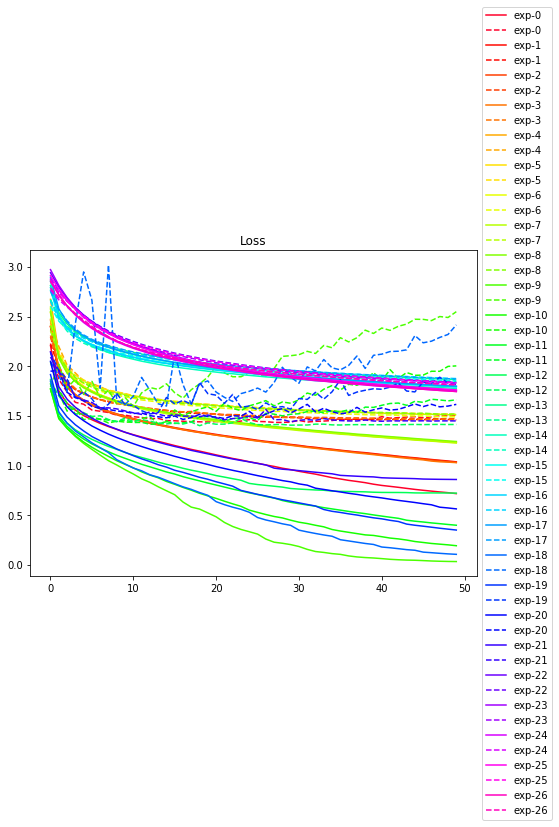

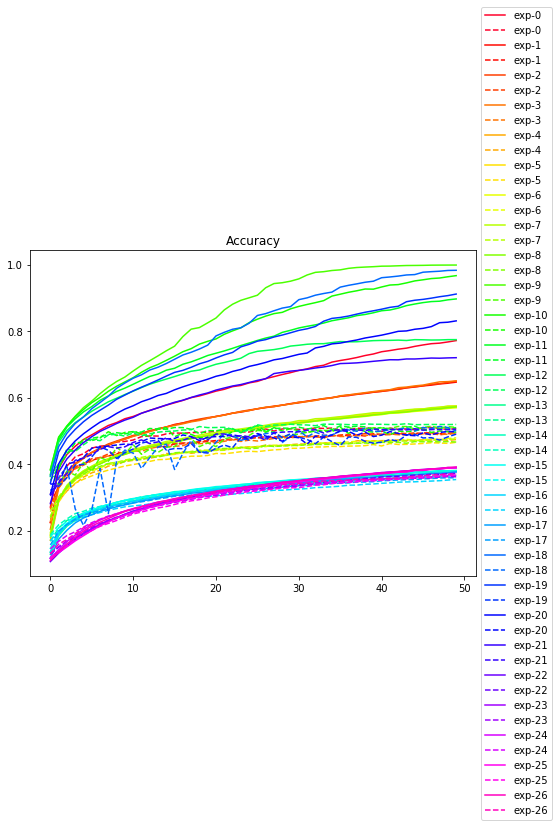

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()